***
## Table of Contents
<br>
<ol>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Uninfected:Infected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 70:30 Train Test Split </h3></a>
            </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
           </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            </ul>
     </ol>
<br>

In [1]:
### Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
pd.set_option("display.max_columns",40)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,binarize
from pandas_ml import ConfusionMatrix


Using TensorFlow backend.


In [2]:


### Function get_params takes as input a grid search model and prints out the best parameters for the model and 
### prints the best accuracy of the model
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

### The function takes as input the model, X and Y data to generate the confusion matrix  
def get_cm(model,a,b):
    y_pred=model.predict(a)
    cm=ConfusionMatrix(b,y_pred)
    display(cm)
    return cm
 
### The get accuracy plot takes as input a dataframe and a string for the title of the plot and displays a plot
### The function is primarily for plotting of accuracies for various classifiers for the same split.
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

### Function grid takes as input an estimator, X_train,Y_Train,X_test and Y_test and a string represetning the name of the model
### We perform StratifiedKFold cross validation and grid search to hypertune the parameters of the model     
def grid_acc(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold,n_jobs=-1)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    acc_train=accuracy_score(y,grid_search.predict(x))
    print("Accuracy of the ",model_name," model for the training data is:",acc_train)
    print("\nConfusion Matrix for Training data is:")
    cm_train=get_cm(grid_search,x,y)
    acc_test=accuracy_score(y_test,grid_search.predict(x_test))
    print("Accuracy of the ",model_name," model for test data is:",acc_test)
    print("\nConfusion Matrix for test data is:")
    cm_test=get_cm(grid_search,x_test,y_test)
    return grid_search,cm_train,cm_test,acc_train,acc_test    

### Plot roc curve
def get_roc_curve(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy on test data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

def get_roc_curve_deep_learning(model,x_test,y_test):
    prob=model.predict_proba(x_test)
    preds=prob
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc =auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(threshold, index = i)})
    threshold=roc.ix[(roc.tf-0).abs().argsort()[:1]]['thresholds'].values[0]
    print("Optimal Threshold is",threshold)
    y_pred_class=binarize(preds.reshape(1,-1),threshold)[0]
    accuracy=accuracy_score(y_test,y_pred_class)
    print("Accuracy of Logistic Model on training data is:",accuracy)
    cm=ConfusionMatrix(y_test,y_pred_class)
    display(cm)
    return cm,accuracy,threshold,roc_auc

###  <a id='1.A' style="text-decoration : none; color : #000000;">A. 80:20 Train Test Split</a>
#### Random State 0

In [3]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC        PAR       PAS  \
Source_User                                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   342  10.783626  9.897661   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...    42   9.476190  9.595238   

                                                           LEN          BYS  \
Source_User                                                                   
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   83.982456  2232.368421   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  119.285714  1357.809524   

                                                            BYR     SP    DP  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  7639.970760  337.0  14.0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  5211.809524   42.0   3.0   

                                                    NAPP  SIP  DIP  \
Source_User                                                          
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    22   30  123   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     7    3   20   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  13642.195906    12     5   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...   2319.000000     0     0   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     0     0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     3     6   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    16     5     4    14   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     8     1   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     9    25    46    27   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     9    24     0     0   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    98    16    38    12   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    2200  2300  
Source_User                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     6     0  
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0

In [4]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60f2b14eb15d59dd611    1
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35cc79ee014e30c7f27    0
73e7f427173ebaafa2447cafcfa05e11aac3dfda1d0a63d542395a7c9f3e41dd    0
e931f318e6d489b8c1fefcdbcc9f1678c3f5fc95b51fa9675b0130c2003885ef    1
bae671359bbc14c02f9f8ebc82ce508a719fc67b20861aeac0eae50765512ad3    1
97435f766a7f2b4ddea9ef289247eb80b7949d19813e662b41df10ee82d45dff    1
e83f41f7465c7b228abaffb01c879bfa306d44170328d408d6da9a1e0bfb9d30    1
d0e61d1a66521a1545404096ea9271bb53d3e19eefa1331754ca58c1cfbaff31    1
aaca5cdcccf23e9d5f1debe1ec0528fc5550ffe99f2f4a55a71e89ee95af52c9    1
5c5d234bdd7acfc32b04705b11fd0a5f4557d8d386e1a39a22cf728208b003e9    0
Name: Target, dtype: int64

In [5]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [6]:
## Table to store training and test measures
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           20  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1523     0     1523
1             0  1553     1553
__all__    1523  1553     3076

Accuracy of the  KNN  model for test data is: 0.801298701299

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          303   97      400
1           56  314      370
__all__    359  411      770

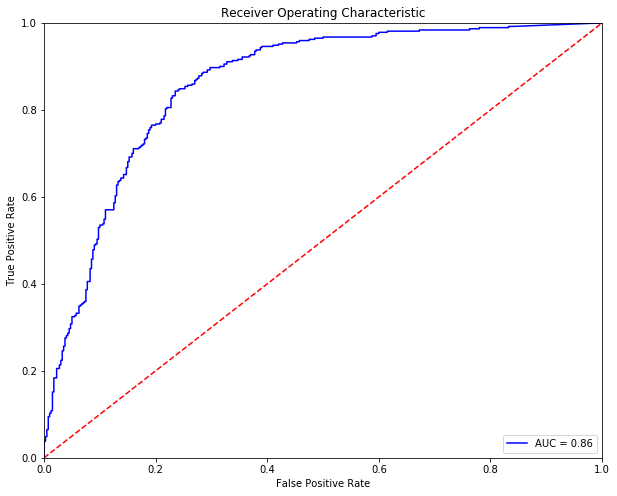

Optimal Threshold is 0.553628839711
Accuracy on test data is: 0.784415584416


Predicted  0.0  1.0  __all__
Actual                      
0.0        314   86      400
1.0         80  290      370
__all__    394  376      770

In [8]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [9]:
table_80_50_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [10]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.754876462939

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1168   355     1523
1           399  1154     1553
__all__    1567  1509     3076

Accuracy of the  Logistic  model for test data is: 0.785714285714

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          314   86      400
1           79  291      370
__all__    393  377      770

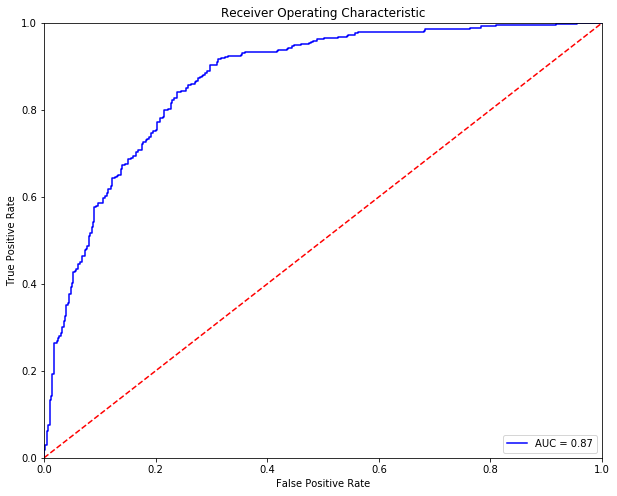

Optimal Threshold is 0.505604369786
Accuracy on test data is: 0.785714285714


Predicted  0.0  1.0  __all__
Actual                      
0.0        315   85      400
1.0         80  290      370
__all__    395  375      770

In [11]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [12]:
table_80_50_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [13]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.768205461638

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1089   434     1523
1           279  1274     1553
__all__    1368  1708     3076

Accuracy of the  Random Forest Trees  model for test data is: 0.806493506494

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          299  101      400
1           48  322      370
__all__    347  423      770

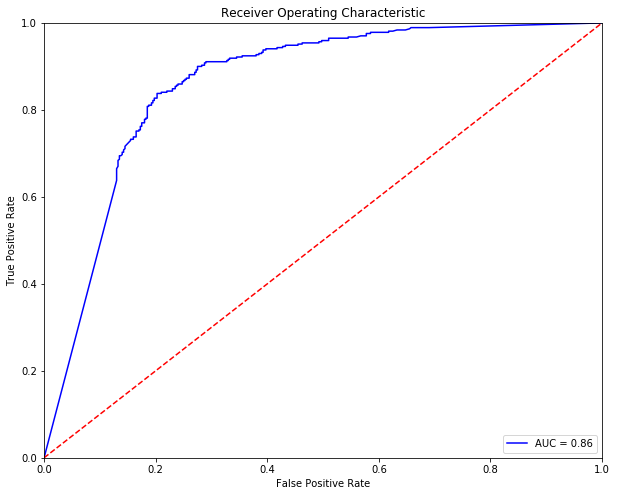

Optimal Threshold is 0.68234740223
Accuracy on test data is: 0.81038961039


Predicted  0.0  1.0  __all__
Actual                      
0.0        325   75      400
1.0         71  299      370
__all__    396  374      770

In [14]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [15]:
table_80_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

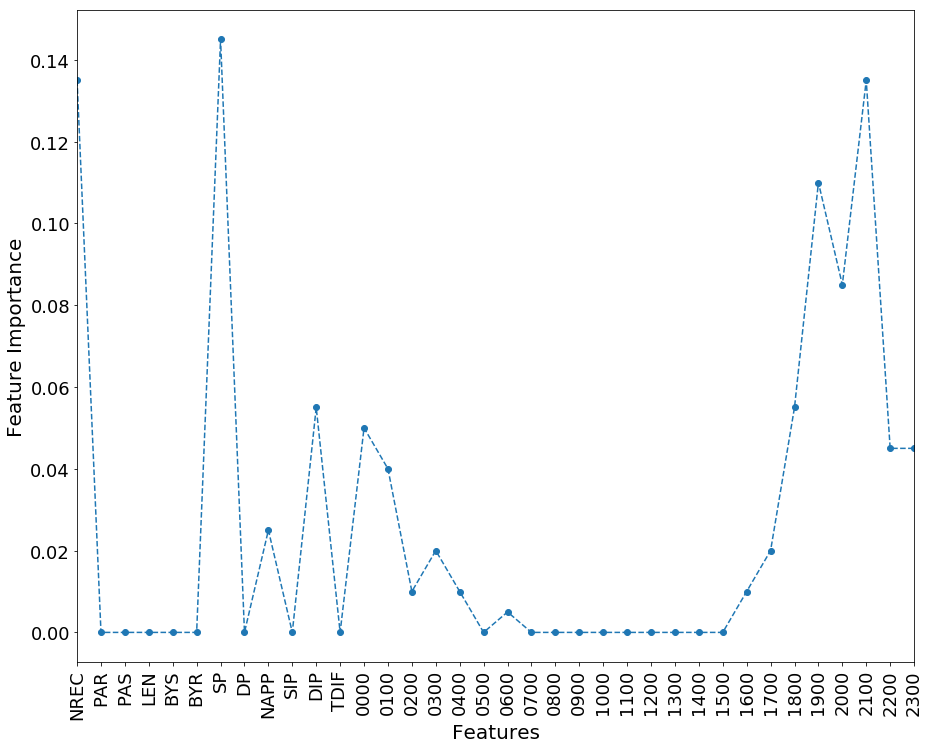

In [16]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [17]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.776983094928

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1105   418     1523
1           268  1285     1553
__all__    1373  1703     3076

Accuracy of the  AdaBoostClassifier  model for test data is: 0.811688311688

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          297  103      400
1           42  328      370
__all__    339  431      770

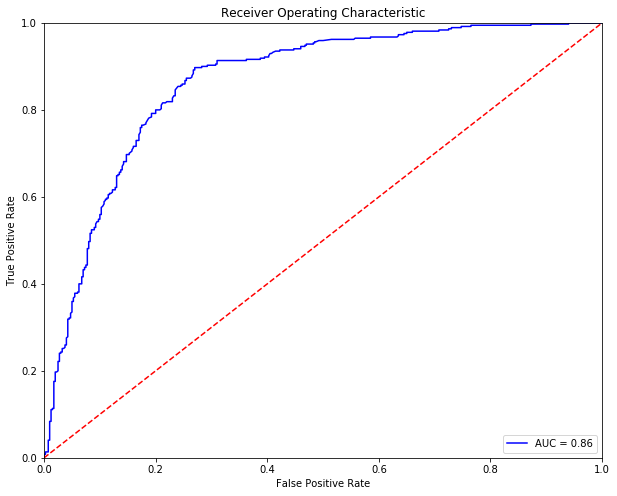

Optimal Threshold is 0.508733507696
Accuracy on test data is: 0.798701298701


Predicted  0.0  1.0  __all__
Actual                      
0.0        320   80      400
1.0         75  295      370
__all__    395  375      770

In [18]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [19]:
table_80_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

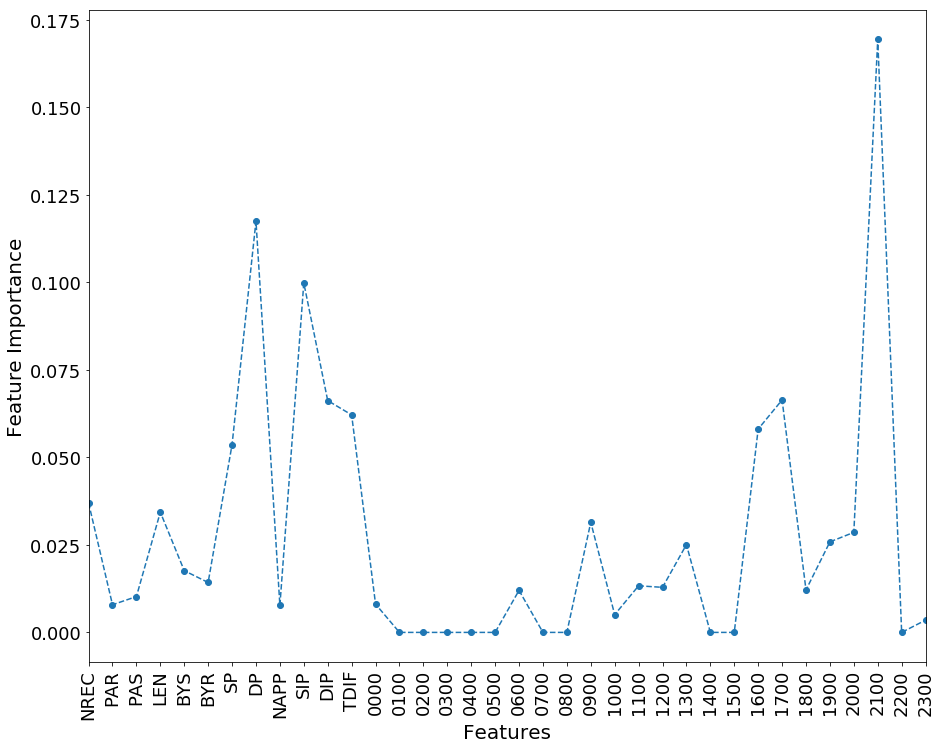

In [20]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [21]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1           100             0          1

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.800065019506

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1130   393     1523
1           222  1331     1553
__all__    1352  1724     3076

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.797402597403

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          292  108      400
1           48  322      370
__all__    340  430      770

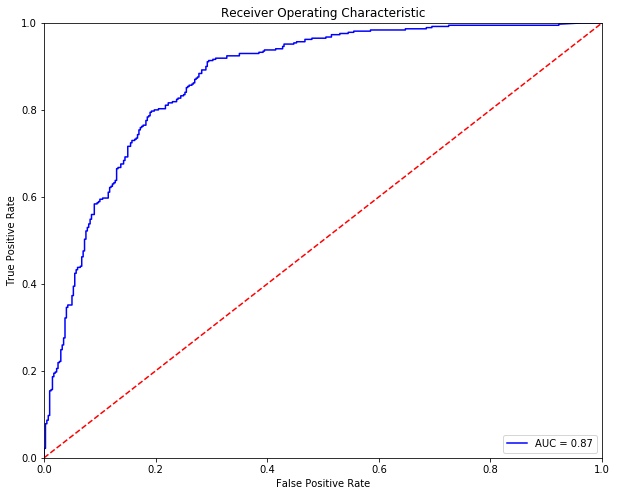

Optimal Threshold is 0.597429906125
Accuracy on test data is: 0.8


Predicted  0.0  1.0  __all__
Actual                      
0.0        321   79      400
1.0         75  295      370
__all__    396  374      770

In [22]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [23]:
table_80_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

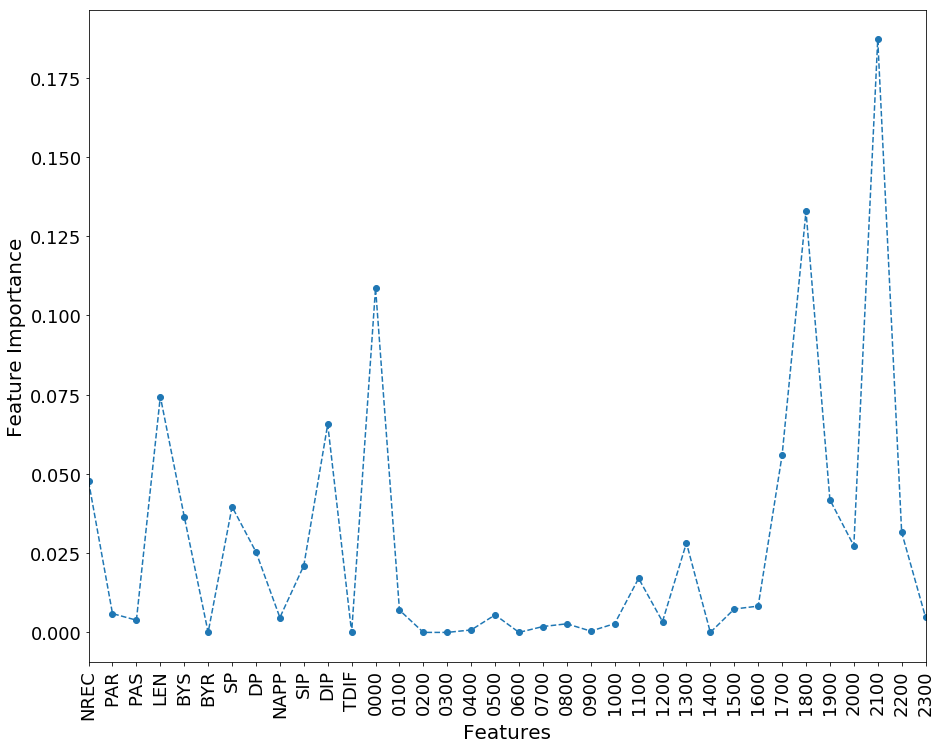

In [24]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [25]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.765604681404

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1031   492     1523
1           229  1324     1553
__all__    1260  1816     3076

Accuracy of the  Extra Decision Tree  model for test data is: 0.787012987013

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          278  122      400
1           42  328      370
__all__    320  450      770

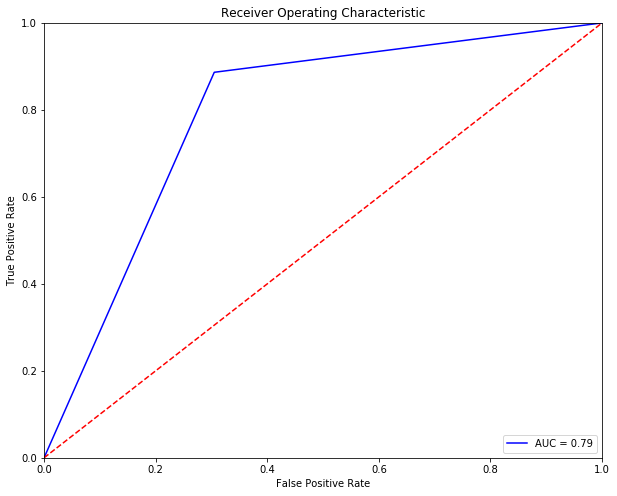

Optimal Threshold is 0.729074889868
Accuracy on test data is: 0.519480519481


Predicted  0.0  1.0  __all__
Actual                      
0.0        400    0      400
1.0        370    0      370
__all__    770    0      770

In [26]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [27]:
table_80_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [28]:
%%capture
table_80_50_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

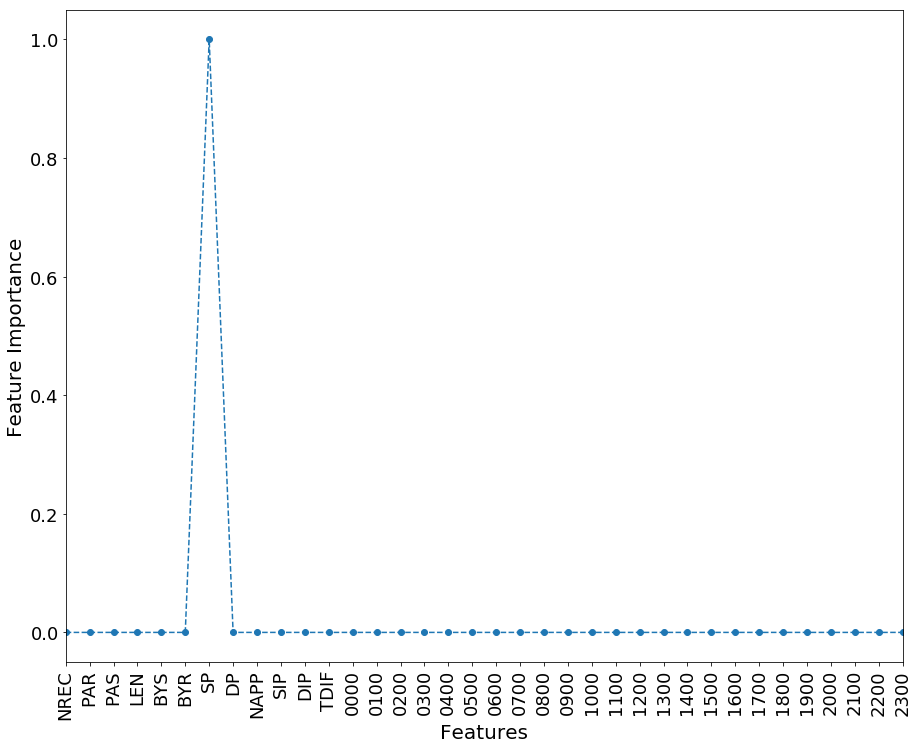

In [29]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [30]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.993172951886

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1513    10     1523
1            11  1542     1553
__all__    1524  1552     3076

Accuracy of the  Bagging  model for test data is: 0.797402597403

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          290  110      400
1           46  324      370
__all__    336  434      770

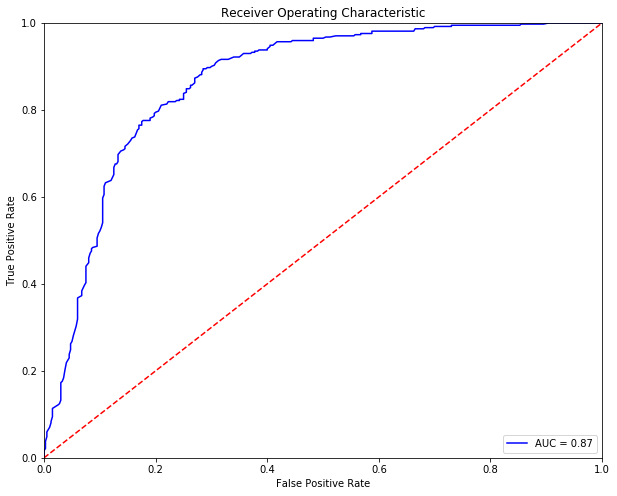

Optimal Threshold is 0.583333333333
Accuracy on test data is: 0.797402597403


Predicted  0.0  1.0  __all__
Actual                      
0.0        320   80      400
1.0         76  294      370
__all__    396  374      770

In [31]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [32]:
table_80_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [33]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.910273081925


Predicted     0     1  __all__
Actual                        
0          1363   160     1523
1           116  1437     1553
__all__    1479  1597     3076

The test accuracy is: 0.803896103896


Predicted    0    1  __all__
Actual                      
0          297  103      400
1           48  322      370
__all__    345  425      770

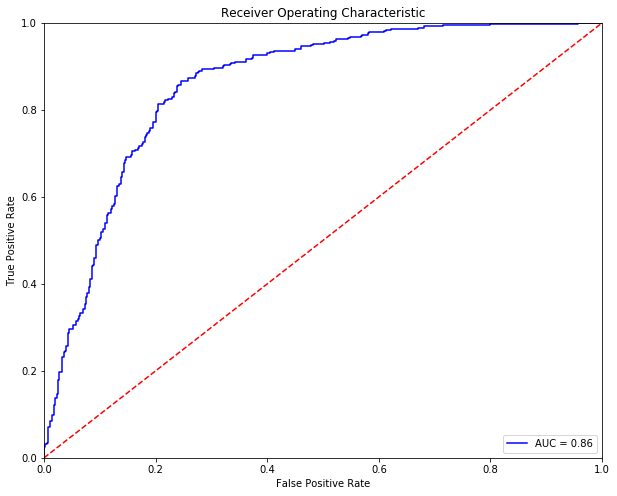

Optimal Threshold is 0.574851379813
Accuracy on test data is: 0.796103896104


Predicted  0.0  1.0  __all__
Actual                      
0.0        319   81      400
1.0         76  294      370
__all__    395  375      770

In [34]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [35]:
table_80_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [36]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.9255526658


Predicted     0     1  __all__
Actual                        
0          1429    94     1523
1           135  1418     1553
__all__    1564  1512     3076

The accuracy of the model on test data is: 0.733766233766


Predicted    0    1  __all__
Actual                      
0          282  118      400
1           87  283      370
__all__    369  401      770

 32/770 [>.............................] - ETA: 0s

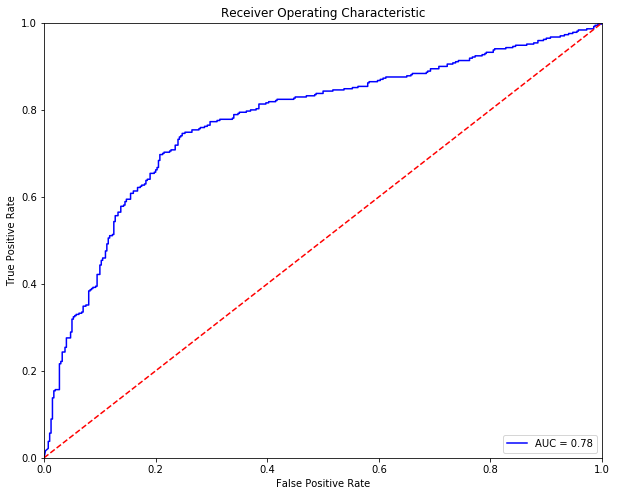

Optimal Threshold is 0.568287
Accuracy of Logistic Model on training data is: 0.746753246753


Predicted  0.0  1.0  __all__
Actual                      
0.0        299  101      400
1.0         94  276      370
__all__    393  377      770

In [37]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [38]:
table_80_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [39]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished


The accuracy of the model on training data is: 0.796814044213


Predicted     0     1  __all__
Actual                        
0          1109   414     1523
1           211  1342     1553
__all__    1320  1756     3076

The accuracy of the model on test data is: 0.790909090909


Predicted    0    1  __all__
Actual                      
0          284  116      400
1           45  325      370
__all__    329  441      770

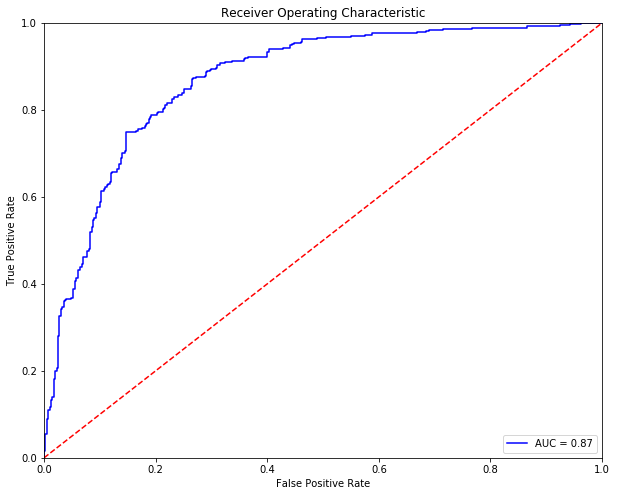

Optimal Threshold is 0.629534
Accuracy on test data is: 0.793506493506


Predicted  0.0  1.0  __all__
Actual                      
0.0        318   82      400
1.0         77  293      370
__all__    395  375      770

In [40]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [41]:
table_80_50_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [42]:
table_80_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)
table_80_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1553.0  1523.0    0.0    0.0  0.000000   
LogisticRegression          0.754876  1154.0  1168.0  355.0  399.0  0.233093   
RandomForestClassifier      0.768205  1274.0  1089.0  434.0  279.0  0.284964   
AdaBoostClassifier          0.776983  1285.0  1105.0  418.0  268.0  0.274458   
GradientBoostingClassifier  0.800065  1331.0  1130.0  393.0  222.0  0.258043   
ExtraTreeClassifier         0.765605  1324.0  1031.0  492.0  229.0  0.323047   
BaggingClassifier           0.993173  1542.0  1513.0   10.0   11.0  0.006566   
VotingClassifier            0.910273  1437.0  1363.0  160.0  116.0  0.105056   
Neural Network-1            0.925553  1418.0  1429.0   94.0  135.0  0.061720   
Neural-Network-2            0.796814  1342.0  1109.0  414.0  211.0  0.271832   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.256922  
RandomForestClassifier      0.179652  
AdaBoostClassifier          0.172569  
GradientBoostingClassifier  0.142949  
ExtraTreeClassifier         0.147457  
BaggingClassifier           0.007083  
VotingClassifier            0.074694  
Neural Network-1            0.086929  
Neural-Network-2            0.135866

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP    FN     FPR  \
index                                                                     
KNeighborsClassifier        0.801299  314.0  303.0   97.0  56.0  0.2425   
LogisticRegression          0.785714  291.0  314.0   86.0  79.0  0.2150   
RandomForestClassifier      0.806494  322.0  299.0  101.0  48.0  0.2525   
AdaBoostClassifier          0.811688  328.0  297.0  103.0  42.0  0.2575   
GradientBoostingClassifier  0.797403  322.0  292.0  108.0  48.0  0.2700   
ExtraTreeClassifier         0.787013  328.0  278.0  122.0  42.0  0.3050   
BaggingClassifier           0.797403  324.0  290.0  110.0  46.0  0.2750   
VotingClassifier            0.803896  322.0  297.0  103.0  48.0  0.2575   
Neural Network-1            0.733766  283.0  282.0  118.0  87.0  0.2950   
Neural-Network-2            0.790909  325.0  284.0  116.0  45.0  0.2900   

                                 FNR  
index                                 
KNeighborsClassifier        0.151351  
LogisticRegression          0.213514  
RandomForestClassifier      0.129730  
AdaBoostClassifier          0.113514  
GradientBoostingClassifier  0.129730  
ExtraTreeClassifier         0.113514  
BaggingClassifier           0.124324  
VotingClassifier            0.129730  
Neural Network-1            0.235135  
Neural-Network-2            0.121622

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.784416  290.000000  314.000000   86.000000   
LogisticRegression          0.785714  290.000000  315.000000   85.000000   
RandomForestClassifier      0.810390  299.000000  325.000000   75.000000   
AdaBoostClassifier          0.798701  295.000000  320.000000   80.000000   
GradientBoostingClassifier  0.800000  295.000000  321.000000   79.000000   
ExtraTreeClassifier         0.519481  207.792208  192.207792  192.207792   
BaggingClassifier           0.797403  294.000000  320.000000   80.000000   
VotingClassifier            0.796104  294.000000  319.000000   81.000000   
Neural Network-1            0.746753  276.000000  299.000000  101.000000   
Neural-Network-2            0.793506  293.000000  318.000000   82.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier         80.000000  0.215000  0.216216   0.553629   
LogisticRegression           80.000000  0.212500  0.216216   0.505604   
RandomForestClassifier       71.000000  0.187500  0.191892   0.682347   
AdaBoostClassifier           75.000000  0.200000  0.202703   0.508734   
GradientBoostingClassifier   75.000000  0.197500  0.202703   0.597430   
ExtraTreeClassifier         177.792208  0.519481  0.480519   0.729075   
BaggingClassifier            76.000000  0.200000  0.205405   0.583333   
VotingClassifier             76.000000  0.202500  0.205405   0.574851   
Neural Network-1             94.000000  0.252500  0.254054   0.568287   
Neural-Network-2             77.000000  0.205000  0.208108   0.629534   

                                 auc  
index                                 
KNeighborsClassifier        0.859446  
LogisticRegression          0.868047  
RandomForestClassifier      0.861659  
AdaBoostClassifier          0.864500  
GradientBoostingClassifier  0.872899  
ExtraTreeClassifier         0.790743  
BaggingClassifier           0.865595  
VotingClassifier            0.858318  
Neural Network-1            0.776068  
Neural-Network-2            0.869453

#### Random State 10

In [43]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  2984  216.771448   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   264   25.242424   

                                                          PAS        LEN  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  74.177949  82.084115   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  35.803030  69.193182   

                                                             BYS  \
Source_User                                                        
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   9038.178284   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  30610.265152   

                                                              BYR      SP  \
Source_User                                                                 
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  286763.437332  2689.0   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   11302.988636   263.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  13.0    45   19  784   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   7.0    19   36   97   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   1642.074397   265   188   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  17986.772727     0     5   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   248    39    82    43   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0    16     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   112    20    50    46   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0     6    51   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    89    81    80   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    45    11     8     9   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    70   200   116   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    20     2     6    13   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   195   158   176   167   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     4    42    18     8   

                                                    2200  2300  
Source_User                                                     
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   116   233  
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0

In [44]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5bed0d545a1327be88    1
7d72b802c8934804b499a7b417a31857b112353b42885b2290ff09aeef55bebf    0
c59c78cbcb78f0f7140cef977c9016a08b9d4d91bc5b2e537327b2ab2b791f95    1
8b4f22fd3269f43630ef23cc553c80f72740dcc05fec14b0caad367768ce21a4    1
caea0e5257613ba78f187ac0616758755573aa9b58006fb8a5b671496fc3e392    1
f7cbcf0d21066d971d1948c618f66de0188cb7326b8c198ddd66d18d7e4d91bd    1
d487fb3eaf4e620ba1acd93bfce4387f10e162062f03f15f813c62481bf0a518    1
60430a2cacf66446dae118e6f4b204221901dcd2f3a3faffee16848f2ae9d0ec    1
becf4f677fab6f341e04c1c6ef46ae9d5c90175660426fb33dbd7ed850aec06d    0
f0ae081c92bfcbd5f316ae0d19db53b6a9edfdfc687166f2a5b4e6eb60d9c9ed    1
Name: Target, dtype: int64

In [45]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [46]:
## Table to store training and test measures
table_80_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           50  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1544     0     1544
1             0  1532     1532
__all__    1544  1532     3076

Accuracy of the  KNN  model for test data is: 0.768831168831

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          290   89      379
1           89  302      391
__all__    379  391      770

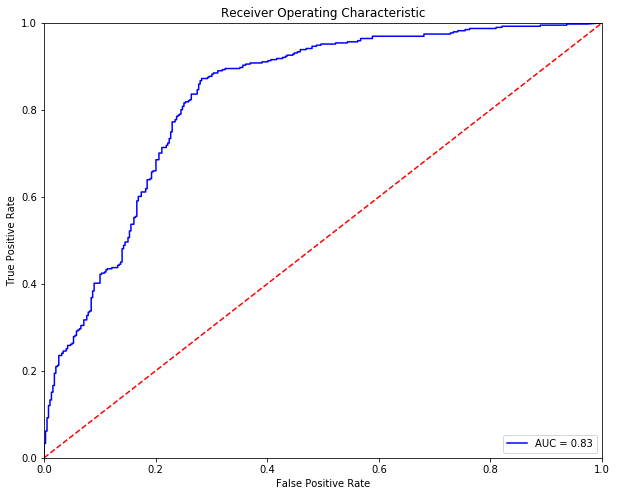

Optimal Threshold is 0.506825008087
Accuracy on test data is: 0.77012987013


Predicted  0.0  1.0  __all__
Actual                      
0.0        292   87      379
1.0         90  301      391
__all__    382  388      770

In [48]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [49]:
table_80_50_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [50]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.788361508453

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1231   313     1544
1           338  1194     1532
__all__    1569  1507     3076

Accuracy of the  Logistic  model for test data is: 0.762337662338

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          288   91      379
1           92  299      391
__all__    380  390      770

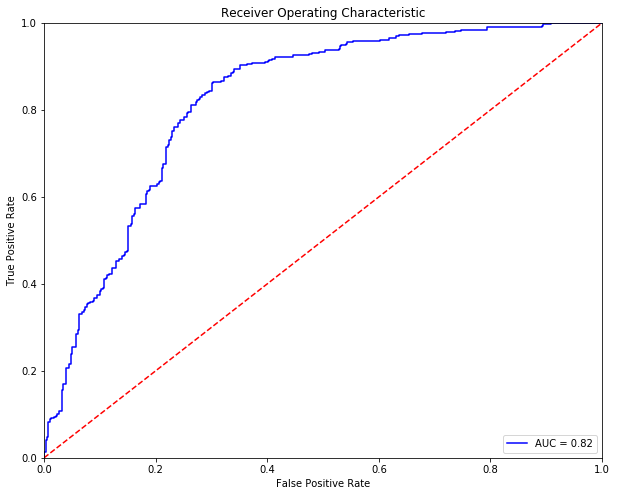

Optimal Threshold is 0.504736718023
Accuracy on test data is: 0.761038961039


Predicted  0.0  1.0  __all__
Actual                      
0.0        289   90      379
1.0         94  297      391
__all__    383  387      770

In [51]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [52]:
table_80_50_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [53]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0        entropy         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.789986996099

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1198   346     1544
1           300  1232     1532
__all__    1498  1578     3076

Accuracy of the  Random Forest Trees  model for test data is: 0.77012987013

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          283   96      379
1           81  310      391
__all__    364  406      770

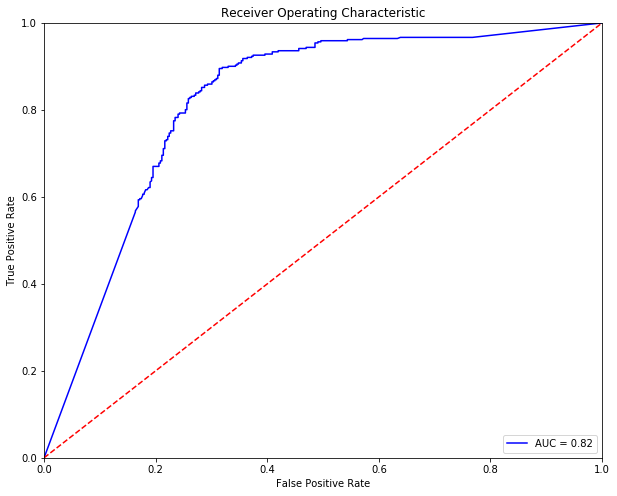

Optimal Threshold is 0.622938503875
Accuracy on test data is: 0.77012987013


Predicted  0.0  1.0  __all__
Actual                      
0.0        291   88      379
1.0         89  302      391
__all__    380  390      770

In [54]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [55]:
table_80_50_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

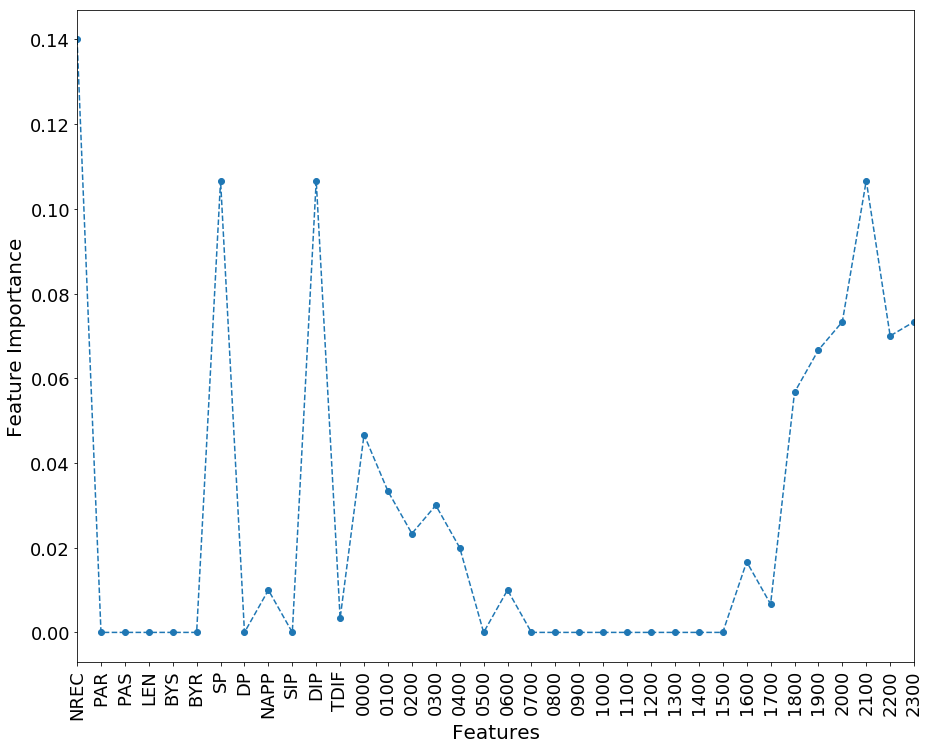

In [56]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [57]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.800065019506

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1210   334     1544
1           281  1251     1532
__all__    1491  1585     3076

Accuracy of the  AdaBoostClassifier  model for test data is: 0.77012987013

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          283   96      379
1           81  310      391
__all__    364  406      770

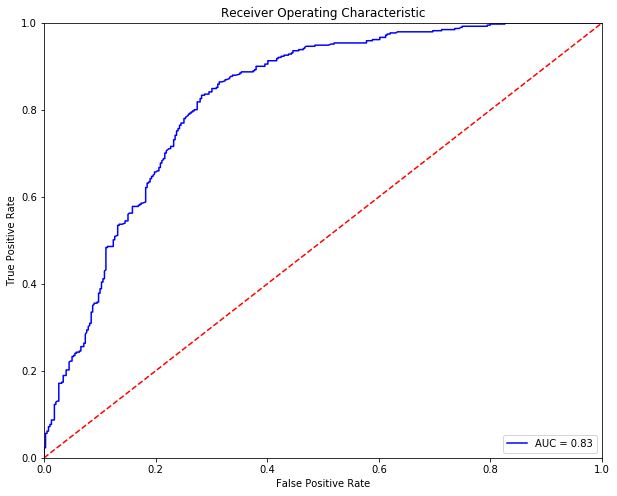

Optimal Threshold is 0.508856737244
Accuracy on test data is: 0.758441558442


Predicted  0.0  1.0  __all__
Actual                      
0.0        288   91      379
1.0         95  296      391
__all__    383  387      770

In [58]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [59]:
table_80_50_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

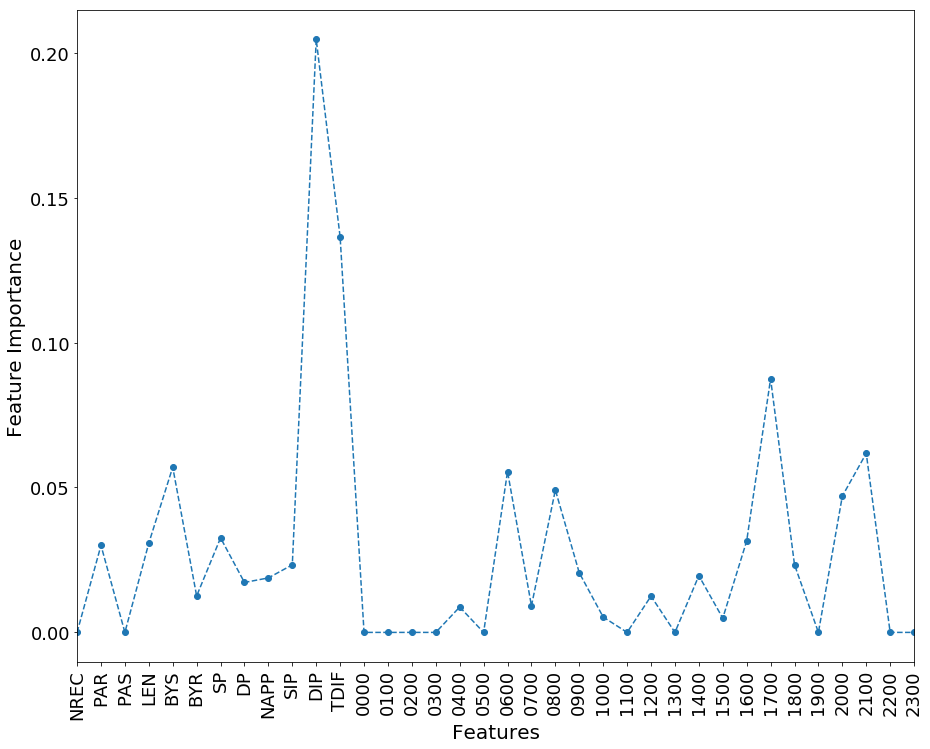

In [60]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [61]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.05  exponential                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.808192457737

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1201   343     1544
1           247  1285     1532
__all__    1448  1628     3076

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.775324675325

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          279  100      379
1           73  318      391
__all__    352  418      770

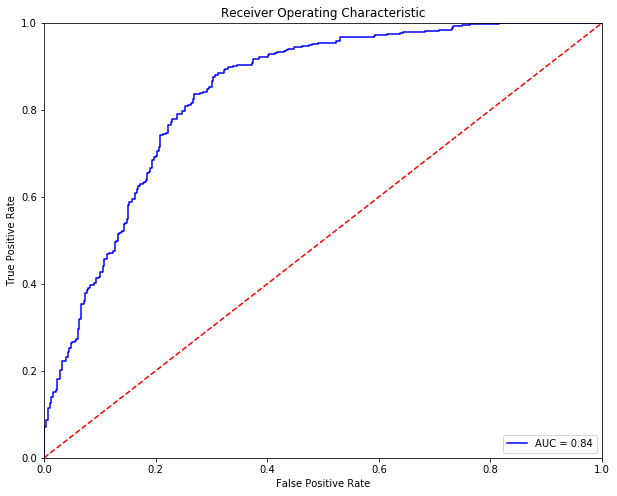

Optimal Threshold is 0.592970588732
Accuracy on test data is: 0.771428571429


Predicted  0.0  1.0  __all__
Actual                      
0.0        293   86      379
1.0         90  301      391
__all__    383  387      770

In [62]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [63]:
table_80_50_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

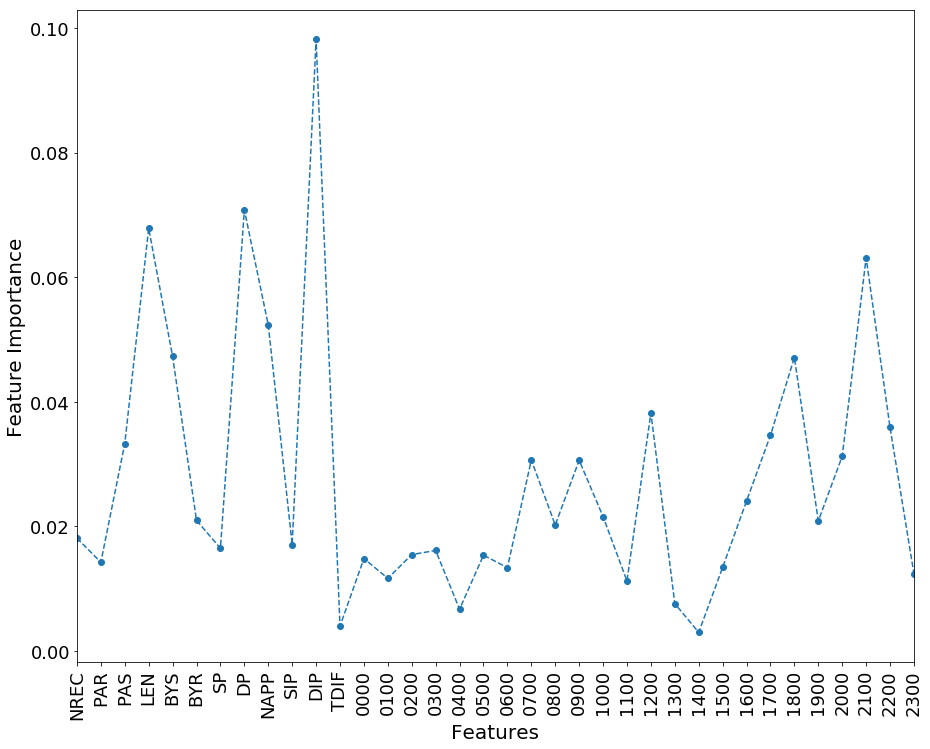

In [64]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [65]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.784785435631

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1182   362     1544
1           300  1232     1532
__all__    1482  1594     3076

Accuracy of the  Extra Decision Tree  model for test data is: 0.774025974026

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          282   97      379
1           77  314      391
__all__    359  411      770

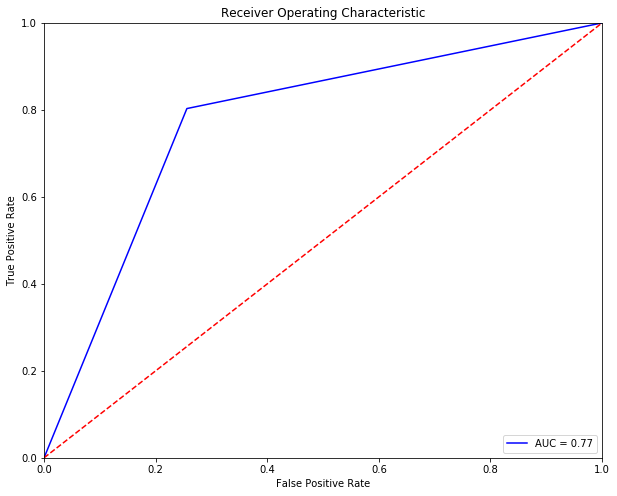

Optimal Threshold is 0.772898368883
Accuracy on test data is: 0.492207792208


Predicted  0.0  1.0  __all__
Actual                      
0.0        379    0      379
1.0        391    0      391
__all__    770    0      770

In [66]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [67]:
table_80_50_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [68]:
%%capture
table_80_50_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

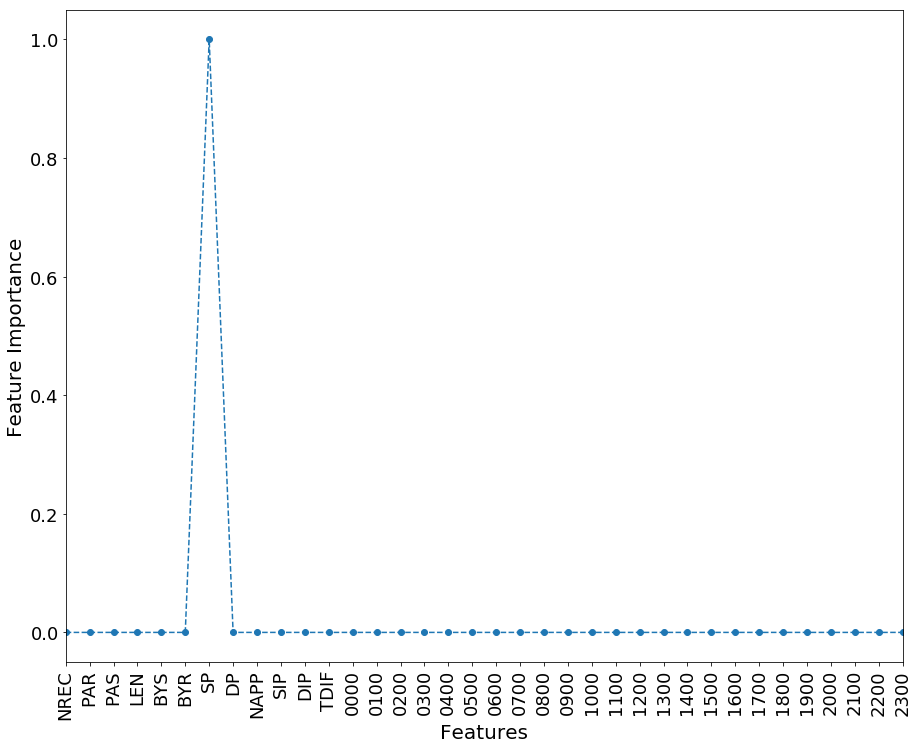

In [69]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [70]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.6           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.983094928479

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1519    25     1544
1            27  1505     1532
__all__    1546  1530     3076

Accuracy of the  Bagging  model for test data is: 0.780519480519

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          283   96      379
1           73  318      391
__all__    356  414      770

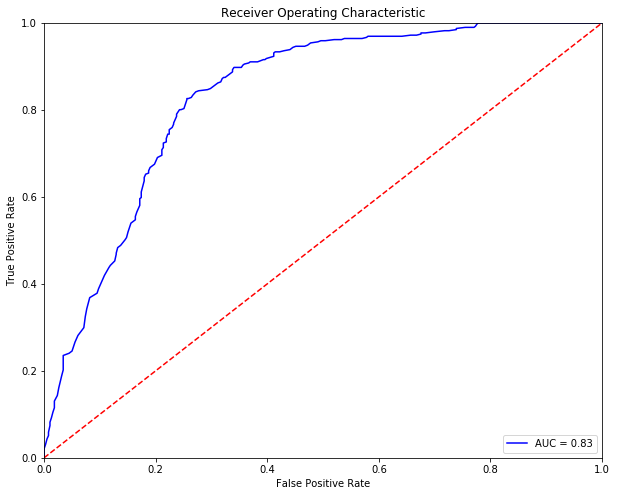

Optimal Threshold is 0.56
Accuracy on test data is: 0.764935064935


Predicted  0.0  1.0  __all__
Actual                      
0.0        292   87      379
1.0         94  297      391
__all__    386  384      770

In [71]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [72]:
table_80_50_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [73]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.902470741222


Predicted     0     1  __all__
Actual                        
0          1374   170     1544
1           130  1402     1532
__all__    1504  1572     3076

The test accuracy is: 0.772727272727


Predicted    0    1  __all__
Actual                      
0          280   99      379
1           76  315      391
__all__    356  414      770

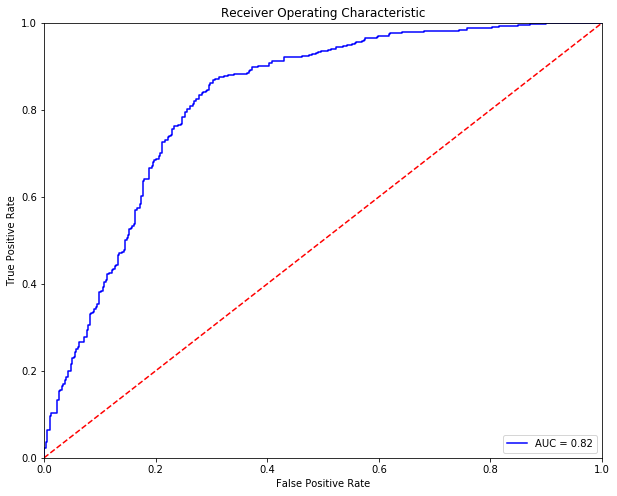

Optimal Threshold is 0.540718102663
Accuracy on test data is: 0.762337662338


Predicted  0.0  1.0  __all__
Actual                      
0.0        289   90      379
1.0         93  298      391
__all__    382  388      770

In [74]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [75]:
table_80_50_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [76]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.911573472042


Predicted     0     1  __all__
Actual                        
0          1515    29     1544
1           243  1289     1532
__all__    1758  1318     3076

The accuracy of the model on test data is: 0.736363636364


Predicted    0    1  __all__
Actual                      
0          302   77      379
1          126  265      391
__all__    428  342      770

 32/770 [>.............................] - ETA: 0s

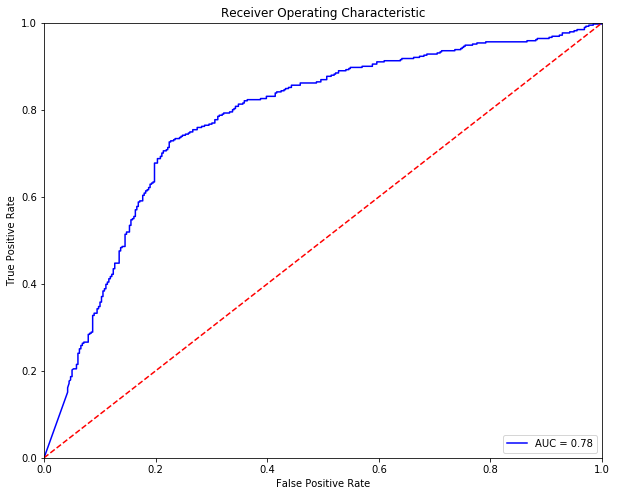

Optimal Threshold is 0.233124
Accuracy of Logistic Model on training data is: 0.744155844156


Predicted  0.0  1.0  __all__
Actual                      
0.0        283   96      379
1.0        101  290      391
__all__    384  386      770

In [77]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [78]:
table_80_50_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [79]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.2min finished


The accuracy of the model on training data is: 0.809492847854


Predicted     0     1  __all__
Actual                        
0          1200   344     1544
1           242  1290     1532
__all__    1442  1634     3076

The accuracy of the model on test data is: 0.774025974026


Predicted    0    1  __all__
Actual                      
0          273  106      379
1           68  323      391
__all__    341  429      770

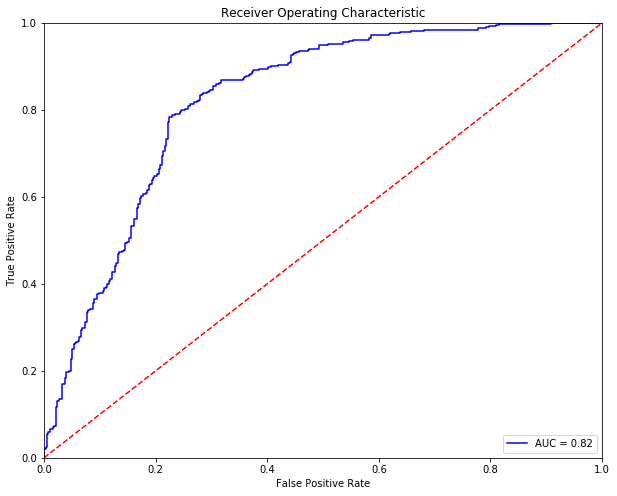

Optimal Threshold is 0.646785
Accuracy on test data is: 0.775324675325


Predicted  0.0  1.0  __all__
Actual                      
0.0        295   84      379
1.0         89  302      391
__all__    384  386      770

In [80]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [81]:
table_80_50_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [82]:
table_80_50_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1532.0  1544.0    0.0    0.0  0.000000   
LogisticRegression          0.788362  1194.0  1231.0  313.0  338.0  0.202720   
RandomForestClassifier      0.789987  1232.0  1198.0  346.0  300.0  0.224093   
AdaBoostClassifier          0.800065  1251.0  1210.0  334.0  281.0  0.216321   
GradientBoostingClassifier  0.808192  1285.0  1201.0  343.0  247.0  0.222150   
ExtraTreeClassifier         0.784785  1232.0  1182.0  362.0  300.0  0.234456   
BaggingClassifier           0.983095  1505.0  1519.0   25.0   27.0  0.016192   
VotingClassifier            0.902471  1402.0  1374.0  170.0  130.0  0.110104   
Neural Network-1            0.911573  1289.0  1515.0   29.0  243.0  0.018782   
Neural-Network-2            0.809493  1290.0  1200.0  344.0  242.0  0.222798   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.220627  
RandomForestClassifier      0.195822  
AdaBoostClassifier          0.183420  
GradientBoostingClassifier  0.161227  
ExtraTreeClassifier         0.195822  
BaggingClassifier           0.017624  
VotingClassifier            0.084856  
Neural Network-1            0.158616  
Neural-Network-2            0.157963

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.768831  302.0  290.0   89.0   89.0  0.234828   
LogisticRegression          0.762338  299.0  288.0   91.0   92.0  0.240106   
RandomForestClassifier      0.770130  310.0  283.0   96.0   81.0  0.253298   
AdaBoostClassifier          0.770130  310.0  283.0   96.0   81.0  0.253298   
GradientBoostingClassifier  0.775325  318.0  279.0  100.0   73.0  0.263852   
ExtraTreeClassifier         0.774026  314.0  282.0   97.0   77.0  0.255937   
BaggingClassifier           0.780519  318.0  283.0   96.0   73.0  0.253298   
VotingClassifier            0.772727  315.0  280.0   99.0   76.0  0.261214   
Neural Network-1            0.736364  265.0  302.0   77.0  126.0  0.203166   
Neural-Network-2            0.774026  323.0  273.0  106.0   68.0  0.279683   

                                 FNR  
index                                 
KNeighborsClassifier        0.227621  
LogisticRegression          0.235294  
RandomForestClassifier      0.207161  
AdaBoostClassifier          0.207161  
GradientBoostingClassifier  0.186701  
ExtraTreeClassifier         0.196931  
BaggingClassifier           0.186701  
VotingClassifier            0.194373  
Neural Network-1            0.322251  
Neural-Network-2            0.173913

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.770130  301.000000  292.000000   87.000000   
LogisticRegression          0.761039  297.000000  289.000000   90.000000   
RandomForestClassifier      0.770130  302.000000  291.000000   88.000000   
AdaBoostClassifier          0.758442  296.000000  288.000000   91.000000   
GradientBoostingClassifier  0.771429  301.000000  293.000000   86.000000   
ExtraTreeClassifier         0.492208  186.546753  192.453247  192.453247   
BaggingClassifier           0.764935  297.000000  292.000000   87.000000   
VotingClassifier            0.762338  298.000000  289.000000   90.000000   
Neural Network-1            0.744156  290.000000  283.000000   96.000000   
Neural-Network-2            0.775325  302.000000  295.000000   84.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier         90.000000  0.229551  0.230179   0.506825   
LogisticRegression           94.000000  0.237467  0.240409   0.504737   
RandomForestClassifier       89.000000  0.232190  0.227621   0.622939   
AdaBoostClassifier           95.000000  0.240106  0.242967   0.508857   
GradientBoostingClassifier   90.000000  0.226913  0.230179   0.592971   
ExtraTreeClassifier         198.546753  0.492208  0.507792   0.772898   
BaggingClassifier            94.000000  0.229551  0.240409   0.560000   
VotingClassifier             93.000000  0.237467  0.237852   0.540718   
Neural Network-1            101.000000  0.253298  0.258312   0.233124   
Neural-Network-2             89.000000  0.221636  0.227621   0.646785   

                                 auc  
index                                 
KNeighborsClassifier        0.830487  
LogisticRegression          0.820945  
RandomForestClassifier      0.818691  
AdaBoostClassifier          0.825473  
GradientBoostingClassifier  0.839151  
ExtraTreeClassifier         0.773566  
BaggingClassifier           0.832417  
VotingClassifier            0.822483  
Neural Network-1            0.778459  
Neural-Network-2            0.822801

#### Random State 20

In [83]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  3475  119.307626   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   558   31.100358   

                                                          PAS         LEN  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  60.322302   94.924029   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  18.324373  120.193548   

                                                            BYS  \
Source_User                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  6983.720863   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  2986.801075   

                                                              BYR      SP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  151221.195108  3079.0   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   31418.557348   555.0   

                                                       DP  NAPP  SIP  DIP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  106.0    54   74  911   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    5.0    25   53  227   

                                                           TDIF  0000  0100  \
Source_User                                                                   
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1409.110216   419   383   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  8542.105735    13    44   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   267   141    95    48   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     2     6     5     3   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    31    11    30    33   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     4     1     0     8   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    39    68   187    89   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    25    35    44    67   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    79   110    56   187   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    94    27    18    19   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   161   174   303   126   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    30    32    40    32   

                                                    2200  2300  
Source_User                                                     
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   303   135  
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     6     3

In [84]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
afbe75a93f02da27be2a836bef717ffeef19714de5a1f2121d5a93fe043e70f1    1
28f9fffb669c004731f11c34913ce913981fd3534ea37ce2bb0e9b942091ff57    0
c966f4446da082203a9bfc84af2a2db29baa017722ac03471cf412932a6c0e90    1
b938ef4078ace510c6696a63e7ee215b9443b59f0d5c7a5f3d79bc1a672c0ca8    1
c1d72e5d7b7f24020163240ecbb1e648745a058b5f18c44f1cf8ceea6be1dc8b    1
8b76ca850d1587f46c2740a3dc662f9730d183fc173a25c6c7fcae215adde149    1
1b93b31e3d3282a98216531e95ddd1400a7728383f6f348ce19b05d873a6122a    1
f0629dde75324f00bdd60ba5ff96dd8f198c45117c089691e44c6c0e871d5947    1
bb235609630753fadf401ecbf9b9c323c35273de648930ce0b76cbd128c882fe    0
Name: Target, dtype: int64

In [85]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [86]:
## Table to store training and test measures
table_80_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0      ball_tree         10  chebyshev           20  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1538     0     1538
1             0  1538     1538
__all__    1538  1538     3076

Accuracy of the  KNN  model for test data is: 0.797402597403

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          291   94      385
1           62  323      385
__all__    353  417      770

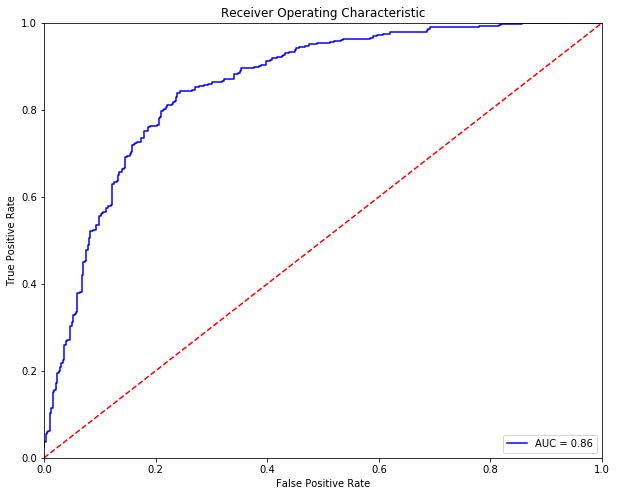

Optimal Threshold is 0.552448322441
Accuracy on test data is: 0.788311688312


Predicted  0.0  1.0  __all__
Actual                      
0.0        305   80      385
1.0         83  302      385
__all__    388  382      770

In [88]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [89]:
table_80_50_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [90]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.766579973992

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1164   374     1538
1           344  1194     1538
__all__    1508  1568     3076

Accuracy of the  Logistic  model for test data is: 0.779220779221

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          295   90      385
1           80  305      385
__all__    375  395      770

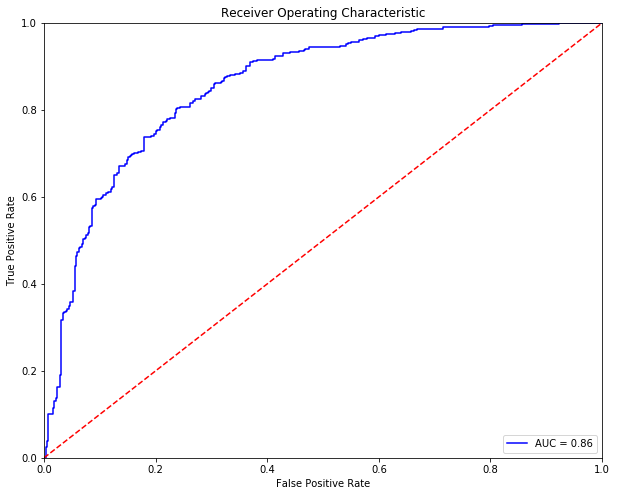

Optimal Threshold is 0.517577703409
Accuracy on test data is: 0.777922077922


Predicted  0.0  1.0  __all__
Actual                      
0.0        300   85      385
1.0         86  299      385
__all__    386  384      770

In [91]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [92]:
table_80_50_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [93]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.77633289987

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1117   421     1538
1           267  1271     1538
__all__    1384  1692     3076

Accuracy of the  Random Forest Trees  model for test data is: 0.793506493506

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          286   99      385
1           60  325      385
__all__    346  424      770

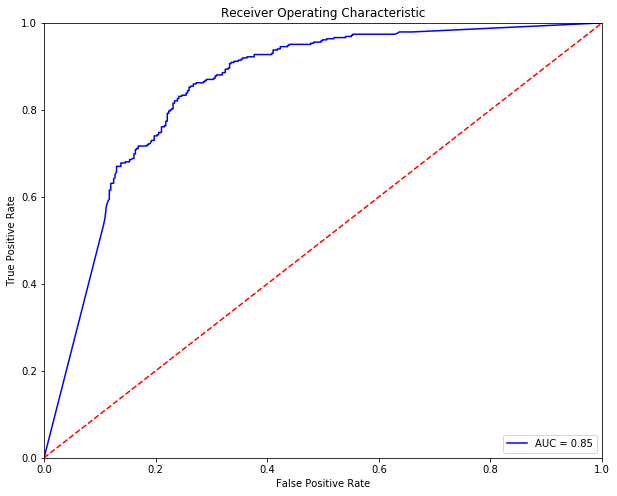

Optimal Threshold is 0.678073541249
Accuracy on test data is: 0.777922077922


Predicted  0.0  1.0  __all__
Actual                      
0.0        301   84      385
1.0         87  298      385
__all__    388  382      770

In [94]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [95]:
table_80_50_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

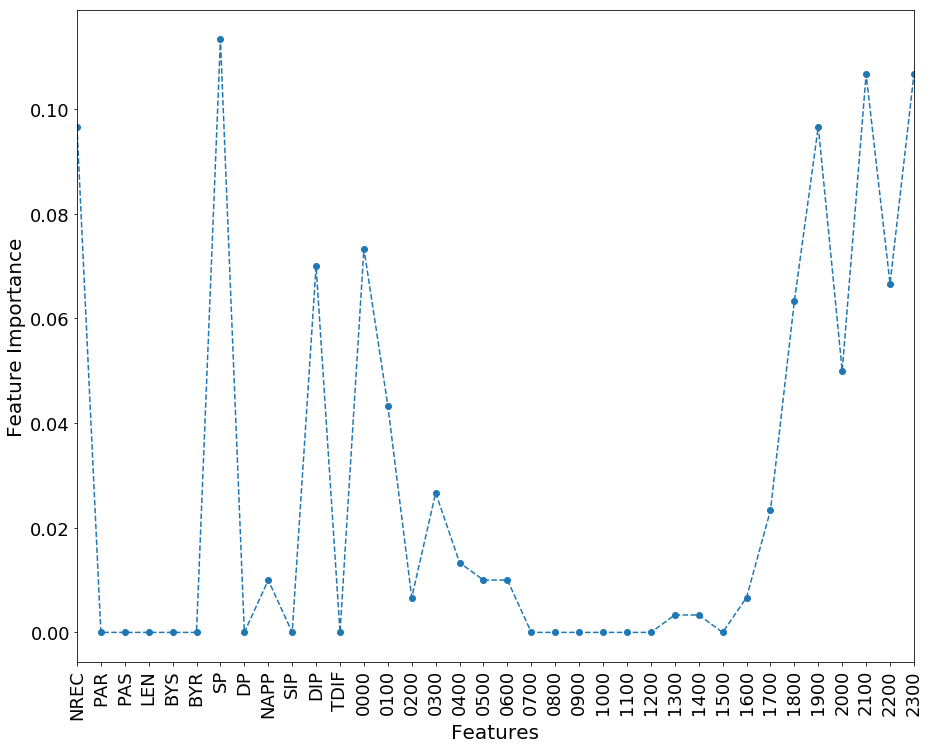

In [96]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [97]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.789011703511

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1137   401     1538
1           248  1290     1538
__all__    1385  1691     3076

Accuracy of the  AdaBoostClassifier  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          295   90      385
1           64  321      385
__all__    359  411      770

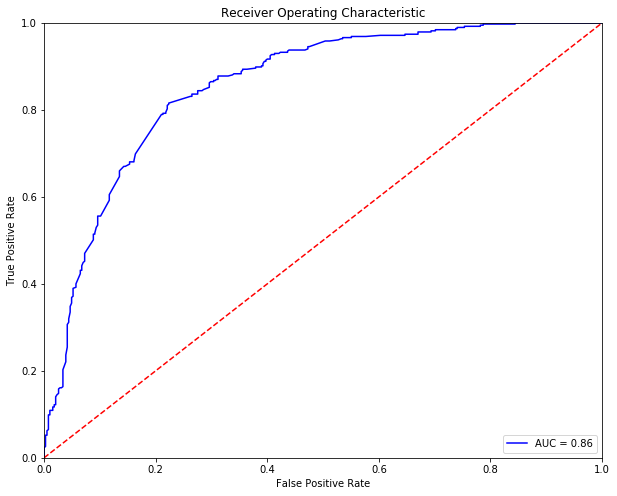

Optimal Threshold is 0.509572270541
Accuracy on test data is: 0.767532467532


Predicted  0.0  1.0  __all__
Actual                      
0.0        322   63      385
1.0        116  269      385
__all__    438  332      770

In [98]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [99]:
table_80_50_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

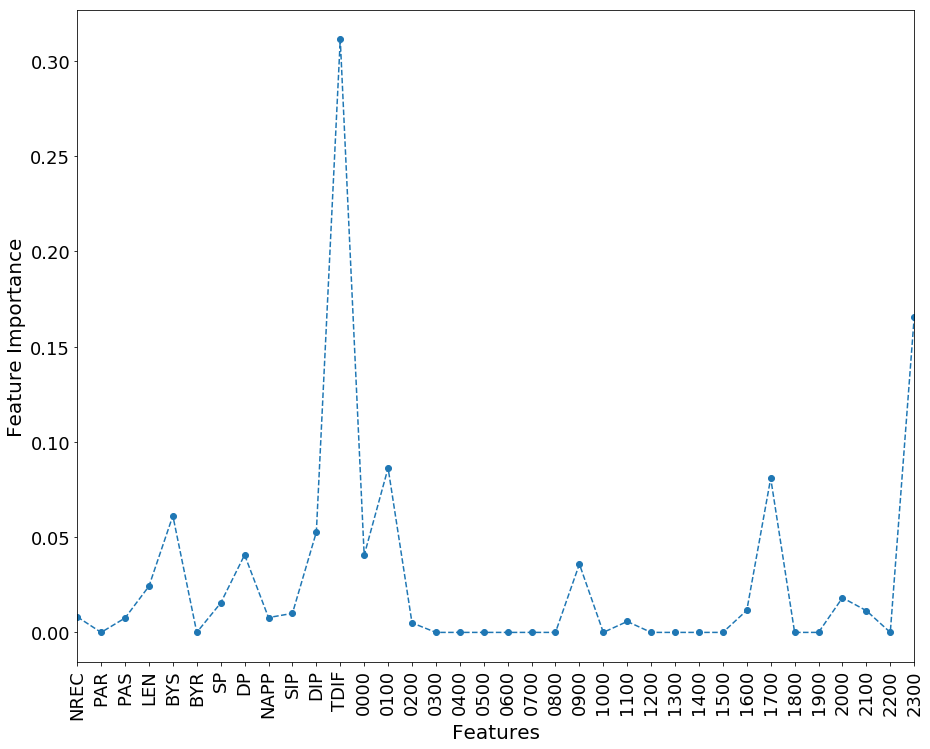

In [100]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [101]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.2  exponential                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.799414824447

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1155   383     1538
1           234  1304     1538
__all__    1389  1687     3076

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.78961038961

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          282  103      385
1           59  326      385
__all__    341  429      770

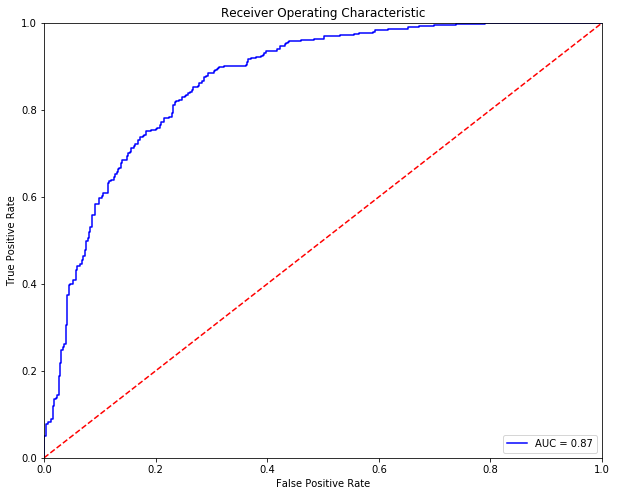

Optimal Threshold is 0.570168965084
Accuracy on test data is: 0.781818181818


Predicted  0.0  1.0  __all__
Actual                      
0.0        302   83      385
1.0         85  300      385
__all__    387  383      770

In [102]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [103]:
table_80_50_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

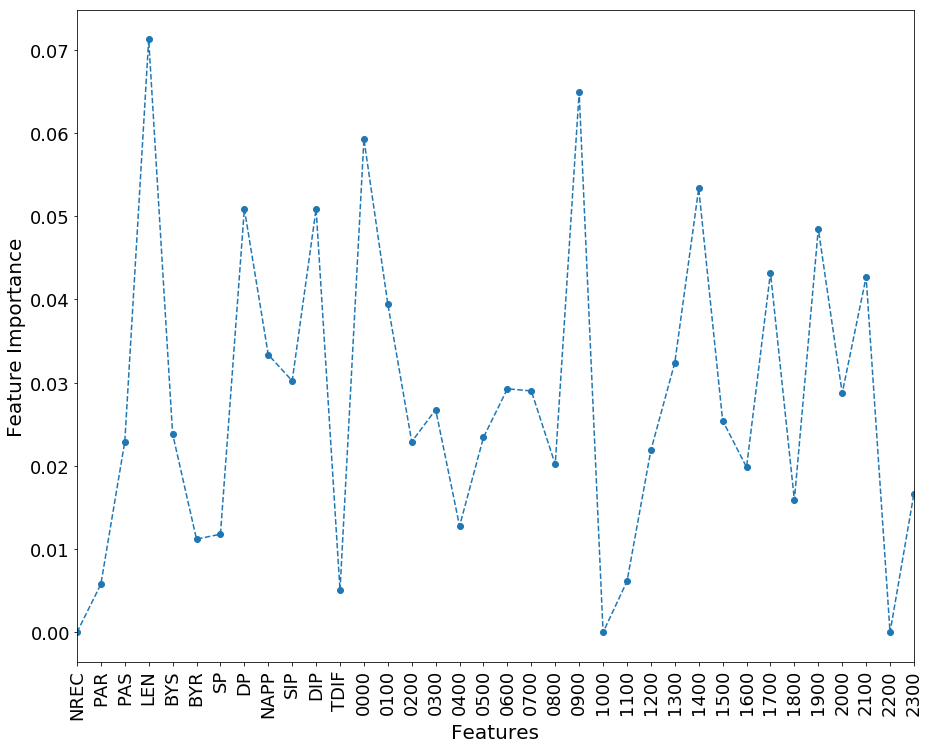

In [104]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [105]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.765929778934

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1024   514     1538
1           206  1332     1538
__all__    1230  1846     3076

Accuracy of the  Extra Decision Tree  model for test data is: 0.775324675325

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          259  126      385
1           47  338      385
__all__    306  464      770

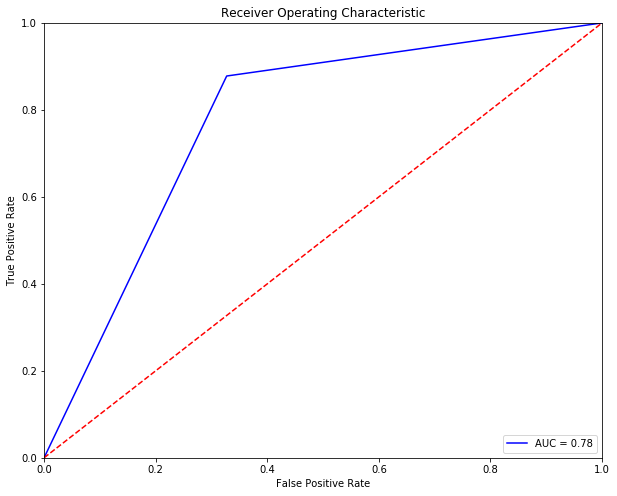

Optimal Threshold is 0.721560130011
Accuracy on test data is: 0.5


Predicted  0.0  1.0  __all__
Actual                      
0.0        385    0      385
1.0        385    0      385
__all__    770    0      770

In [106]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [107]:
table_80_50_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [108]:
%%capture
table_80_50_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

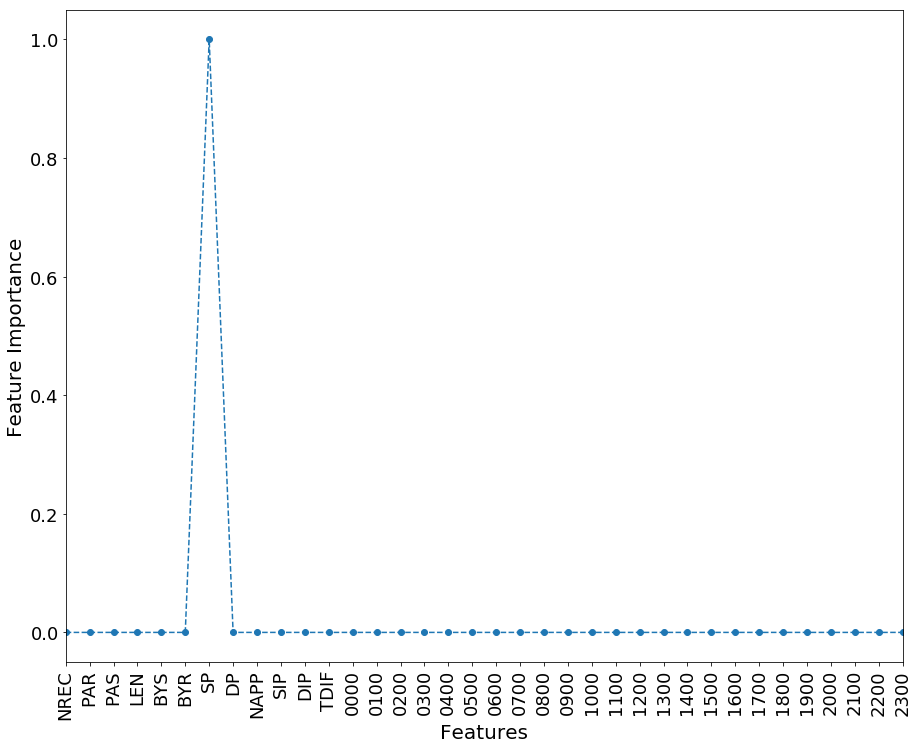

In [109]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [110]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.928803641092

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1406   132     1538
1            87  1451     1538
__all__    1493  1583     3076

Accuracy of the  Bagging  model for test data is: 0.78961038961

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          285  100      385
1           62  323      385
__all__    347  423      770

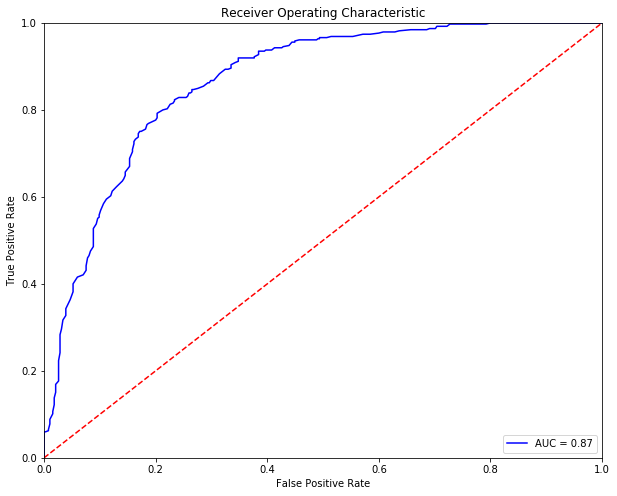

Optimal Threshold is 0.56
Accuracy on test data is: 0.78961038961


Predicted  0.0  1.0  __all__
Actual                      
0.0        307   78      385
1.0         84  301      385
__all__    391  379      770

In [111]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [112]:
table_80_50_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [113]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.907672301691


Predicted     0     1  __all__
Actual                        
0          1370   168     1538
1           116  1422     1538
__all__    1486  1590     3076

The test accuracy is: 0.78961038961


Predicted    0    1  __all__
Actual                      
0          291   94      385
1           68  317      385
__all__    359  411      770

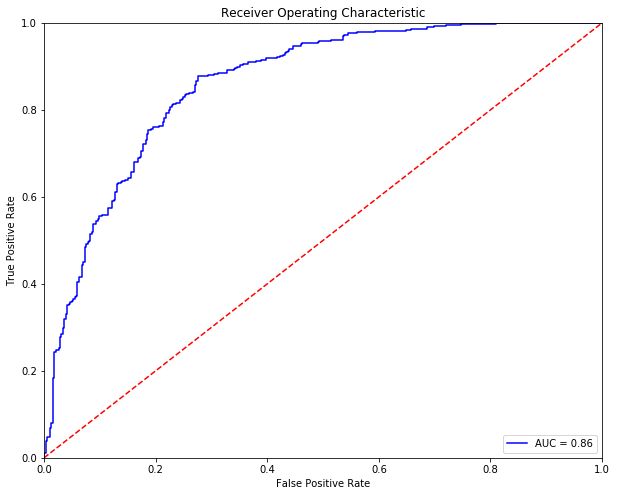

Optimal Threshold is 0.549584726524
Accuracy on test data is: 0.783116883117


Predicted  0.0  1.0  __all__
Actual                      
0.0        302   83      385
1.0         84  301      385
__all__    386  384      770

In [114]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [115]:
table_80_50_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [116]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.901495448635


Predicted     0     1  __all__
Actual                        
0          1463    75     1538
1           228  1310     1538
__all__    1691  1385     3076

The accuracy of the model on test data is: 0.757142857143


Predicted    0    1  __all__
Actual                      
0          310   75      385
1          112  273      385
__all__    422  348      770

 32/770 [>.............................] - ETA: 0s

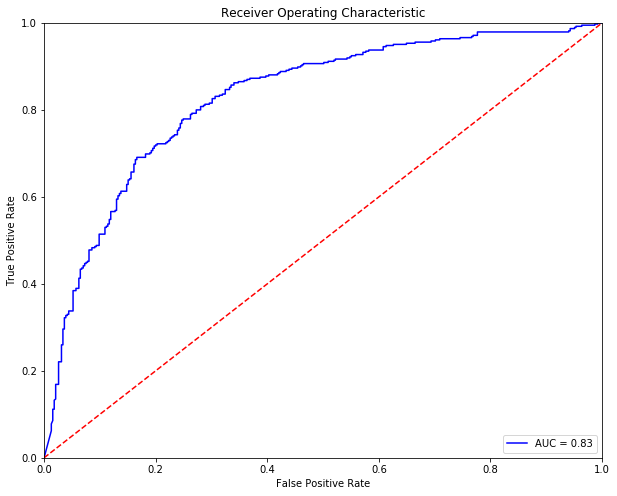

Optimal Threshold is 0.363689
Accuracy of Logistic Model on training data is: 0.757142857143


Predicted  0.0  1.0  __all__
Actual                      
0.0        292   93      385
1.0         94  291      385
__all__    386  384      770

In [117]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [118]:
table_80_50_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [119]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished


The accuracy of the model on training data is: 0.790312093628


Predicted     0     1  __all__
Actual                        
0          1158   380     1538
1           265  1273     1538
__all__    1423  1653     3076

The accuracy of the model on test data is: 0.788311688312


Predicted    0    1  __all__
Actual                      
0          289   96      385
1           67  318      385
__all__    356  414      770

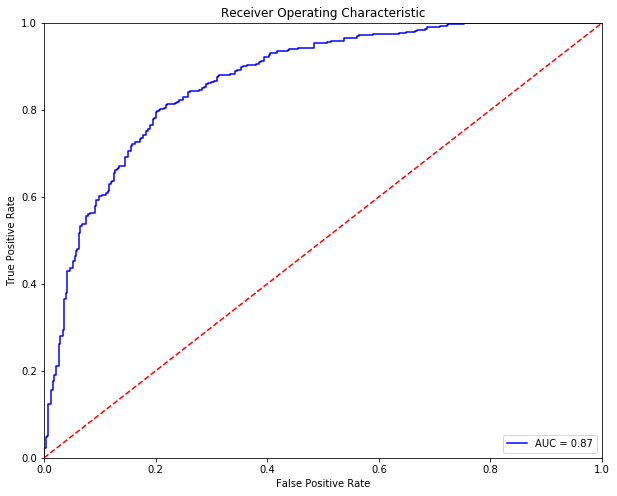

Optimal Threshold is 0.589394
Accuracy on test data is: 0.796103896104


Predicted  0.0  1.0  __all__
Actual                      
0.0        307   78      385
1.0         79  306      385
__all__    386  384      770

In [120]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [121]:
table_80_50_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [122]:
table_80_50_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1538.0  1538.0    0.0    0.0  0.000000   
LogisticRegression          0.766580  1194.0  1164.0  374.0  344.0  0.243173   
RandomForestClassifier      0.776333  1271.0  1117.0  421.0  267.0  0.273732   
AdaBoostClassifier          0.789012  1290.0  1137.0  401.0  248.0  0.260728   
GradientBoostingClassifier  0.799415  1304.0  1155.0  383.0  234.0  0.249025   
ExtraTreeClassifier         0.765930  1332.0  1024.0  514.0  206.0  0.334200   
BaggingClassifier           0.928804  1451.0  1406.0  132.0   87.0  0.085826   
VotingClassifier            0.907672  1422.0  1370.0  168.0  116.0  0.109233   
Neural Network-1            0.901495  1310.0  1463.0   75.0  228.0  0.048765   
Neural-Network-2            0.790312  1273.0  1158.0  380.0  265.0  0.247074   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.223667  
RandomForestClassifier      0.173602  
AdaBoostClassifier          0.161248  
GradientBoostingClassifier  0.152146  
ExtraTreeClassifier         0.133940  
BaggingClassifier           0.056567  
VotingClassifier            0.075423  
Neural Network-1            0.148244  
Neural-Network-2            0.172302

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.797403  323.0  291.0   94.0   62.0  0.244156   
LogisticRegression          0.779221  305.0  295.0   90.0   80.0  0.233766   
RandomForestClassifier      0.793506  325.0  286.0   99.0   60.0  0.257143   
AdaBoostClassifier          0.800000  321.0  295.0   90.0   64.0  0.233766   
GradientBoostingClassifier  0.789610  326.0  282.0  103.0   59.0  0.267532   
ExtraTreeClassifier         0.775325  338.0  259.0  126.0   47.0  0.327273   
BaggingClassifier           0.789610  323.0  285.0  100.0   62.0  0.259740   
VotingClassifier            0.789610  317.0  291.0   94.0   68.0  0.244156   
Neural Network-1            0.757143  273.0  310.0   75.0  112.0  0.194805   
Neural-Network-2            0.788312  318.0  289.0   96.0   67.0  0.249351   

                                 FNR  
index                                 
KNeighborsClassifier        0.161039  
LogisticRegression          0.207792  
RandomForestClassifier      0.155844  
AdaBoostClassifier          0.166234  
GradientBoostingClassifier  0.153247  
ExtraTreeClassifier         0.122078  
BaggingClassifier           0.161039  
VotingClassifier            0.176623  
Neural Network-1            0.290909  
Neural-Network-2            0.174026

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.788312  302.0  305.0   80.0   83.0  0.207792   
LogisticRegression          0.777922  299.0  300.0   85.0   86.0  0.220779   
RandomForestClassifier      0.777922  298.0  301.0   84.0   87.0  0.218182   
AdaBoostClassifier          0.767532  269.0  322.0   63.0  116.0  0.163636   
GradientBoostingClassifier  0.781818  300.0  302.0   83.0   85.0  0.215584   
ExtraTreeClassifier         0.500000  192.5  192.5  192.5  192.5  0.500000   
BaggingClassifier           0.789610  301.0  307.0   78.0   84.0  0.202597   
VotingClassifier            0.783117  301.0  302.0   83.0   84.0  0.215584   
Neural Network-1            0.757143  291.0  292.0   93.0   94.0  0.241558   
Neural-Network-2            0.796104  306.0  307.0   78.0   79.0  0.202597   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.215584   0.552448  0.856860  
LogisticRegression          0.223377   0.517578  0.857129  
RandomForestClassifier      0.225974   0.678074  0.851779  
AdaBoostClassifier          0.301299   0.509572  0.856276  
GradientBoostingClassifier  0.220779   0.570169  0.867654  
ExtraTreeClassifier         0.500000   0.721560  0.775325  
BaggingClassifier           0.218182   0.560000  0.865323  
VotingClassifier            0.218182   0.549585  0.860995  
Neural Network-1            0.244156   0.363689  0.827060  
Neural-Network-2            0.205195   0.589394  0.868038

In [123]:
table_80_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [124]:
table_80_50_train_avg['accuracy']=(table_80_50_train['accuracy']+table_80_50_10_train['accuracy']+table_80_50_20_train['accuracy'])/3.0
table_80_50_train_avg['FPR']=(table_80_50_train['FPR']+table_80_50_10_train['FPR']+table_80_50_20_train['FPR'])/3.0
table_80_50_train_avg['FNR']=(table_80_50_train['FNR']+table_80_50_10_train['FNR']+table_80_50_20_train['FNR'])/3.0

In [125]:
table_80_50_test_avg['accuracy']=(table_80_50_test['accuracy']+table_80_50_10_test['accuracy']+table_80_50_20_test['accuracy'])/3.0
table_80_50_test_avg['FPR']=(table_80_50_test['FPR']+table_80_50_10_test['FPR']+table_80_50_20_test['FPR'])/3.0
table_80_50_test_avg['FNR']=(table_80_50_test['FNR']+table_80_50_10_test['FNR']+table_80_50_20_test['FNR'])/3.0

In [126]:
table_80_50_test_roc_avg['accuracy']=(table_80_50_test_roc['accuracy']+table_80_50_10_test_roc['accuracy']+table_80_50_20_test_roc['accuracy'])/3.0
table_80_50_test_roc_avg['FPR']=(table_80_50_test_roc['FPR']+table_80_50_10_test_roc['FPR']+table_80_50_20_test_roc['FPR'])/3.0
table_80_50_test_roc_avg['FNR']=(table_80_50_test_roc['FNR']+table_80_50_10_test_roc['FNR']+table_80_50_20_test_roc['FNR'])/3.0
table_80_50_test_roc_avg['auc']=(table_80_50_test_roc['auc']+table_80_50_10_test_roc['auc']+table_80_50_20_test_roc['auc'])/3.0

In [127]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.769939  0.226329  0.233739
RandomForestClassifier      0.778175  0.260930  0.183026
AdaBoostClassifier          0.788687  0.250503  0.172413
GradientBoostingClassifier  0.802557  0.243073  0.152107
ExtraTreeClassifier         0.772107  0.297234  0.159073
BaggingClassifier           0.968357  0.036194  0.027091
VotingClassifier            0.906805  0.108131  0.078324
Neural Network-1            0.912874  0.043089  0.131263
Neural-Network-2            0.798873  0.247235  0.155377

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.789177  0.240495  0.180004
LogisticRegression          0.775758  0.229624  0.218867
RandomForestClassifier      0.790043  0.254314  0.164245
AdaBoostClassifier          0.793939  0.248188  0.162303
GradientBoostingClassifier  0.787446  0.267128  0.156559
ExtraTreeClassifier         0.778788  0.296070  0.144174
BaggingClassifier           0.789177  0.262679  0.157355
VotingClassifier            0.788745  0.254290  0.166909
Neural Network-1            0.742424  0.230990  0.282765
Neural-Network-2            0.784416  0.273011  0.156520

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.780952  0.217448  0.220660  0.848931
LogisticRegression          0.774892  0.223582  0.226667  0.848707
RandomForestClassifier      0.786147  0.212624  0.215162  0.844043
AdaBoostClassifier          0.774892  0.201247  0.248989  0.848750
GradientBoostingClassifier  0.784416  0.213332  0.217887  0.859901
ExtraTreeClassifier         0.503896  0.503896  0.496104  0.779878
BaggingClassifier           0.783983  0.210716  0.221332  0.854445
VotingClassifier            0.780519  0.218517  0.220480  0.847265
Neural Network-1            0.749351  0.249119  0.252174  0.793862
Neural-Network-2            0.788312  0.209744  0.213641  0.853431

###  <a id='1.B' style="text-decoration : none; color : #000000;">B. 70:30 Train Test Split</a>
#### Random State 0

In [128]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC        PAR       PAS  \
Source_User                                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   342  10.783626  9.897661   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...    42   9.476190  9.595238   

                                                           LEN          BYS  \
Source_User                                                                   
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   83.982456  2232.368421   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  119.285714  1357.809524   

                                                            BYR     SP    DP  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  7639.970760  337.0  14.0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  5211.809524   42.0   3.0   

                                                    NAPP  SIP  DIP  \
Source_User                                                          
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    22   30  123   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     7    3   20   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  13642.195906    12     5   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...   2319.000000     0     0   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     0     0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     3     6   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    16     5     4    14   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     8     1   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     9    25    46    27   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     9    24     0     0   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    98    16    38    12   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    2200  2300  
Source_User                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     6     0  
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0

In [129]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60f2b14eb15d59dd611    1
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35cc79ee014e30c7f27    0
73e7f427173ebaafa2447cafcfa05e11aac3dfda1d0a63d542395a7c9f3e41dd    0
e931f318e6d489b8c1fefcdbcc9f1678c3f5fc95b51fa9675b0130c2003885ef    1
bae671359bbc14c02f9f8ebc82ce508a719fc67b20861aeac0eae50765512ad3    1
97435f766a7f2b4ddea9ef289247eb80b7949d19813e662b41df10ee82d45dff    1
e83f41f7465c7b228abaffb01c879bfa306d44170328d408d6da9a1e0bfb9d30    1
d0e61d1a66521a1545404096ea9271bb53d3e19eefa1331754ca58c1cfbaff31    1
aaca5cdcccf23e9d5f1debe1ec0528fc5550ffe99f2f4a55a71e89ee95af52c9    1
5c5d234bdd7acfc32b04705b11fd0a5f4557d8d386e1a39a22cf728208b003e9    0
Name: Target, dtype: int64

In [130]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [131]:
## Table to store training and test measures
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           50  uniform

Accuracy of the  KNN  model for the training data is: 0.767087667162

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1014   330     1344
1           297  1051     1348
__all__    1311  1381     2692

Accuracy of the  KNN  model for test data is: 0.793760831889

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          454  125      579
1          113  462      575
__all__    567  587     1154

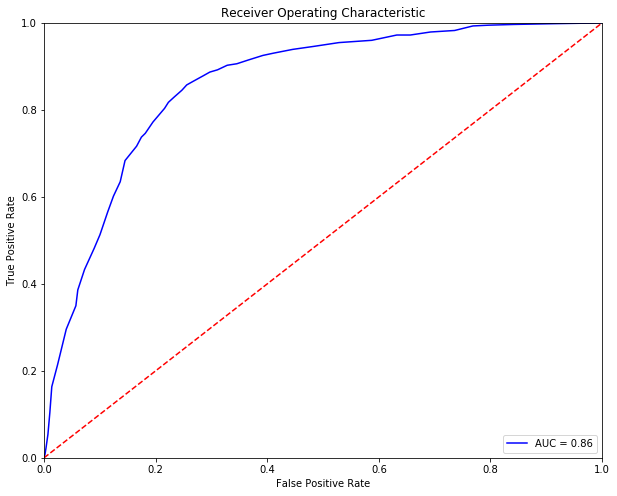

Optimal Threshold is 0.52
Accuracy on test data is: 0.79116117851


Predicted  0.0  1.0  __all__
Actual                      
0.0        460  119      579
1.0        122  453      575
__all__    582  572     1154

In [133]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [134]:
table_70_50_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [135]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5       100  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  0.001

Accuracy of the  Logistic  model for the training data is: 0.761515601783

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1014   330     1344
1           312  1036     1348
__all__    1326  1366     2692

Accuracy of the  Logistic  model for test data is: 0.773830155979

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          448  131      579
1          130  445      575
__all__    578  576     1154

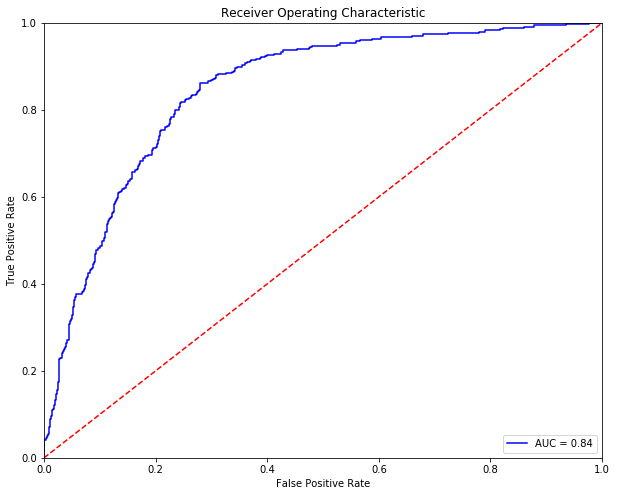

Optimal Threshold is 0.499495082065
Accuracy on test data is: 0.775563258232


Predicted  0.0  1.0  __all__
Actual                      
0.0        448  131      579
1.0        128  447      575
__all__    576  578     1154

In [136]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [137]:
table_70_50_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [138]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.770430906389

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           962   382     1344
1           236  1112     1348
__all__    1198  1494     2692

Accuracy of the  Random Forest Trees  model for test data is: 0.79116117851

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          432  147      579
1           94  481      575
__all__    526  628     1154

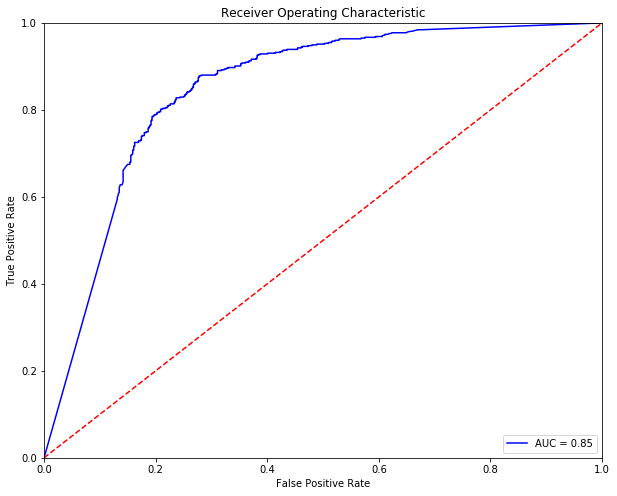

Optimal Threshold is 0.665220064659
Accuracy on test data is: 0.794627383016


Predicted  0.0  1.0  __all__
Actual                      
0.0        461  118      579
1.0        119  456      575
__all__    580  574     1154

In [139]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [140]:
table_70_50_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

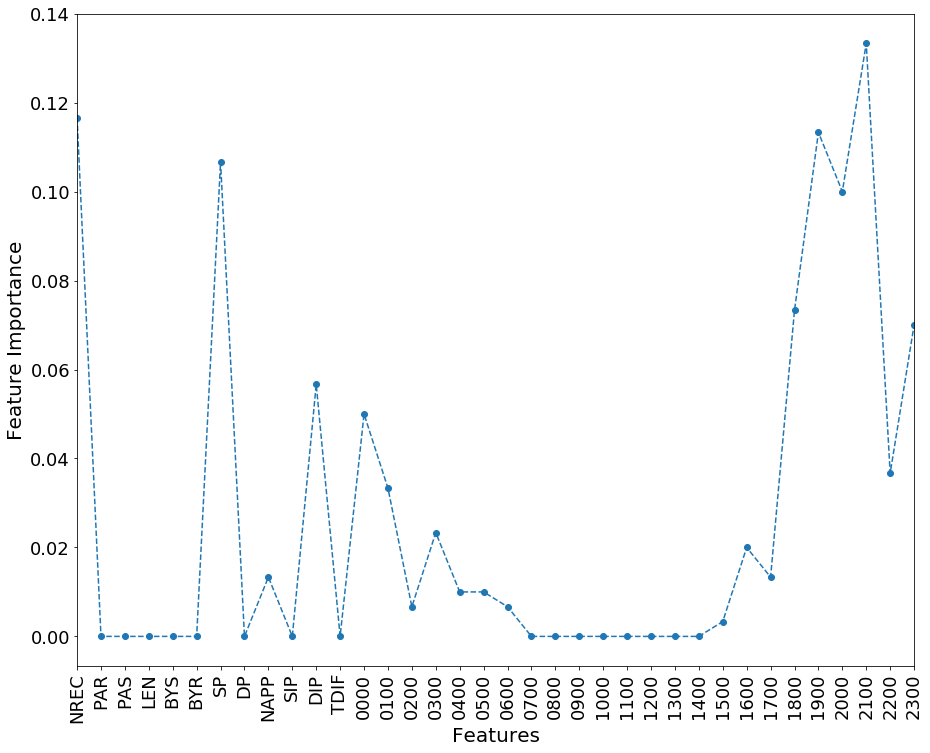

In [141]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [142]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           150             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.799777117385

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1013   331     1344
1           208  1140     1348
__all__    1221  1471     2692

Accuracy of the  AdaBoostClassifier  model for test data is: 0.785095320624

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          434  145      579
1          103  472      575
__all__    537  617     1154

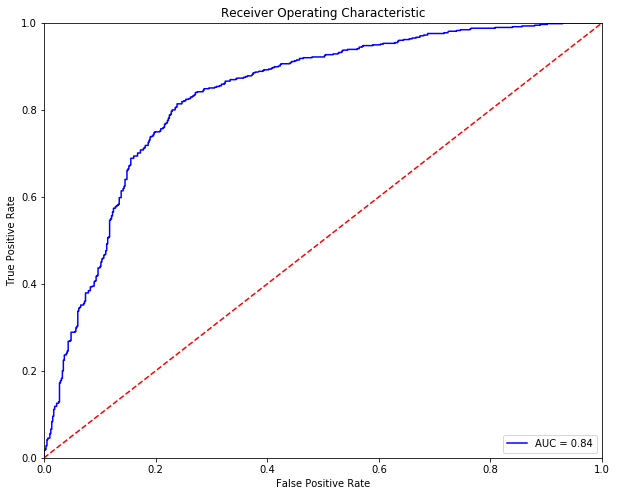

Optimal Threshold is 0.500936547593
Accuracy on test data is: 0.777296360485


Predicted  0.0  1.0  __all__
Actual                      
0.0        451  128      579
1.0        129  446      575
__all__    580  574     1154

In [143]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [144]:
table_70_50_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

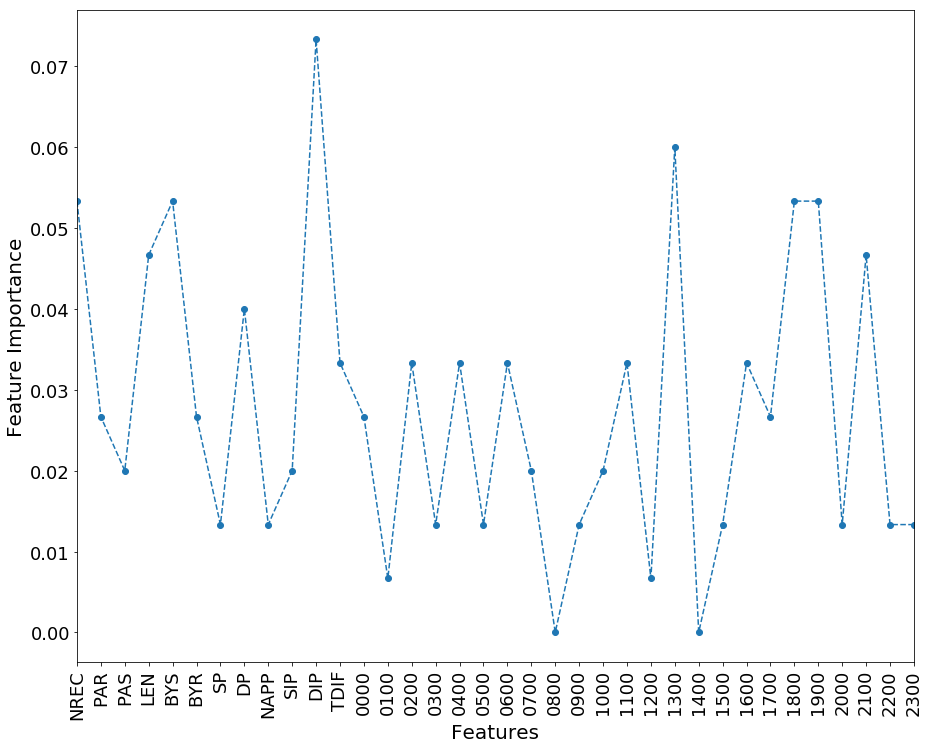

In [145]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [146]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.05  exponential                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.791976225854

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           995   349     1344
1           211  1137     1348
__all__    1206  1486     2692

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.803292894281

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          438  141      579
1           86  489      575
__all__    524  630     1154

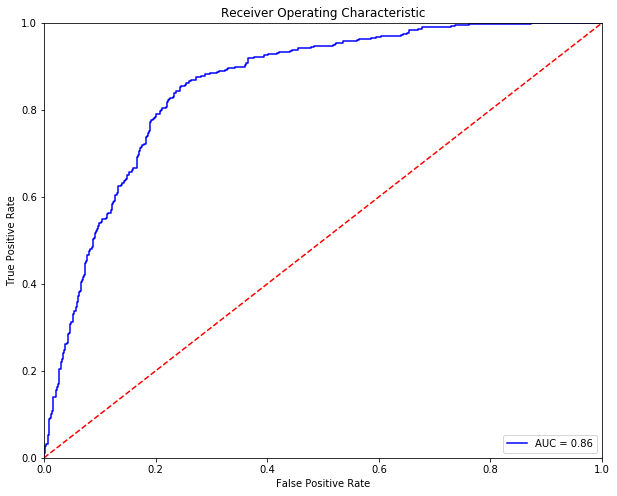

Optimal Threshold is 0.590023018949
Accuracy on test data is: 0.792027729636


Predicted  0.0  1.0  __all__
Actual                      
0.0        460  119      579
1.0        121  454      575
__all__    581  573     1154

In [147]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [148]:
table_70_50_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

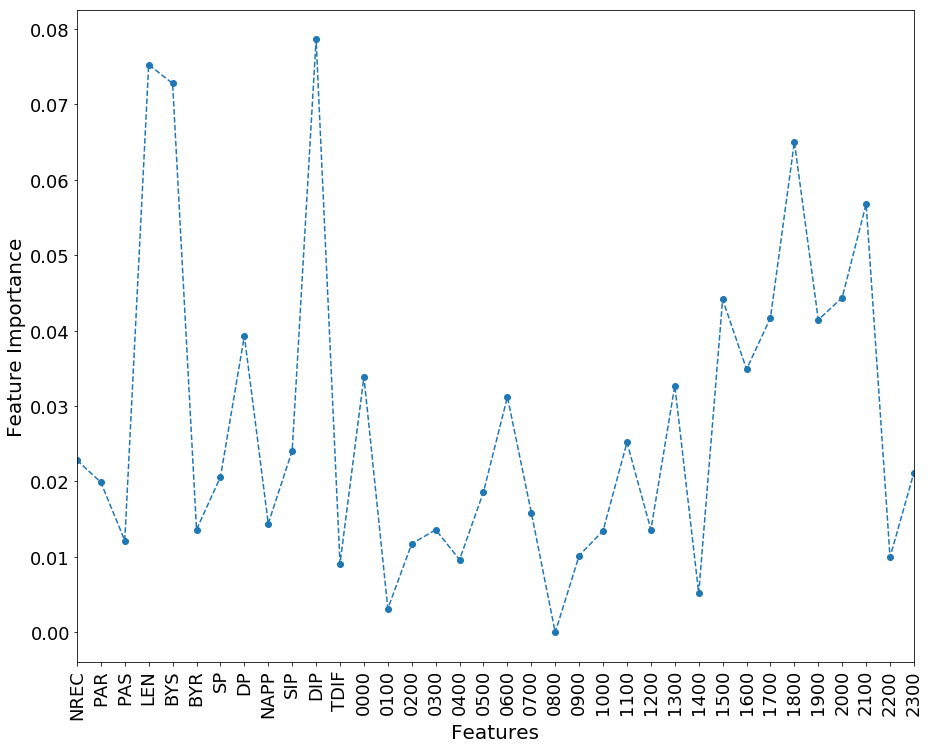

In [149]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [150]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.765973254086

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           931   413     1344
1           217  1131     1348
__all__    1148  1544     2692

Accuracy of the  Extra Decision Tree  model for test data is: 0.78596187175

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          418  161      579
1           86  489      575
__all__    504  650     1154

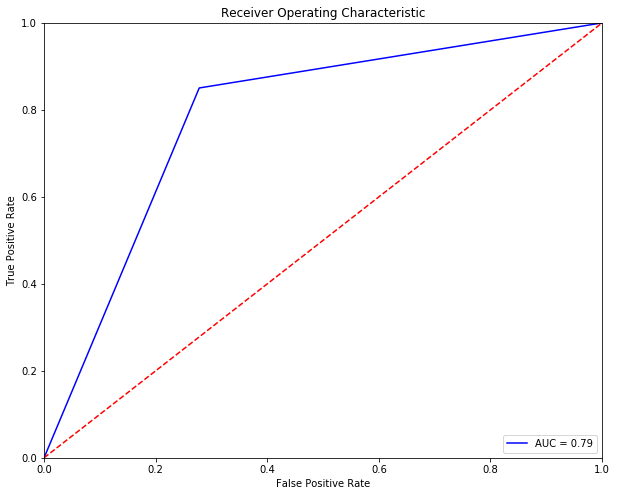

Optimal Threshold is 0.732512953368
Accuracy on test data is: 0.501733102253


Predicted   0.0  1.0  __all__
Actual                       
0.0         579    0      579
1.0         575    0      575
__all__    1154    0     1154

In [151]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [152]:
table_70_50_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [153]:
%%capture
table_70_50_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

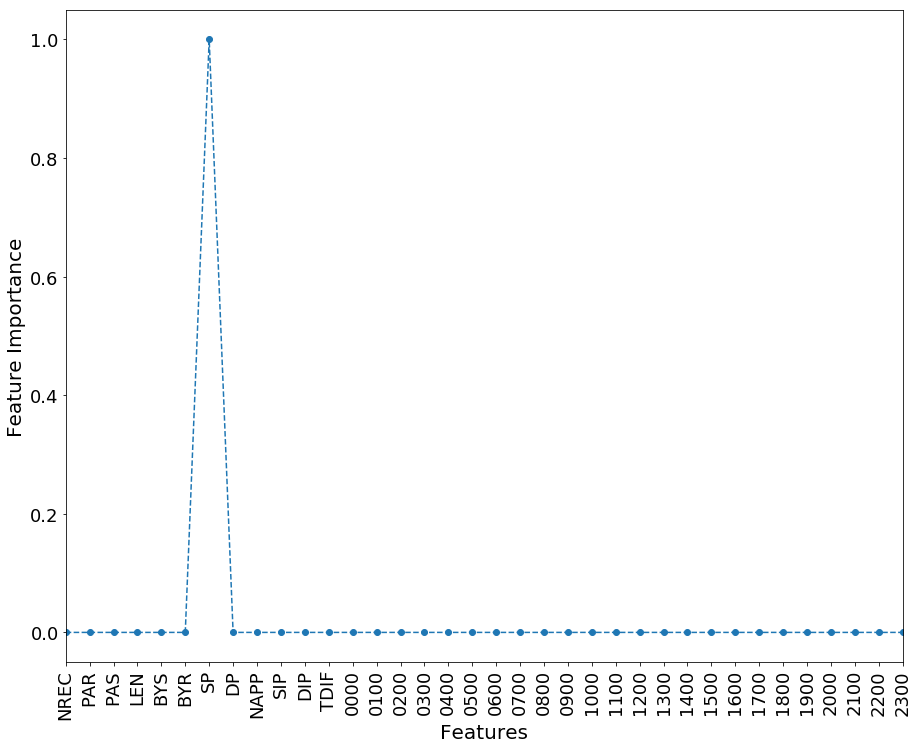

In [154]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [155]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.932763744428

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1230   114     1344
1            67  1281     1348
__all__    1297  1395     2692

Accuracy of the  Bagging  model for test data is: 0.798960138648

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          430  149      579
1           83  492      575
__all__    513  641     1154

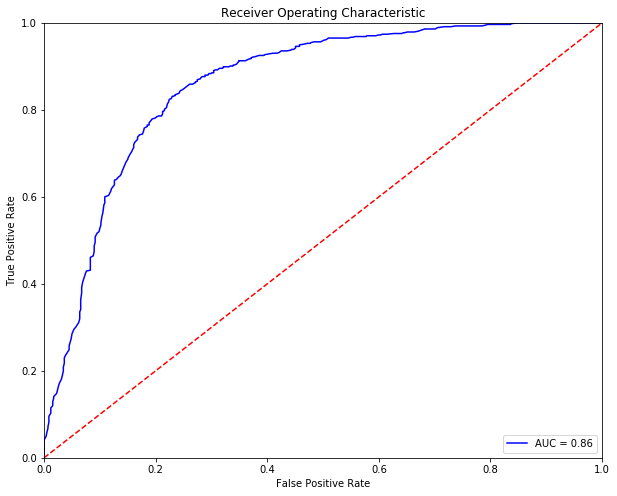

Optimal Threshold is 0.57
Accuracy on test data is: 0.790294627383


Predicted  0.0  1.0  __all__
Actual                      
0.0        460  119      579
1.0        123  452      575
__all__    583  571     1154

In [156]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [157]:
table_70_50_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [158]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.91456166419


Predicted     0     1  __all__
Actual                        
0          1211   133     1344
1            97  1251     1348
__all__    1308  1384     2692

The test accuracy is: 0.786828422877


Predicted    0    1  __all__
Actual                      
0          438  141      579
1          105  470      575
__all__    543  611     1154

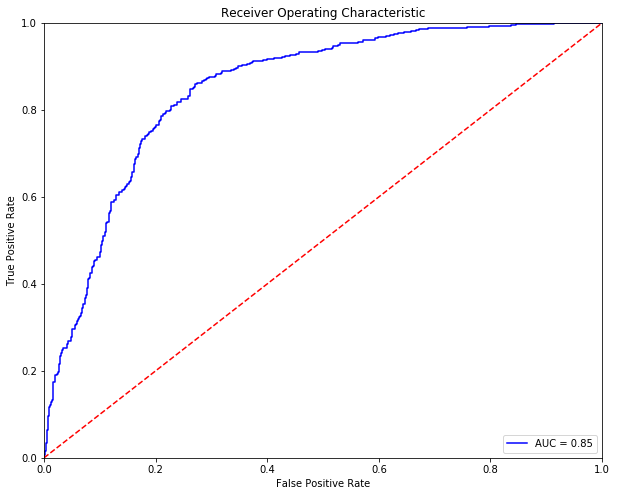

Optimal Threshold is 0.552786221699
Accuracy on test data is: 0.787694974003


Predicted  0.0  1.0  __all__
Actual                      
0.0        457  122      579
1.0        123  452      575
__all__    580  574     1154

In [159]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [160]:
table_70_50_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [161]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.944279346211


Predicted     0     1  __all__
Actual                        
0          1296    48     1344
1           102  1246     1348
__all__    1398  1294     2692

The accuracy of the model on test data is: 0.745233968804


Predicted    0    1  __all__
Actual                      
0          438  141      579
1          153  422      575
__all__    591  563     1154

  32/1154 [..............................] - ETA: 0s

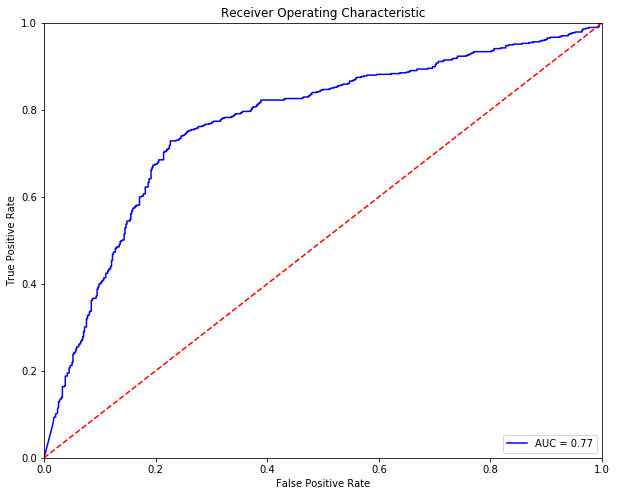

Optimal Threshold is 0.46987
Accuracy of Logistic Model on training data is: 0.745233968804


Predicted  0.0  1.0  __all__
Actual                      
0.0        432  147      579
1.0        147  428      575
__all__    579  575     1154

In [162]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [163]:
table_70_50_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [164]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.7min finished


The accuracy of the model on training data is: 0.789004457652


Predicted     0     1  __all__
Actual                        
0          1027   317     1344
1           251  1097     1348
__all__    1278  1414     2692

The accuracy of the model on test data is: 0.774696707106


Predicted    0    1  __all__
Actual                      
0          438  141      579
1          119  456      575
__all__    557  597     1154

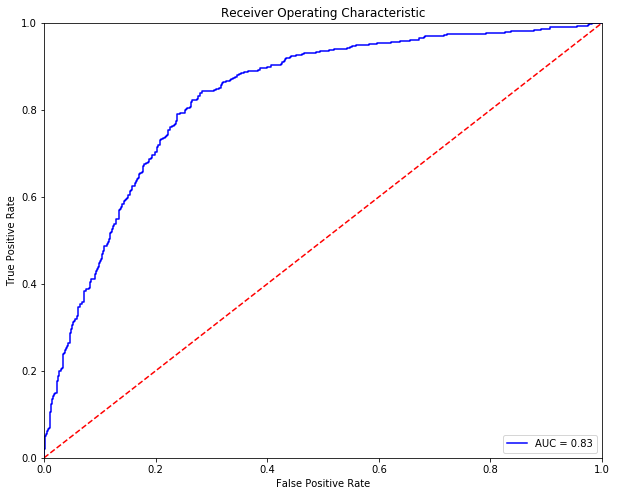

Optimal Threshold is 0.569182
Accuracy on test data is: 0.766031195841


Predicted  0.0  1.0  __all__
Actual                      
0.0        444  135      579
1.0        135  440      575
__all__    579  575     1154

In [165]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [166]:
table_70_50_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [167]:
table_70_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)
table_70_50_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.767088  1051.0  1014.0  330.0  297.0  0.245536   
LogisticRegression          0.761516  1036.0  1014.0  330.0  312.0  0.245536   
RandomForestClassifier      0.770431  1112.0   962.0  382.0  236.0  0.284226   
AdaBoostClassifier          0.799777  1140.0  1013.0  331.0  208.0  0.246280   
GradientBoostingClassifier  0.791976  1137.0   995.0  349.0  211.0  0.259673   
ExtraTreeClassifier         0.765973  1131.0   931.0  413.0  217.0  0.307292   
BaggingClassifier           0.932764  1281.0  1230.0  114.0   67.0  0.084821   
VotingClassifier            0.914562  1251.0  1211.0  133.0   97.0  0.098958   
Neural Network-1            0.944279  1246.0  1296.0   48.0  102.0  0.035714   
Neural-Network-2            0.789004  1097.0  1027.0  317.0  251.0  0.235863   

                                 FNR  
index                                 
KNeighborsClassifier        0.220326  
LogisticRegression          0.231454  
RandomForestClassifier      0.175074  
AdaBoostClassifier          0.154303  
GradientBoostingClassifier  0.156528  
ExtraTreeClassifier         0.160979  
BaggingClassifier           0.049703  
VotingClassifier            0.071958  
Neural Network-1            0.075668  
Neural-Network-2            0.186202

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.793761  462.0  454.0  125.0  113.0  0.215889   
LogisticRegression          0.773830  445.0  448.0  131.0  130.0  0.226252   
RandomForestClassifier      0.791161  481.0  432.0  147.0   94.0  0.253886   
AdaBoostClassifier          0.785095  472.0  434.0  145.0  103.0  0.250432   
GradientBoostingClassifier  0.803293  489.0  438.0  141.0   86.0  0.243523   
ExtraTreeClassifier         0.785962  489.0  418.0  161.0   86.0  0.278066   
BaggingClassifier           0.798960  492.0  430.0  149.0   83.0  0.257340   
VotingClassifier            0.786828  470.0  438.0  141.0  105.0  0.243523   
Neural Network-1            0.745234  422.0  438.0  141.0  153.0  0.243523   
Neural-Network-2            0.774697  456.0  438.0  141.0  119.0  0.243523   

                                 FNR  
index                                 
KNeighborsClassifier        0.196522  
LogisticRegression          0.226087  
RandomForestClassifier      0.163478  
AdaBoostClassifier          0.179130  
GradientBoostingClassifier  0.149565  
ExtraTreeClassifier         0.149565  
BaggingClassifier           0.144348  
VotingClassifier            0.182609  
Neural Network-1            0.266087  
Neural-Network-2            0.206957

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.791161  453.000000  460.000000  119.000000   
LogisticRegression          0.775563  447.000000  448.000000  131.000000   
RandomForestClassifier      0.794627  456.000000  461.000000  118.000000   
AdaBoostClassifier          0.777296  446.000000  451.000000  128.000000   
GradientBoostingClassifier  0.792028  454.000000  460.000000  119.000000   
ExtraTreeClassifier         0.501733  290.503466  288.496534  288.496534   
BaggingClassifier           0.790295  452.000000  460.000000  119.000000   
VotingClassifier            0.787695  452.000000  457.000000  122.000000   
Neural Network-1            0.745234  428.000000  432.000000  147.000000   
Neural-Network-2            0.766031  440.000000  444.000000  135.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        122.000000  0.205527  0.212174   0.520000   
LogisticRegression          128.000000  0.226252  0.222609   0.499495   
RandomForestClassifier      119.000000  0.203800  0.206957   0.665220   
AdaBoostClassifier          129.000000  0.221071  0.224348   0.500937   
GradientBoostingClassifier  121.000000  0.205527  0.210435   0.590023   
ExtraTreeClassifier         286.503466  0.501733  0.498267   0.732513   
BaggingClassifier           123.000000  0.205527  0.213913   0.570000   
VotingClassifier            123.000000  0.210708  0.213913   0.552786   
Neural Network-1            147.000000  0.253886  0.255652   0.469870   
Neural-Network-2            135.000000  0.233161  0.234783   0.569182   

                                 auc  
index                                 
KNeighborsClassifier        0.858851  
LogisticRegression          0.844833  
RandomForestClassifier      0.848153  
AdaBoostClassifier          0.835334  
GradientBoostingClassifier  0.857058  
ExtraTreeClassifier         0.786185  
BaggingClassifier           0.860060  
VotingClassifier            0.849119  
Neural Network-1            0.770879  
Neural-Network-2            0.830595

#### Random State 10

In [168]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  2984  216.771448   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   264   25.242424   

                                                          PAS        LEN  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  74.177949  82.084115   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  35.803030  69.193182   

                                                             BYS  \
Source_User                                                        
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   9038.178284   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  30610.265152   

                                                              BYR      SP  \
Source_User                                                                 
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  286763.437332  2689.0   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   11302.988636   263.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  13.0    45   19  784   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   7.0    19   36   97   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   1642.074397   265   188   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  17986.772727     0     5   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   248    39    82    43   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0    16     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   112    20    50    46   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0     6    51   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    89    81    80   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    45    11     8     9   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    70   200   116   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    20     2     6    13   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   195   158   176   167   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     4    42    18     8   

                                                    2200  2300  
Source_User                                                     
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   116   233  
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0

In [169]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5bed0d545a1327be88    1
7d72b802c8934804b499a7b417a31857b112353b42885b2290ff09aeef55bebf    0
c59c78cbcb78f0f7140cef977c9016a08b9d4d91bc5b2e537327b2ab2b791f95    1
8b4f22fd3269f43630ef23cc553c80f72740dcc05fec14b0caad367768ce21a4    1
caea0e5257613ba78f187ac0616758755573aa9b58006fb8a5b671496fc3e392    1
f7cbcf0d21066d971d1948c618f66de0188cb7326b8c198ddd66d18d7e4d91bd    1
d487fb3eaf4e620ba1acd93bfce4387f10e162062f03f15f813c62481bf0a518    1
60430a2cacf66446dae118e6f4b204221901dcd2f3a3faffee16848f2ae9d0ec    1
becf4f677fab6f341e04c1c6ef46ae9d5c90175660426fb33dbd7ed850aec06d    0
f0ae081c92bfcbd5f316ae0d19db53b6a9edfdfc687166f2a5b4e6eb60d9c9ed    1
Name: Target, dtype: int64

In [170]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [171]:
## Table to store training and test measures
table_70_50_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           50  uniform

Accuracy of the  KNN  model for the training data is: 0.790118870728

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1064   280     1344
1           285  1063     1348
__all__    1349  1343     2692

Accuracy of the  KNN  model for test data is: 0.7712305026

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          440  139      579
1          125  450      575
__all__    565  589     1154

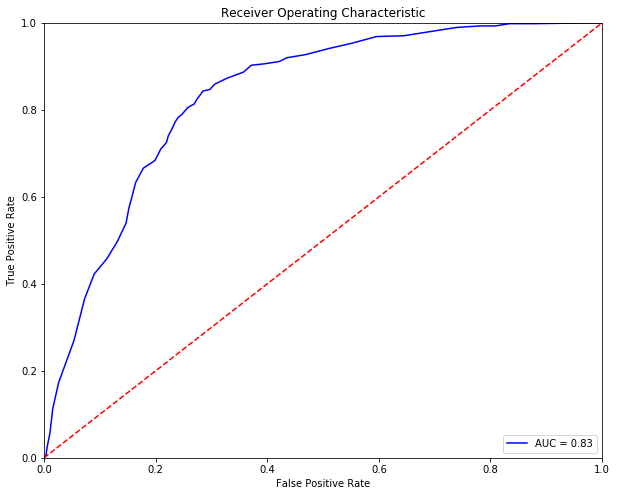

Optimal Threshold is 0.54
Accuracy on test data is: 0.762564991334


Predicted  0.0  1.0  __all__
Actual                      
0.0        447  132      579
1.0        142  433      575
__all__    589  565     1154

In [173]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [174]:
table_70_50_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [175]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50          ovr   

             6          7    8  
index  penalty     solver  tol  
0           l2  newton-cg  0.1

Accuracy of the  Logistic  model for the training data is: 0.787147102526

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1070   274     1344
1           299  1049     1348
__all__    1369  1323     2692

Accuracy of the  Logistic  model for test data is: 0.767764298094

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          441  138      579
1          130  445      575
__all__    571  583     1154

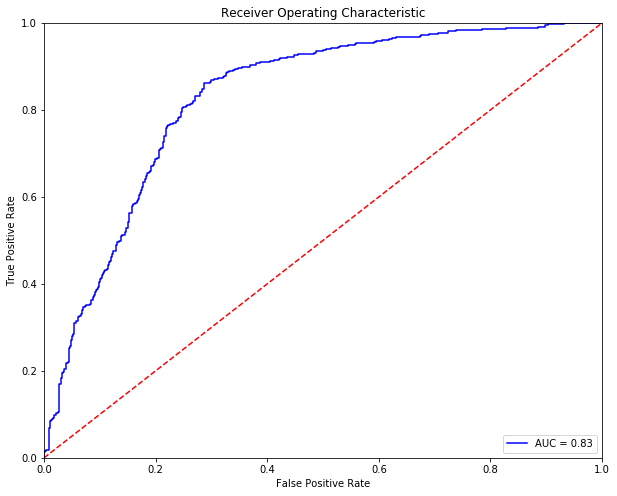

Optimal Threshold is 0.515337738274
Accuracy on test data is: 0.76863084922


Predicted  0.0  1.0  __all__
Actual                      
0.0        446  133      579
1.0        134  441      575
__all__    580  574     1154

In [176]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [177]:
table_70_50_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [178]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0        entropy         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.791233283804

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1048   296     1344
1           266  1082     1348
__all__    1314  1378     2692

Accuracy of the  Random Forest Trees  model for test data is: 0.775563258232

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          433  146      579
1          113  462      575
__all__    546  608     1154

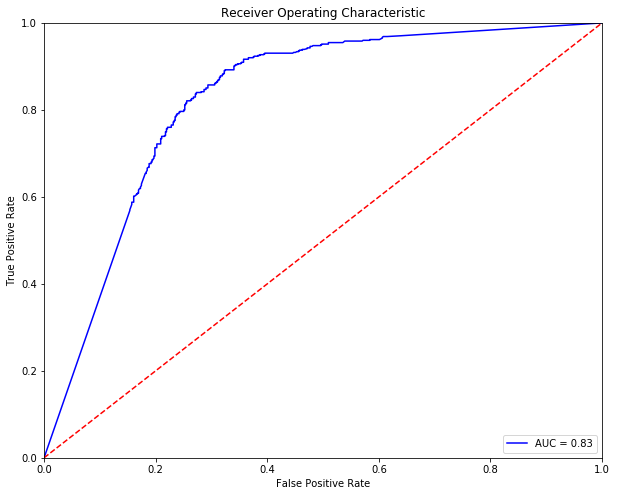

Optimal Threshold is 0.656680310387
Accuracy on test data is: 0.767764298094


Predicted  0.0  1.0  __all__
Actual                      
0.0        446  133      579
1.0        135  440      575
__all__    581  573     1154

In [179]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [180]:
table_70_50_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

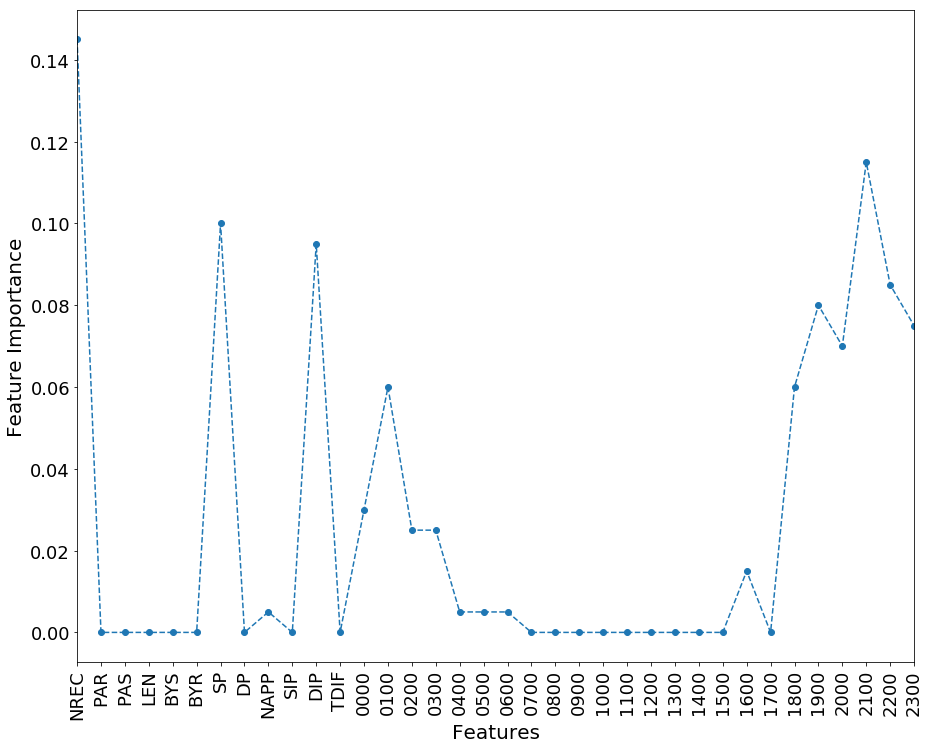

In [181]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [182]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.803120356612

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1031   313     1344
1           217  1131     1348
__all__    1248  1444     2692

Accuracy of the  AdaBoostClassifier  model for test data is: 0.777296360485

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          419  160      579
1           97  478      575
__all__    516  638     1154

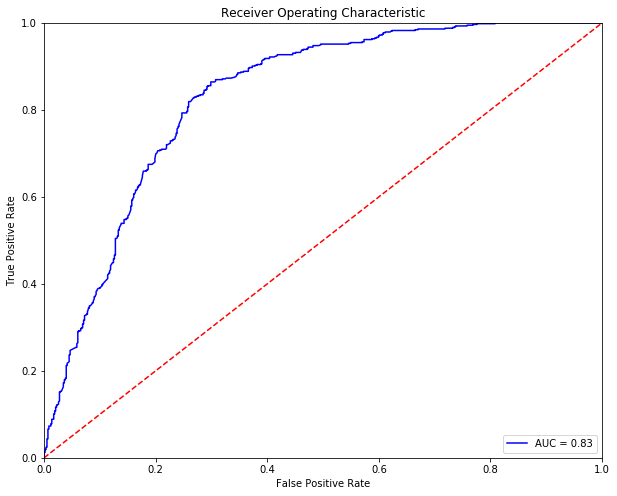

Optimal Threshold is 0.511274350534
Accuracy on test data is: 0.759098786828


Predicted  0.0  1.0  __all__
Actual                      
0.0        441  138      579
1.0        140  435      575
__all__    581  573     1154

In [183]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [184]:
table_70_50_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

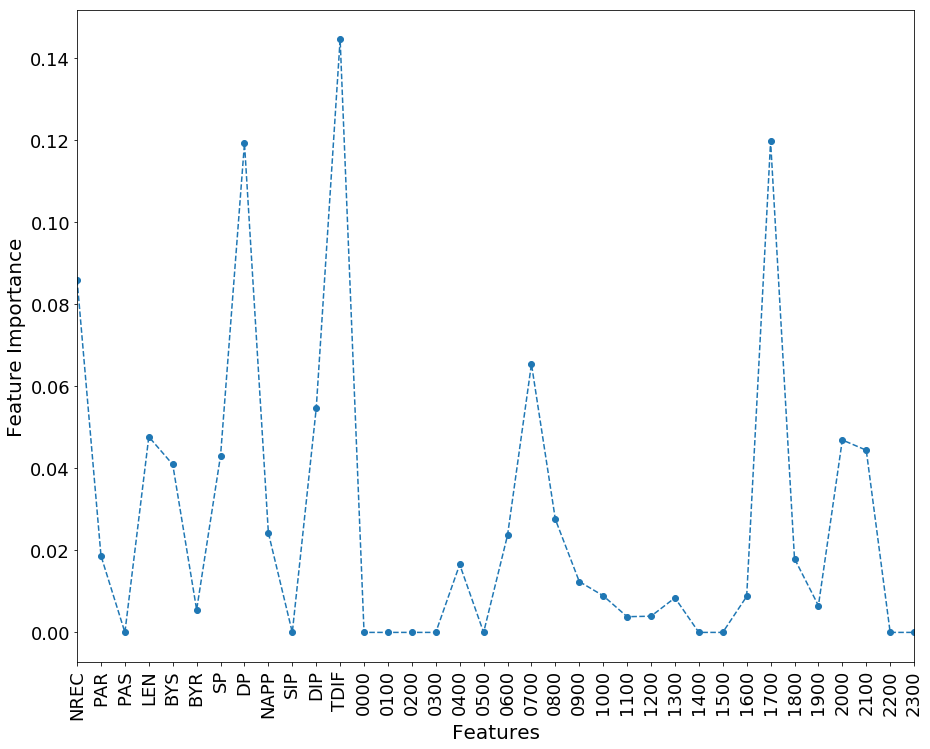

In [185]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [186]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                15   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           150             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.802748885587

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1039   305     1344
1           226  1122     1348
__all__    1265  1427     2692

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.78596187175

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          431  148      579
1           99  476      575
__all__    530  624     1154

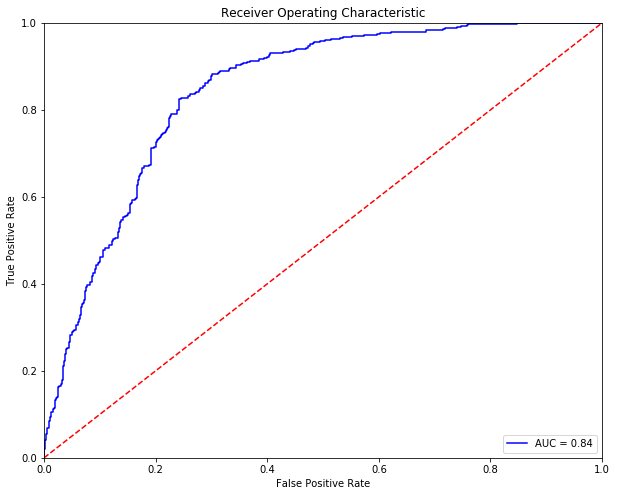

Optimal Threshold is 0.620535281607
Accuracy on test data is: 0.777296360485


Predicted  0.0  1.0  __all__
Actual                      
0.0        449  130      579
1.0        127  448      575
__all__    576  578     1154

In [187]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [188]:
table_70_50_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

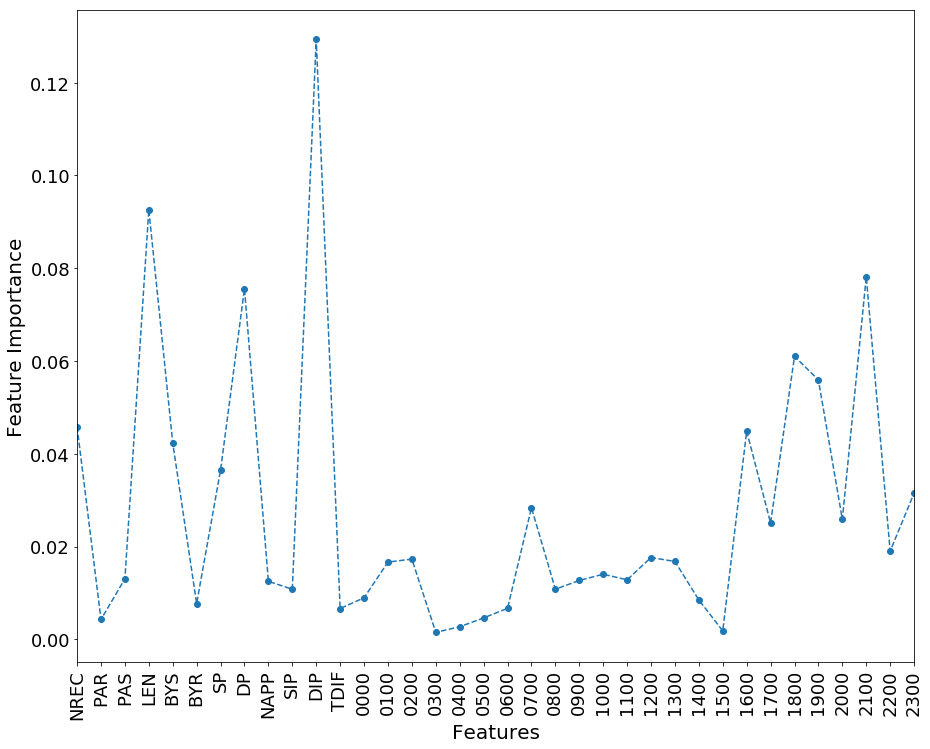

In [189]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [190]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.78603268945

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1035   309     1344
1           267  1081     1348
__all__    1302  1390     2692

Accuracy of the  Extra Decision Tree  model for test data is: 0.774696707106

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          430  149      579
1          111  464      575
__all__    541  613     1154

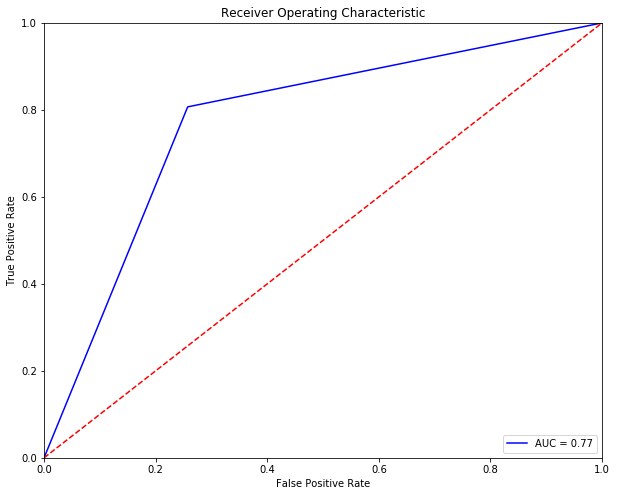

Optimal Threshold is 0.777697841727
Accuracy on test data is: 0.501733102253


Predicted   0.0  1.0  __all__
Actual                       
0.0         579    0      579
1.0         575    0      575
__all__    1154    0     1154

In [191]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [192]:
table_70_50_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [193]:
%%capture
table_70_50_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

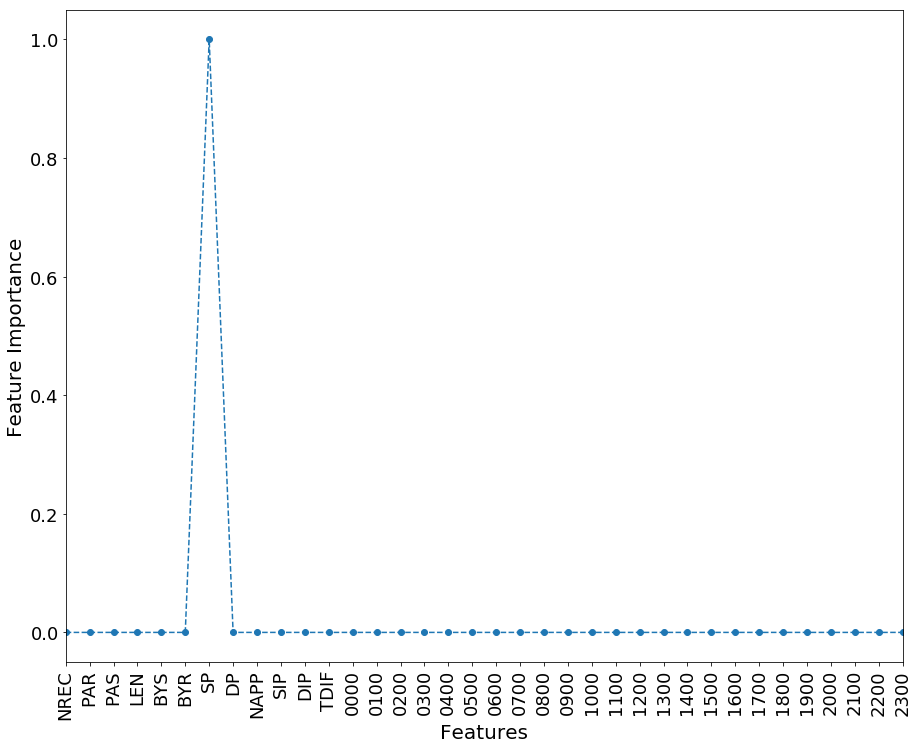

In [194]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [195]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.919019316493

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1209   135     1344
1            83  1265     1348
__all__    1292  1400     2692

Accuracy of the  Bagging  model for test data is: 0.785095320624

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          425  154      579
1           94  481      575
__all__    519  635     1154

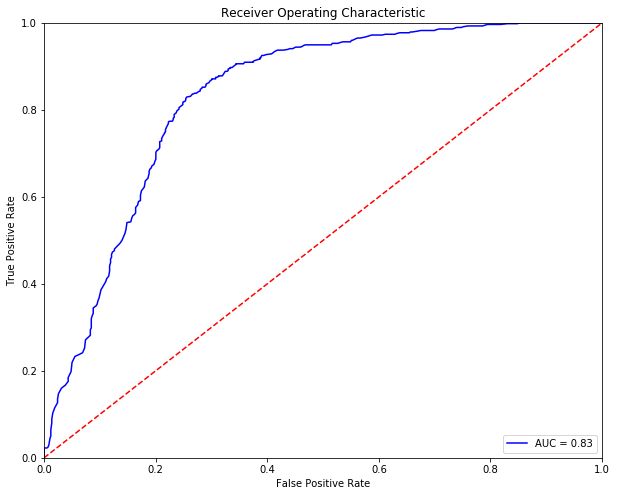

Optimal Threshold is 0.576666666667
Accuracy on test data is: 0.774696707106


Predicted  0.0  1.0  __all__
Actual                      
0.0        449  130      579
1.0        130  445      575
__all__    579  575     1154

In [196]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [197]:
table_70_50_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [198]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.895616641902


Predicted     0     1  __all__
Actual                        
0          1176   168     1344
1           113  1235     1348
__all__    1289  1403     2692

The test accuracy is: 0.779896013865


Predicted    0    1  __all__
Actual                      
0          426  153      579
1          101  474      575
__all__    527  627     1154

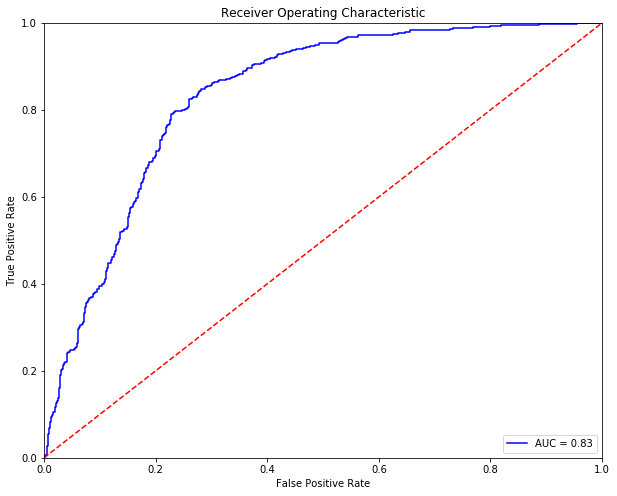

Optimal Threshold is 0.550379417397
Accuracy on test data is: 0.773830155979


Predicted  0.0  1.0  __all__
Actual                      
0.0        448  131      579
1.0        130  445      575
__all__    578  576     1154

In [199]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [200]:
table_70_50_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [201]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.950965824666


Predicted     0     1  __all__
Actual                        
0          1308    36     1344
1            96  1252     1348
__all__    1404  1288     2692

The accuracy of the model on test data is: 0.693240901213


Predicted    0    1  __all__
Actual                      
0          415  164      579
1          190  385      575
__all__    605  549     1154

  32/1154 [..............................] - ETA: 0s

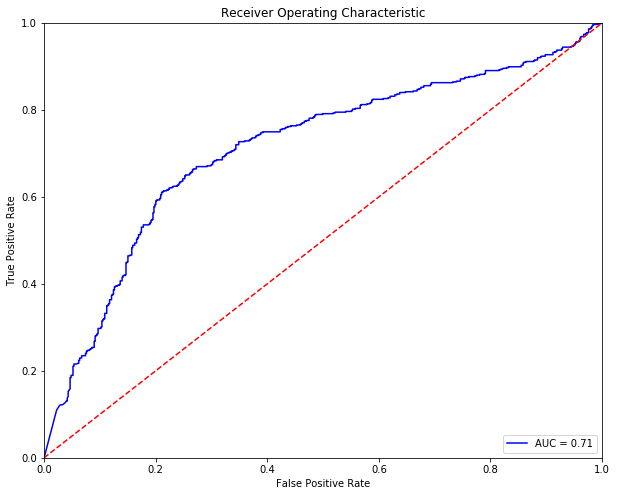

Optimal Threshold is 0.432843
Accuracy of Logistic Model on training data is: 0.683708838821


Predicted  0.0  1.0  __all__
Actual                      
0.0        395  184      579
1.0        181  394      575
__all__    576  578     1154

In [202]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [203]:
table_70_50_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [204]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.1min finished


The accuracy of the model on training data is: 0.806092124814


Predicted     0     1  __all__
Actual                        
0          1102   242     1344
1           280  1068     1348
__all__    1382  1310     2692

The accuracy of the model on test data is: 0.7712305026


Predicted    0    1  __all__
Actual                      
0          446  133      579
1          131  444      575
__all__    577  577     1154

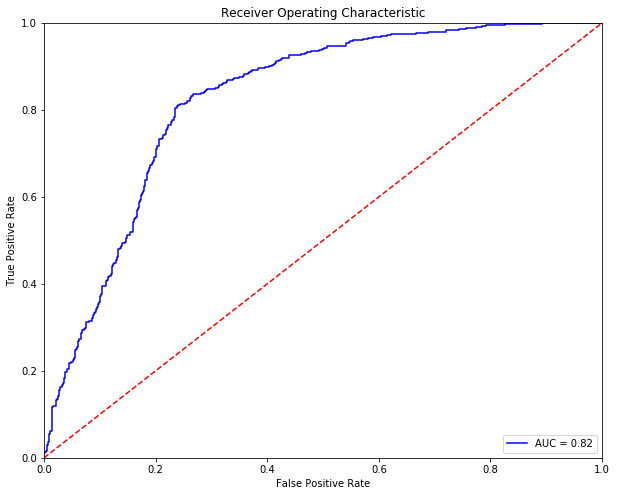

Optimal Threshold is 0.501541
Accuracy on test data is: 0.7712305026


Predicted  0.0  1.0  __all__
Actual                      
0.0        447  132      579
1.0        132  443      575
__all__    579  575     1154

In [205]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [206]:
table_70_50_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [207]:
table_70_50_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        0.790119  1063.0  1064.0  280.0  285.0  0.208333   
LogisticRegression          0.787147  1049.0  1070.0  274.0  299.0  0.203869   
RandomForestClassifier      0.791233  1082.0  1048.0  296.0  266.0  0.220238   
AdaBoostClassifier          0.803120  1131.0  1031.0  313.0  217.0  0.232887   
GradientBoostingClassifier  0.802749  1122.0  1039.0  305.0  226.0  0.226935   
ExtraTreeClassifier         0.786033  1081.0  1035.0  309.0  267.0  0.229911   
BaggingClassifier           0.919019  1265.0  1209.0  135.0   83.0  0.100446   
VotingClassifier            0.895617  1235.0  1176.0  168.0  113.0  0.125000   
Neural Network-1            0.950966  1252.0  1308.0   36.0   96.0  0.026786   
Neural-Network-2            0.806092  1068.0  1102.0  242.0  280.0  0.180060   

                                 FNR  
index                                 
KNeighborsClassifier        0.211424  
LogisticRegression          0.221810  
RandomForestClassifier      0.197329  
AdaBoostClassifier          0.160979  
GradientBoostingClassifier  0.167656  
ExtraTreeClassifier         0.198071  
BaggingClassifier           0.061573  
VotingClassifier            0.083828  
Neural Network-1            0.071217  
Neural-Network-2            0.207715

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.771231  450.0  440.0  139.0  125.0  0.240069   
LogisticRegression          0.767764  445.0  441.0  138.0  130.0  0.238342   
RandomForestClassifier      0.775563  462.0  433.0  146.0  113.0  0.252159   
AdaBoostClassifier          0.777296  478.0  419.0  160.0   97.0  0.276339   
GradientBoostingClassifier  0.785962  476.0  431.0  148.0   99.0  0.255613   
ExtraTreeClassifier         0.774697  464.0  430.0  149.0  111.0  0.257340   
BaggingClassifier           0.785095  481.0  425.0  154.0   94.0  0.265976   
VotingClassifier            0.779896  474.0  426.0  153.0  101.0  0.264249   
Neural Network-1            0.693241  385.0  415.0  164.0  190.0  0.283247   
Neural-Network-2            0.771231  444.0  446.0  133.0  131.0  0.229706   

                                 FNR  
index                                 
KNeighborsClassifier        0.217391  
LogisticRegression          0.226087  
RandomForestClassifier      0.196522  
AdaBoostClassifier          0.168696  
GradientBoostingClassifier  0.172174  
ExtraTreeClassifier         0.193043  
BaggingClassifier           0.163478  
VotingClassifier            0.175652  
Neural Network-1            0.330435  
Neural-Network-2            0.227826

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.762565  433.000000  447.000000  132.000000   
LogisticRegression          0.768631  441.000000  446.000000  133.000000   
RandomForestClassifier      0.767764  440.000000  446.000000  133.000000   
AdaBoostClassifier          0.759099  435.000000  441.000000  138.000000   
GradientBoostingClassifier  0.777296  448.000000  449.000000  130.000000   
ExtraTreeClassifier         0.501733  290.503466  288.496534  288.496534   
BaggingClassifier           0.774697  445.000000  449.000000  130.000000   
VotingClassifier            0.773830  445.000000  448.000000  131.000000   
Neural Network-1            0.683709  394.000000  395.000000  184.000000   
Neural-Network-2            0.771231  443.000000  447.000000  132.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        142.000000  0.227979  0.246957   0.540000   
LogisticRegression          134.000000  0.229706  0.233043   0.515338   
RandomForestClassifier      135.000000  0.229706  0.234783   0.656680   
AdaBoostClassifier          140.000000  0.238342  0.243478   0.511274   
GradientBoostingClassifier  127.000000  0.224525  0.220870   0.620535   
ExtraTreeClassifier         286.503466  0.501733  0.498267   0.777698   
BaggingClassifier           130.000000  0.224525  0.226087   0.576667   
VotingClassifier            130.000000  0.226252  0.226087   0.550379   
Neural Network-1            181.000000  0.317789  0.314783   0.432843   
Neural-Network-2            132.000000  0.227979  0.229565   0.501541   

                                 auc  
index                                 
KNeighborsClassifier        0.832617  
LogisticRegression          0.827880  
RandomForestClassifier      0.826027  
AdaBoostClassifier          0.830989  
GradientBoostingClassifier  0.842863  
ExtraTreeClassifier         0.774808  
BaggingClassifier           0.831040  
VotingClassifier            0.833173  
Neural Network-1            0.711920  
Neural-Network-2            0.824885

#### Random State 20

In [208]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  3475  119.307626   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   558   31.100358   

                                                          PAS         LEN  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  60.322302   94.924029   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  18.324373  120.193548   

                                                            BYS  \
Source_User                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  6983.720863   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  2986.801075   

                                                              BYR      SP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  151221.195108  3079.0   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   31418.557348   555.0   

                                                       DP  NAPP  SIP  DIP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  106.0    54   74  911   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    5.0    25   53  227   

                                                           TDIF  0000  0100  \
Source_User                                                                   
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1409.110216   419   383   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  8542.105735    13    44   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   267   141    95    48   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     2     6     5     3   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    31    11    30    33   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     4     1     0     8   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    39    68   187    89   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    25    35    44    67   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    79   110    56   187   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    94    27    18    19   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   161   174   303   126   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    30    32    40    32   

                                                    2200  2300  
Source_User                                                     
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   303   135  
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     6     3

In [209]:
### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
afbe75a93f02da27be2a836bef717ffeef19714de5a1f2121d5a93fe043e70f1    1
28f9fffb669c004731f11c34913ce913981fd3534ea37ce2bb0e9b942091ff57    0
c966f4446da082203a9bfc84af2a2db29baa017722ac03471cf412932a6c0e90    1
b938ef4078ace510c6696a63e7ee215b9443b59f0d5c7a5f3d79bc1a672c0ca8    1
c1d72e5d7b7f24020163240ecbb1e648745a058b5f18c44f1cf8ceea6be1dc8b    1
8b76ca850d1587f46c2740a3dc662f9730d183fc173a25c6c7fcae215adde149    1
1b93b31e3d3282a98216531e95ddd1400a7728383f6f348ce19b05d873a6122a    1
f0629dde75324f00bdd60ba5ff96dd8f198c45117c089691e44c6c0e871d5947    1
bb235609630753fadf401ecbf9b9c323c35273de648930ce0b76cbd128c882fe    0
Name: Target, dtype: int64

In [210]:
### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [211]:
## Table to store training and test measures
table_70_50_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1350     0     1350
1             0  1342     1342
__all__    1350  1342     2692

Accuracy of the  KNN  model for test data is: 0.779029462738

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          425  148      573
1          107  474      581
__all__    532  622     1154

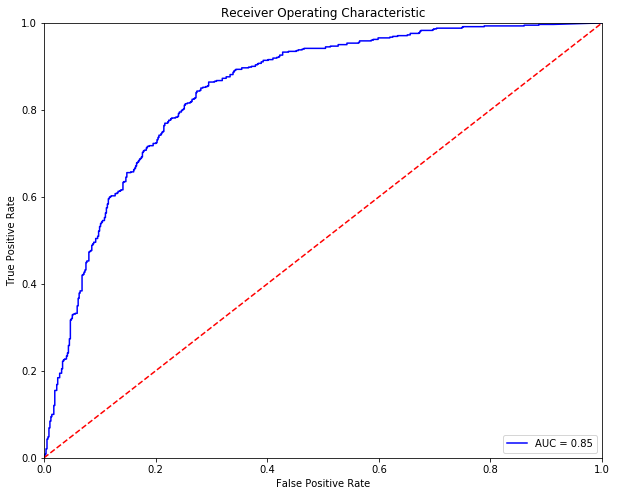

Optimal Threshold is 0.537602042678
Accuracy on test data is: 0.775563258232


Predicted  0.0  1.0  __all__
Actual                      
0.0        445  128      573
1.0        131  450      581
__all__    576  578     1154

In [213]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [214]:
table_70_50_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [215]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.770802377415

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1032   318     1350
1           299  1043     1342
__all__    1331  1361     2692

Accuracy of the  Logistic  model for test data is: 0.76863084922

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          432  141      573
1          126  455      581
__all__    558  596     1154

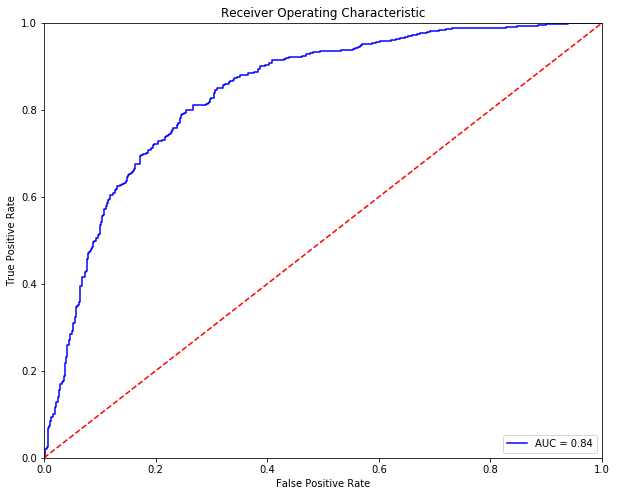

Optimal Threshold is 0.516943762611
Accuracy on test data is: 0.762564991334


Predicted  0.0  1.0  __all__
Actual                      
0.0        437  136      573
1.0        138  443      581
__all__    575  579     1154

In [216]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [217]:
table_70_50_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [218]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.77897473997

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           990   360     1350
1           235  1107     1342
__all__    1225  1467     2692

Accuracy of the  Random Forest Trees  model for test data is: 0.777296360485

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          414  159      573
1           98  483      581
__all__    512  642     1154

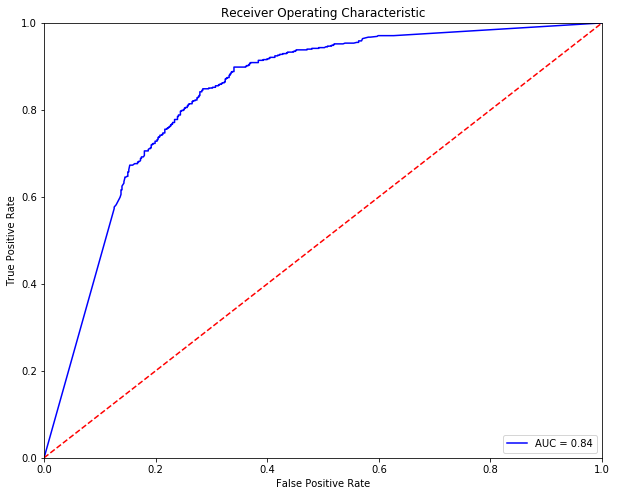

Optimal Threshold is 0.67722191301
Accuracy on test data is: 0.769497400347


Predicted  0.0  1.0  __all__
Actual                      
0.0        441  132      573
1.0        134  447      581
__all__    575  579     1154

In [219]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [220]:
table_70_50_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

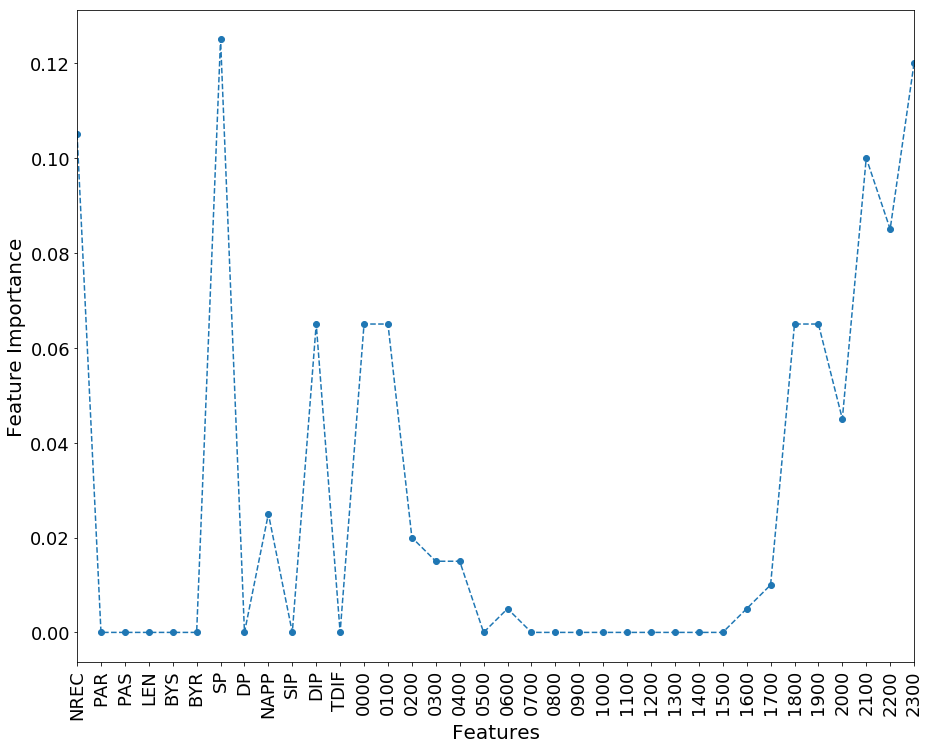

In [221]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [222]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.781203566122

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           978   372     1350
1           217  1125     1342
__all__    1195  1497     2692

Accuracy of the  AdaBoostClassifier  model for test data is: 0.772097053726

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          408  165      573
1           98  483      581
__all__    506  648     1154

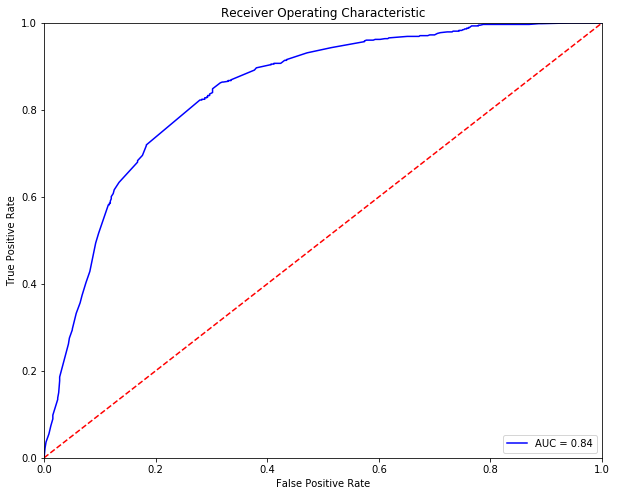

Optimal Threshold is 0.515086660135
Accuracy on test data is: 0.766897746967


Predicted  0.0  1.0  __all__
Actual                      
0.0        468  105      573
1.0        164  417      581
__all__    632  522     1154

In [223]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [224]:
table_70_50_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

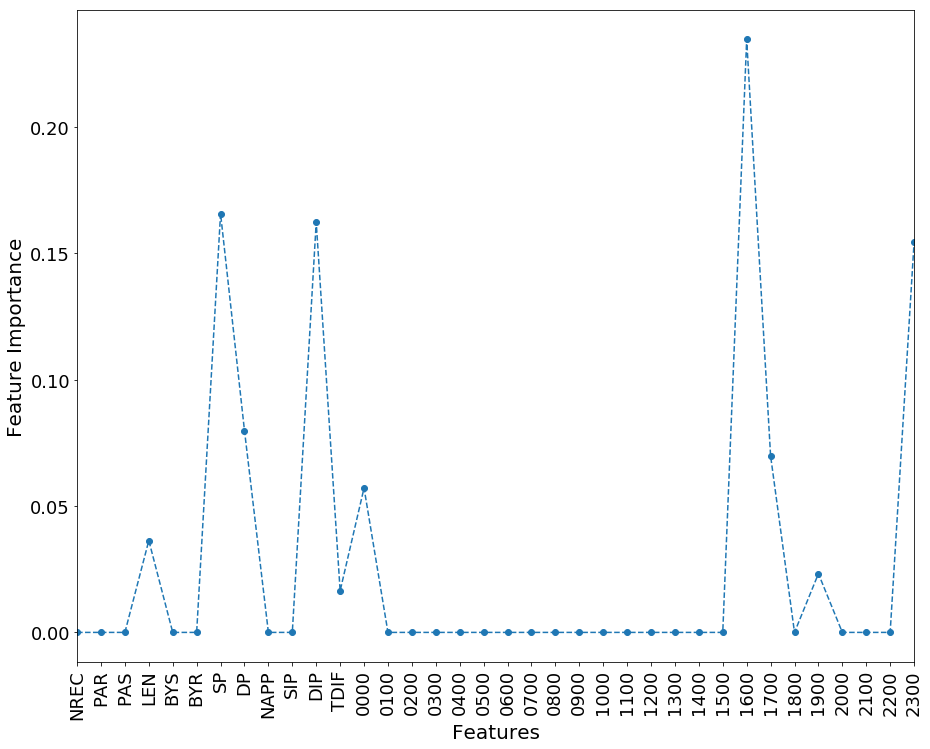

In [225]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [226]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.794205052006

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1002   348     1350
1           206  1136     1342
__all__    1208  1484     2692

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.784228769497

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          414  159      573
1           90  491      581
__all__    504  650     1154

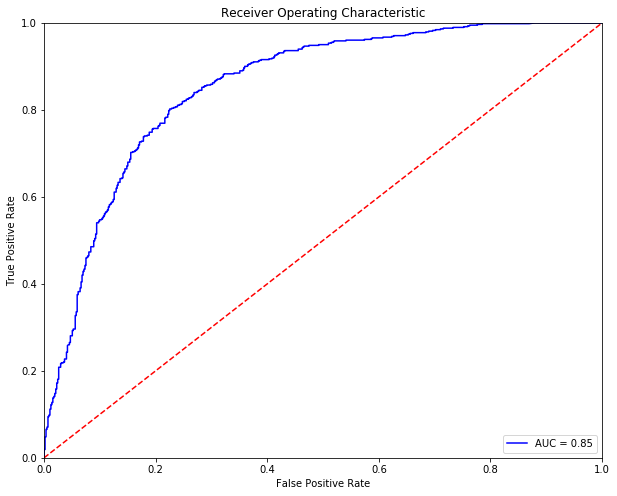

Optimal Threshold is 0.588622720934
Accuracy on test data is: 0.782495667244


Predicted  0.0  1.0  __all__
Actual                      
0.0        449  124      573
1.0        127  454      581
__all__    576  578     1154

In [227]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [228]:
table_70_50_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

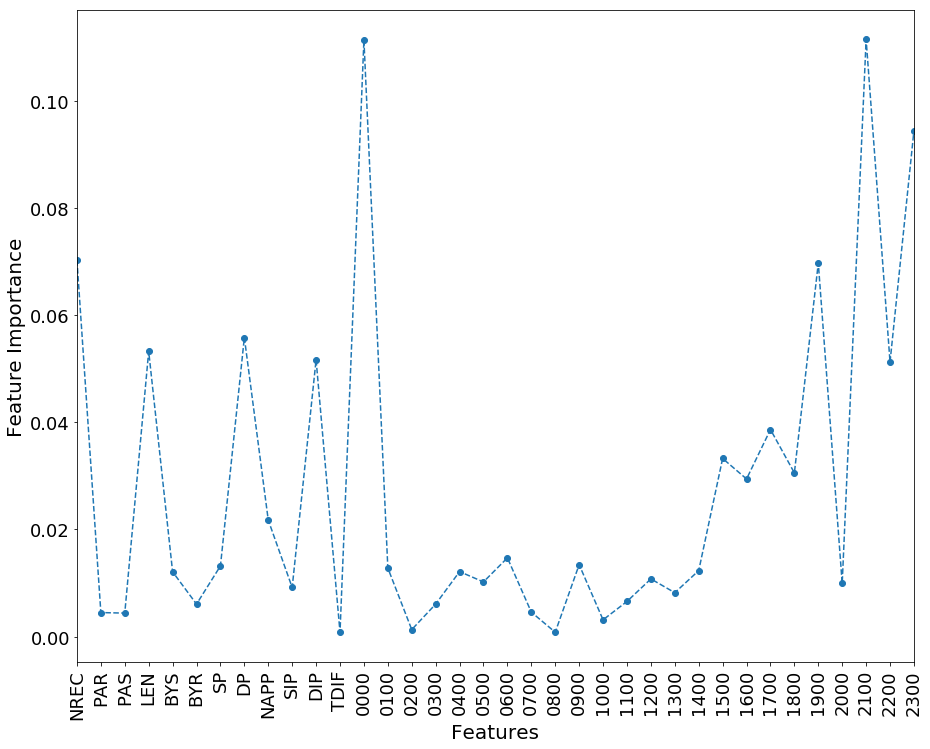

In [229]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [230]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.768573551263

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           904   446     1350
1           177  1165     1342
__all__    1081  1611     2692

Accuracy of the  Extra Decision Tree  model for test data is: 0.765164644714

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          379  194      573
1           77  504      581
__all__    456  698     1154

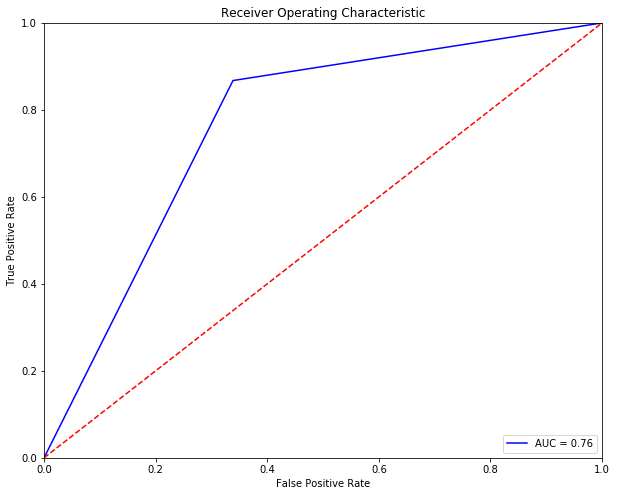

Optimal Threshold is 0.723153320919
Accuracy on test data is: 0.496533795494


Predicted   0.0  1.0  __all__
Actual                       
0.0         573    0      573
1.0         581    0      581
__all__    1154    0     1154

In [231]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [232]:
table_70_50_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [233]:
%%capture
table_70_50_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

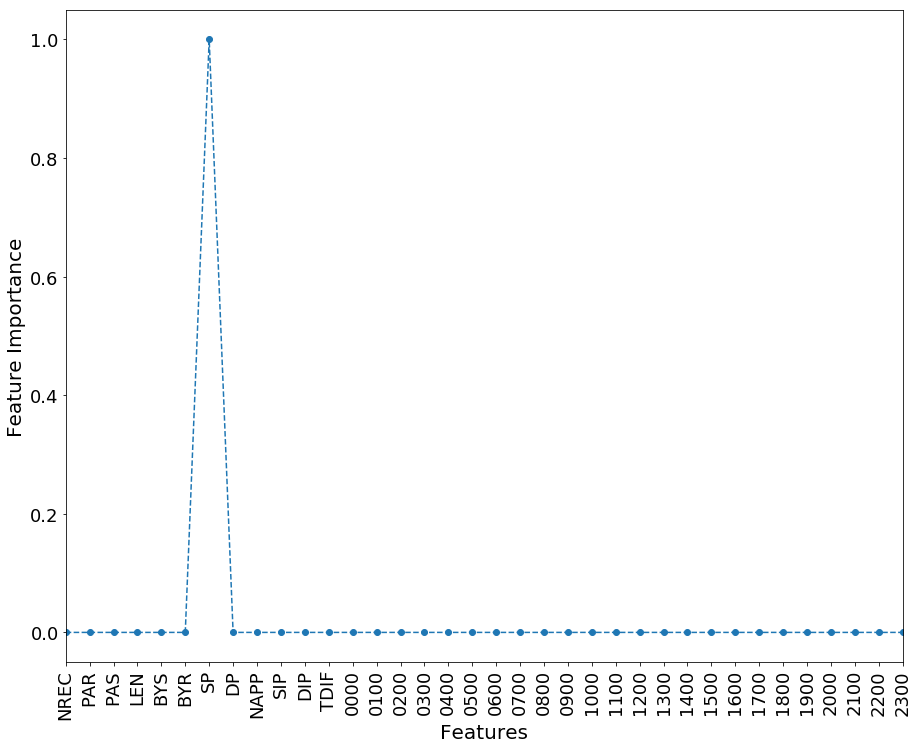

In [234]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),columns,rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [235]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.8926448737

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1159   191     1350
1            98  1244     1342
__all__    1257  1435     2692

Accuracy of the  Bagging  model for test data is: 0.780762564991

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          413  160      573
1           93  488      581
__all__    506  648     1154

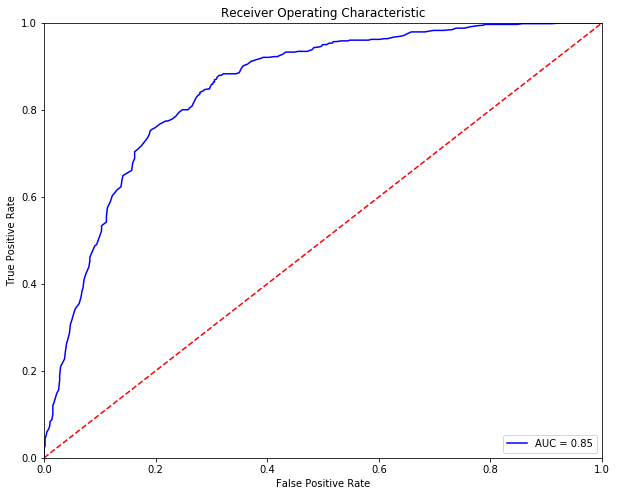

Optimal Threshold is 0.58
Accuracy on test data is: 0.776429809359


Predicted  0.0  1.0  __all__
Actual                      
0.0        446  127      573
1.0        131  450      581
__all__    577  577     1154

In [236]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [237]:
table_70_50_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [238]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.908246656761


Predicted     0     1  __all__
Actual                        
0          1202   148     1350
1            99  1243     1342
__all__    1301  1391     2692

The test accuracy is: 0.772963604853


Predicted    0    1  __all__
Actual                      
0          420  153      573
1          109  472      581
__all__    529  625     1154

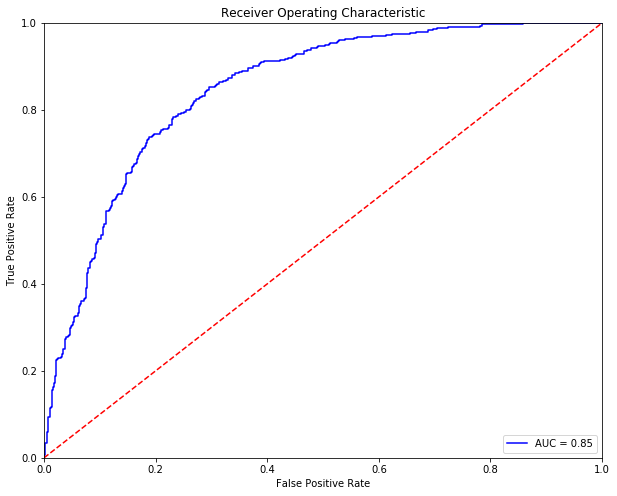

Optimal Threshold is 0.541817021123
Accuracy on test data is: 0.773830155979


Predicted  0.0  1.0  __all__
Actual                      
0.0        442  131      573
1.0        130  451      581
__all__    572  582     1154

In [239]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [240]:
table_70_50_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [241]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.908246656761


Predicted     0     1  __all__
Actual                        
0          1275    75     1350
1           172  1170     1342
__all__    1447  1245     2692

The accuracy of the model on test data is: 0.729636048527


Predicted    0    1  __all__
Actual                      
0          430  143      573
1          169  412      581
__all__    599  555     1154

1024/1154 [=========================>....] - ETA: 0s

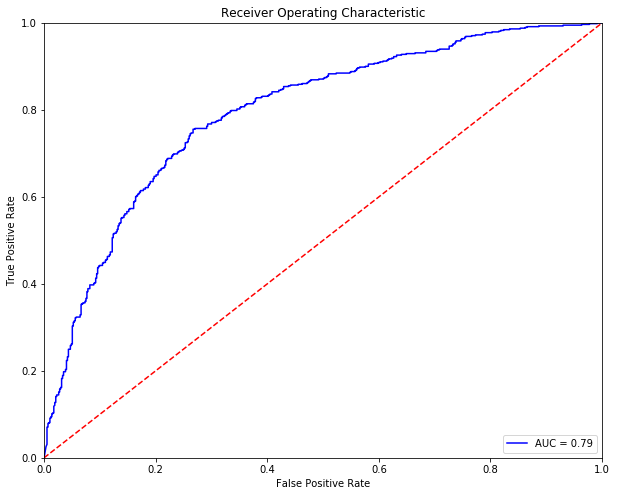

Optimal Threshold is 0.463642
Accuracy of Logistic Model on training data is: 0.739168110919


Predicted  0.0  1.0  __all__
Actual                      
0.0        424  149      573
1.0        152  429      581
__all__    576  578     1154

In [242]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [243]:
table_70_50_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [244]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.4min finished


The accuracy of the model on training data is: 0.791604754829


Predicted     0     1  __all__
Actual                        
0           999   351     1350
1           210  1132     1342
__all__    1209  1483     2692

The accuracy of the model on test data is: 0.778162911612


Predicted    0    1  __all__
Actual                      
0          412  161      573
1           95  486      581
__all__    507  647     1154

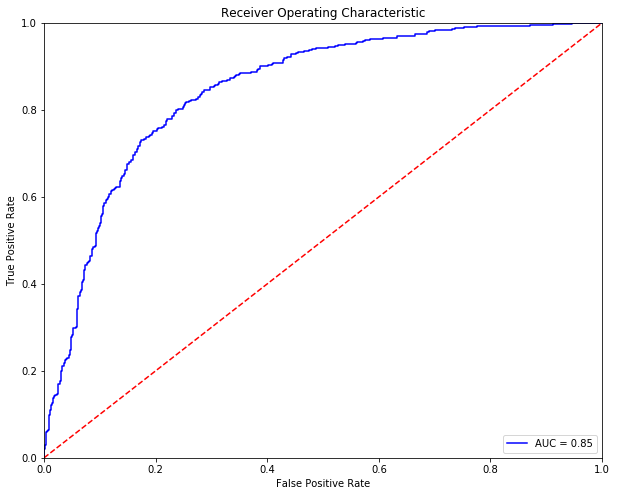

Optimal Threshold is 0.592479
Accuracy on test data is: 0.779029462738


Predicted  0.0  1.0  __all__
Actual                      
0.0        447  126      573
1.0        129  452      581
__all__    576  578     1154

In [245]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [246]:
table_70_50_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [247]:
table_70_50_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1342.0  1350.0    0.0    0.0  0.000000   
LogisticRegression          0.770802  1043.0  1032.0  318.0  299.0  0.235556   
RandomForestClassifier      0.778975  1107.0   990.0  360.0  235.0  0.266667   
AdaBoostClassifier          0.781204  1125.0   978.0  372.0  217.0  0.275556   
GradientBoostingClassifier  0.794205  1136.0  1002.0  348.0  206.0  0.257778   
ExtraTreeClassifier         0.768574  1165.0   904.0  446.0  177.0  0.330370   
BaggingClassifier           0.892645  1244.0  1159.0  191.0   98.0  0.141481   
VotingClassifier            0.908247  1243.0  1202.0  148.0   99.0  0.109630   
Neural Network-1            0.908247  1170.0  1275.0   75.0  172.0  0.055556   
Neural-Network-2            0.791605  1132.0   999.0  351.0  210.0  0.260000   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.222802  
RandomForestClassifier      0.175112  
AdaBoostClassifier          0.161699  
GradientBoostingClassifier  0.153502  
ExtraTreeClassifier         0.131893  
BaggingClassifier           0.073025  
VotingClassifier            0.073770  
Neural Network-1            0.128167  
Neural-Network-2            0.156483

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.779029  474.0  425.0  148.0  107.0  0.258290   
LogisticRegression          0.768631  455.0  432.0  141.0  126.0  0.246073   
RandomForestClassifier      0.777296  483.0  414.0  159.0   98.0  0.277487   
AdaBoostClassifier          0.772097  483.0  408.0  165.0   98.0  0.287958   
GradientBoostingClassifier  0.784229  491.0  414.0  159.0   90.0  0.277487   
ExtraTreeClassifier         0.765165  504.0  379.0  194.0   77.0  0.338569   
BaggingClassifier           0.780763  488.0  413.0  160.0   93.0  0.279232   
VotingClassifier            0.772964  472.0  420.0  153.0  109.0  0.267016   
Neural Network-1            0.729636  412.0  430.0  143.0  169.0  0.249564   
Neural-Network-2            0.778163  486.0  412.0  161.0   95.0  0.280977   

                                 FNR  
index                                 
KNeighborsClassifier        0.184165  
LogisticRegression          0.216867  
RandomForestClassifier      0.168675  
AdaBoostClassifier          0.168675  
GradientBoostingClassifier  0.154905  
ExtraTreeClassifier         0.132530  
BaggingClassifier           0.160069  
VotingClassifier            0.187608  
Neural Network-1            0.290878  
Neural-Network-2            0.163511

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.775563  450.000000  445.000000  128.000000   
LogisticRegression          0.762565  443.000000  437.000000  136.000000   
RandomForestClassifier      0.769497  447.000000  441.000000  132.000000   
AdaBoostClassifier          0.766898  417.000000  468.000000  105.000000   
GradientBoostingClassifier  0.782496  454.000000  449.000000  124.000000   
ExtraTreeClassifier         0.496534  284.513865  288.486135  288.486135   
BaggingClassifier           0.776430  450.000000  446.000000  127.000000   
VotingClassifier            0.773830  451.000000  442.000000  131.000000   
Neural Network-1            0.739168  429.000000  424.000000  149.000000   
Neural-Network-2            0.779029  452.000000  447.000000  126.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        131.000000  0.223386  0.225473   0.537602   
LogisticRegression          138.000000  0.237347  0.237522   0.516944   
RandomForestClassifier      134.000000  0.230366  0.230637   0.677222   
AdaBoostClassifier          164.000000  0.183246  0.282272   0.515087   
GradientBoostingClassifier  127.000000  0.216405  0.218589   0.588623   
ExtraTreeClassifier         292.513865  0.496534  0.503466   0.723153   
BaggingClassifier           131.000000  0.221640  0.225473   0.580000   
VotingClassifier            130.000000  0.228621  0.223752   0.541817   
Neural Network-1            152.000000  0.260035  0.261618   0.463642   
Neural-Network-2            129.000000  0.219895  0.222031   0.592479   

                                 auc  
index                                 
KNeighborsClassifier        0.847167  
LogisticRegression          0.839087  
RandomForestClassifier      0.836881  
AdaBoostClassifier          0.842115  
GradientBoostingClassifier  0.853453  
ExtraTreeClassifier         0.764450  
BaggingClassifier           0.849716  
VotingClassifier            0.847236  
Neural Network-1            0.794550  
Neural-Network-2            0.846897

In [248]:
table_70_50_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [249]:
table_70_50_train_avg['accuracy']=(table_70_50_train['accuracy']+table_70_50_10_train['accuracy']+table_70_50_20_train['accuracy'])/3.0
table_70_50_train_avg['FPR']=(table_70_50_train['FPR']+table_70_50_10_train['FPR']+table_70_50_20_train['FPR'])/3.0
table_70_50_train_avg['FNR']=(table_70_50_train['FNR']+table_70_50_10_train['FNR']+table_70_50_20_train['FNR'])/3.0

In [250]:
table_70_50_test_avg['accuracy']=(table_70_50_test['accuracy']+table_70_50_10_test['accuracy']+table_70_50_20_test['accuracy'])/3.0
table_70_50_test_avg['FPR']=(table_70_50_test['FPR']+table_70_50_10_test['FPR']+table_70_50_20_test['FPR'])/3.0
table_70_50_test_avg['FNR']=(table_70_50_test['FNR']+table_70_50_10_test['FNR']+table_70_50_20_test['FNR'])/3.0

In [251]:
table_70_50_test_roc_avg['accuracy']=(table_70_50_test_roc['accuracy']+table_70_50_10_test_roc['accuracy']+table_70_50_20_test_roc['accuracy'])/3.0
table_70_50_test_roc_avg['FPR']=(table_70_50_test_roc['FPR']+table_70_50_10_test_roc['FPR']+table_70_50_20_test_roc['FPR'])/3.0
table_70_50_test_roc_avg['FNR']=(table_70_50_test_roc['FNR']+table_70_50_10_test_roc['FNR']+table_70_50_20_test_roc['FNR'])/3.0
table_70_50_test_roc_avg['auc']=(table_70_50_test_roc['auc']+table_70_50_10_test_roc['auc']+table_70_50_20_test_roc['auc'])/3.0

In [252]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.852402  0.151290  0.143917
LogisticRegression          0.773155  0.228320  0.225355
RandomForestClassifier      0.780213  0.257044  0.182505
AdaBoostClassifier          0.794700  0.251574  0.158994
GradientBoostingClassifier  0.796310  0.248128  0.159229
ExtraTreeClassifier         0.773526  0.289191  0.163648
BaggingClassifier           0.914809  0.108916  0.061434
VotingClassifier            0.906142  0.111196  0.076519
Neural Network-1            0.934497  0.039352  0.091684
Neural-Network-2            0.795567  0.225308  0.183467

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.781340  0.238083  0.199359
LogisticRegression          0.770075  0.236889  0.223014
RandomForestClassifier      0.781340  0.261177  0.176225
AdaBoostClassifier          0.778163  0.271576  0.172167
GradientBoostingClassifier  0.791161  0.258874  0.158881
ExtraTreeClassifier         0.775274  0.291325  0.158380
BaggingClassifier           0.788273  0.267516  0.155965
VotingClassifier            0.779896  0.258263  0.181956
Neural Network-1            0.722704  0.258778  0.295800
Neural-Network-2            0.774697  0.251402  0.199431

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.776430  0.218964  0.228201  0.846212
LogisticRegression          0.768920  0.231102  0.231058  0.837267
RandomForestClassifier      0.777296  0.221291  0.224125  0.837020
AdaBoostClassifier          0.767764  0.214220  0.250033  0.836146
GradientBoostingClassifier  0.783940  0.215486  0.216631  0.851124
ExtraTreeClassifier         0.500000  0.500000  0.500000  0.775148
BaggingClassifier           0.780474  0.217231  0.221824  0.846939
VotingClassifier            0.778452  0.221861  0.221251  0.843176
Neural Network-1            0.722704  0.277237  0.277351  0.759116
Neural-Network-2            0.772097  0.227012  0.228793  0.834126

###  <a id='1.C' style="text-decoration : none; color : #000000;">80:20 Train Test Split with PCA</a>
#### Random State 0

In [253]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC        PAR       PAS  \
Source_User                                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   342  10.783626  9.897661   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...    42   9.476190  9.595238   

                                                           LEN          BYS  \
Source_User                                                                   
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   83.982456  2232.368421   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  119.285714  1357.809524   

                                                            BYR     SP    DP  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  7639.970760  337.0  14.0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  5211.809524   42.0   3.0   

                                                    NAPP  SIP  DIP  \
Source_User                                                          
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    22   30  123   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     7    3   20   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  13642.195906    12     5   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...   2319.000000     0     0   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     0     0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     3     6   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    16     5     4    14   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     8     1   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     9    25    46    27   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     9    24     0     0   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    98    16    38    12   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    2200  2300  
Source_User                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     6     0  
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0

1 -> Infected
0 -> Uninfected


Source_User
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60f2b14eb15d59dd611    1
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35cc79ee014e30c7f27    0
73e7f427173ebaafa2447cafcfa05e11aac3dfda1d0a63d542395a7c9f3e41dd    0
e931f318e6d489b8c1fefcdbcc9f1678c3f5fc95b51fa9675b0130c2003885ef    1
bae671359bbc14c02f9f8ebc82ce508a719fc67b20861aeac0eae50765512ad3    1
97435f766a7f2b4ddea9ef289247eb80b7949d19813e662b41df10ee82d45dff    1
e83f41f7465c7b228abaffb01c879bfa306d44170328d408d6da9a1e0bfb9d30    1
d0e61d1a66521a1545404096ea9271bb53d3e19eefa1331754ca58c1cfbaff31    1
aaca5cdcccf23e9d5f1debe1ec0528fc5550ffe99f2f4a55a71e89ee95af52c9    1
5c5d234bdd7acfc32b04705b11fd0a5f4557d8d386e1a39a22cf728208b003e9    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.900113362114
The train/test split ratio is 80:20


In [254]:
display(X_pca_13[0:1])

array([[-0.76694109, -0.39711349,  0.00850192,  0.29548513,  0.03706159,
         0.0462458 ,  0.05353114,  0.51253101,  0.07514238,  0.27391225,
         0.31843066,  0.12760367,  0.12940005]])

In [255]:
## Table to store training and test measures
table_80_50_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [256]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1523     0     1523
1             0  1553     1553
__all__    1523  1553     3076

Accuracy of the  KNN  model for test data is: 0.781818181818

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          315   85      400
1           83  287      370
__all__    398  372      770

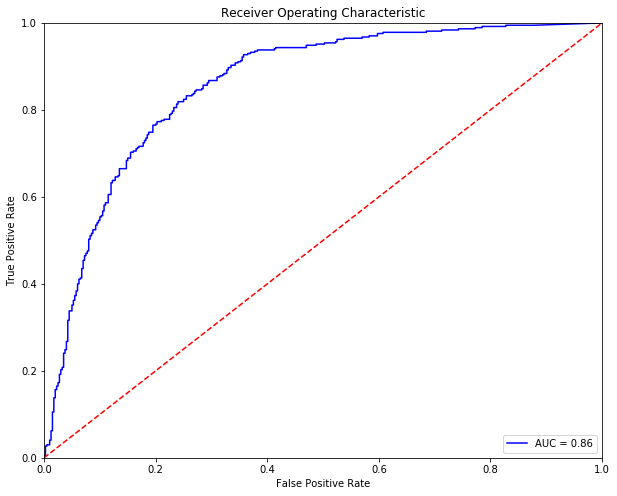

Optimal Threshold is 0.494087435335
Accuracy on test data is: 0.777922077922


Predicted  0.0  1.0  __all__
Actual                      
0.0        311   89      400
1.0         82  288      370
__all__    393  377      770

In [257]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [258]:
table_80_50_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [259]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.755526657997

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1133   390     1523
1           362  1191     1553
__all__    1495  1581     3076

Accuracy of the  Logistic  model for test data is: 0.794805194805

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          309   91      400
1           67  303      370
__all__    376  394      770

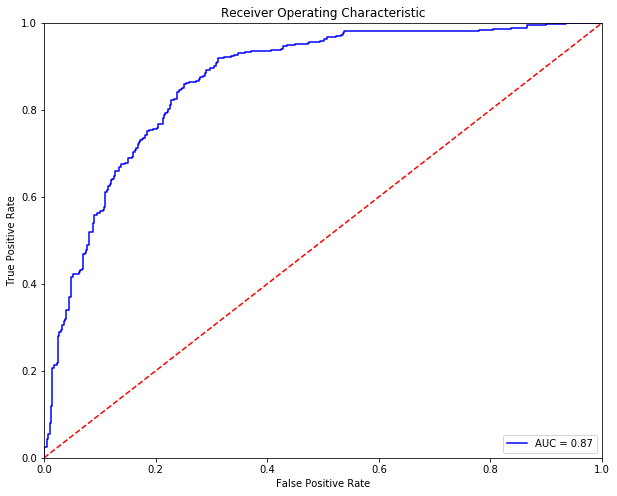

Optimal Threshold is 0.520671429391
Accuracy on test data is: 0.784415584416


Predicted  0.0  1.0  __all__
Actual                      
0.0        315   85      400
1.0         81  289      370
__all__    396  374      770

In [260]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [261]:
table_80_50_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [262]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.763654096229

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1045   478     1523
1           249  1304     1553
__all__    1294  1782     3076

Accuracy of the  Random Forest Trees  model for test data is: 0.793506493506

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          284  116      400
1           43  327      370
__all__    327  443      770

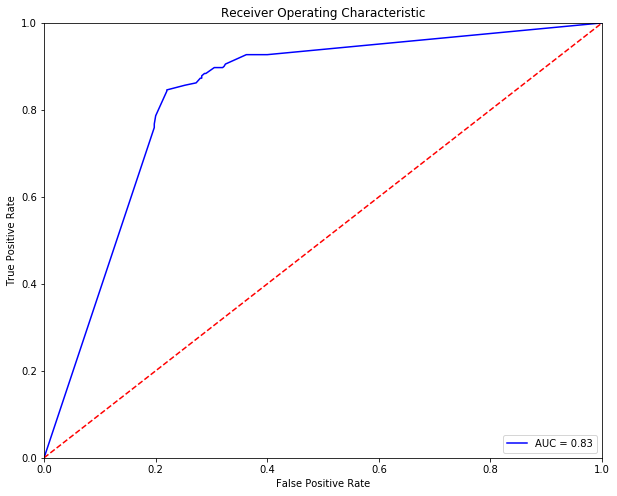

Optimal Threshold is 0.548665047443
Accuracy on test data is: 0.785714285714


Predicted  0.0  1.0  __all__
Actual                      
0.0        321   79      400
1.0         86  284      370
__all__    407  363      770

In [263]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [264]:
table_80_50_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

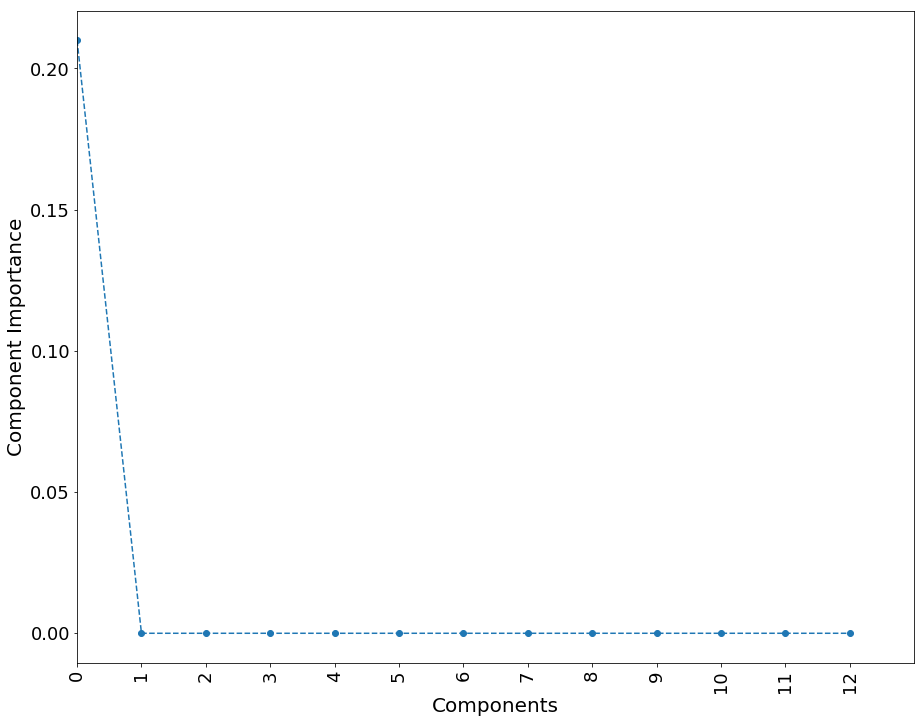

In [265]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [266]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.777958387516

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1097   426     1523
1           257  1296     1553
__all__    1354  1722     3076

Accuracy of the  AdaBoostClassifier  model for test data is: 0.796103896104

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          291  109      400
1           48  322      370
__all__    339  431      770

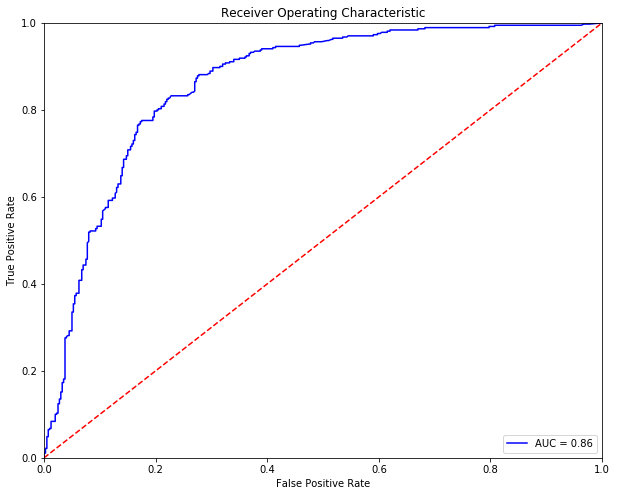

Optimal Threshold is 0.503368073591
Accuracy on test data is: 0.798701298701


Predicted  0.0  1.0  __all__
Actual                      
0.0        320   80      400
1.0         75  295      370
__all__    395  375      770

In [267]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [268]:
table_80_50_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

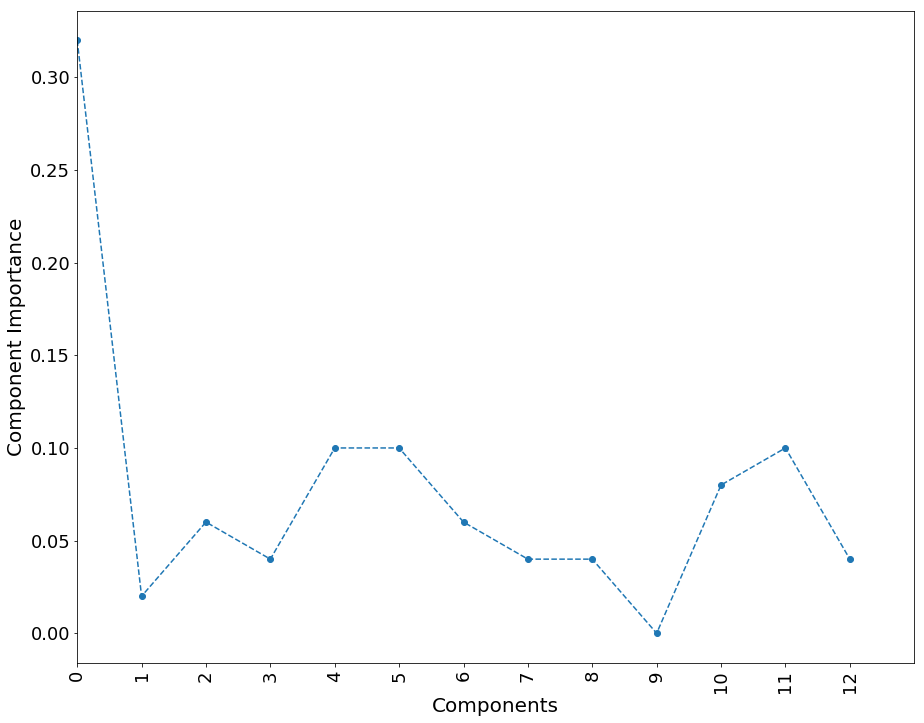

In [269]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [270]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.794213263979

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1150   373     1523
1           260  1293     1553
__all__    1410  1666     3076

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.802597402597

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          302   98      400
1           54  316      370
__all__    356  414      770

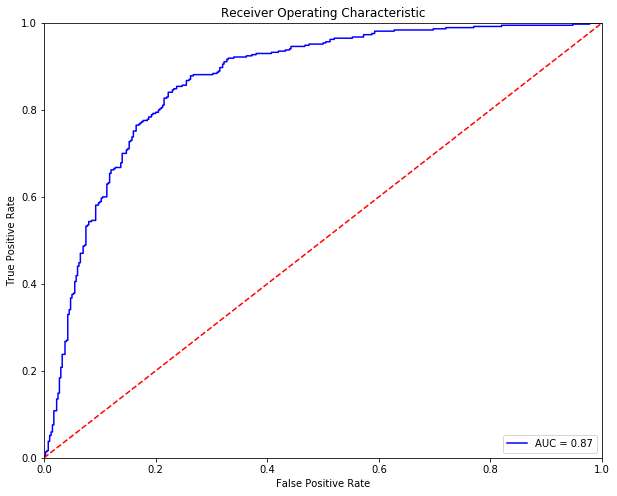

Optimal Threshold is 0.583311333856
Accuracy on test data is: 0.796103896104


Predicted  0.0  1.0  __all__
Actual                      
0.0        319   81      400
1.0         76  294      370
__all__    395  375      770

In [271]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [272]:
table_80_50_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

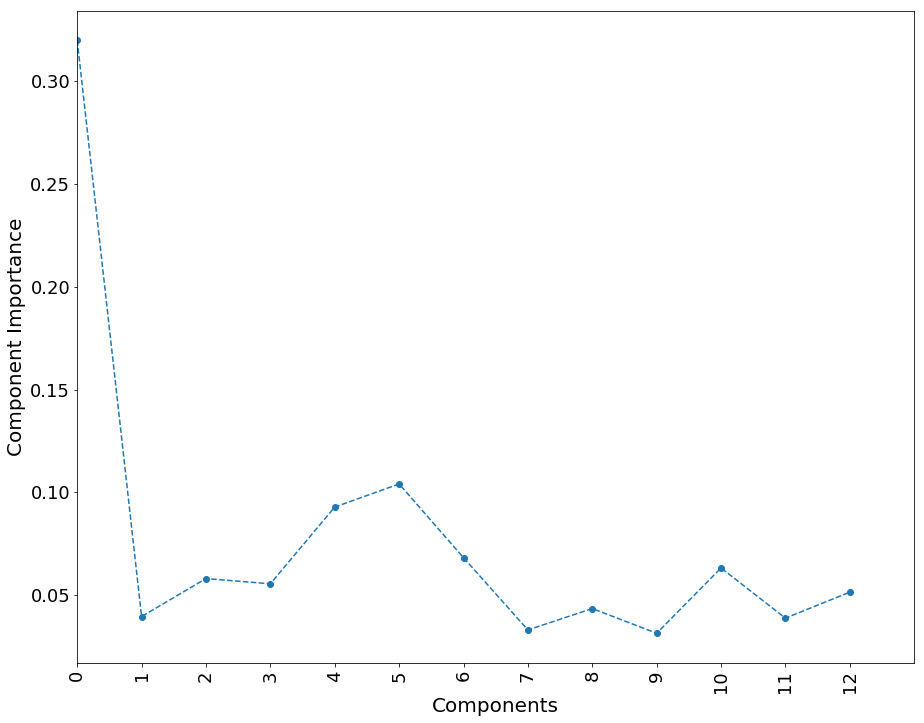

In [273]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [274]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  5             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.783159947984

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1116   407     1523
1           260  1293     1553
__all__    1376  1700     3076

Accuracy of the  Extra Decision Tree  model for test data is: 0.754545454545

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          280  120      400
1           69  301      370
__all__    349  421      770

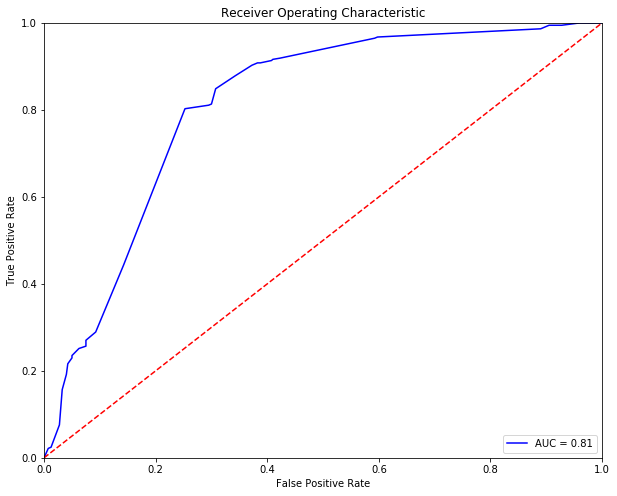

Optimal Threshold is 0.708724832215
Accuracy on test data is: 0.658441558442


Predicted  0.0  1.0  __all__
Actual                      
0.0        343   57      400
1.0        206  164      370
__all__    549  221      770

In [275]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [276]:
table_80_50_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [277]:
%%capture
table_80_50_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

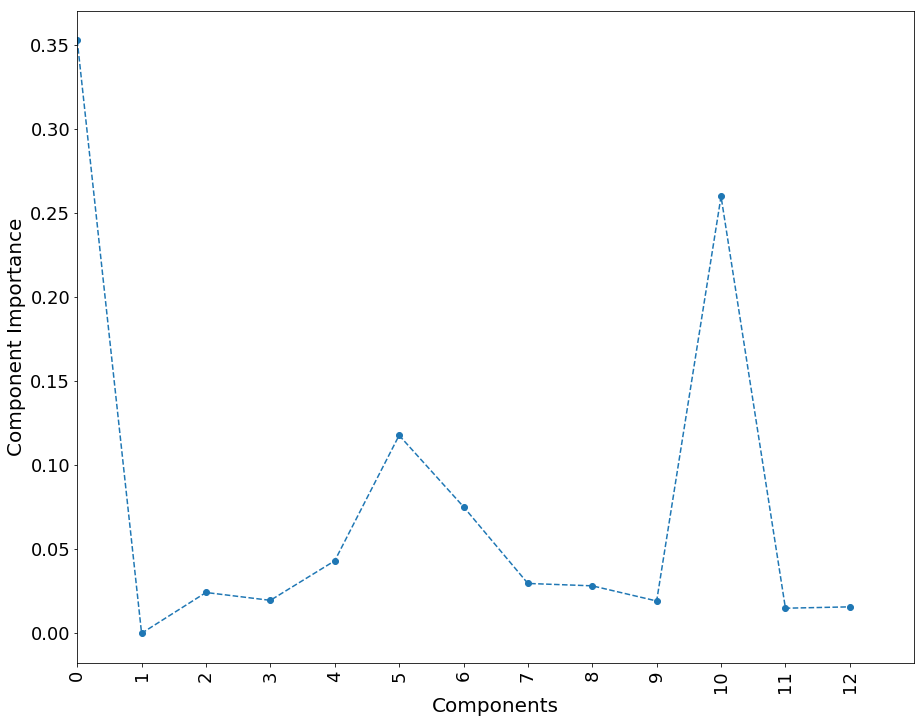

In [278]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [279]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.952535760728

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1436    87     1523
1            59  1494     1553
__all__    1495  1581     3076

Accuracy of the  Bagging  model for test data is: 0.794805194805

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          284  116      400
1           42  328      370
__all__    326  444      770

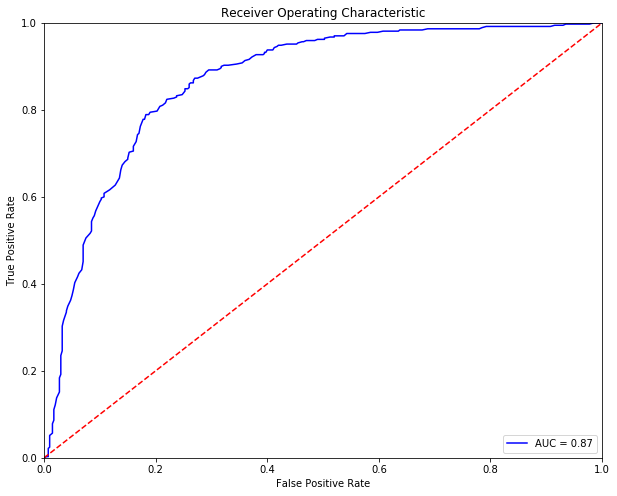

Optimal Threshold is 0.58
Accuracy on test data is: 0.802597402597


Predicted  0.0  1.0  __all__
Actual                      
0.0        324   76      400
1.0         76  294      370
__all__    400  370      770

In [280]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [281]:
table_80_50_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [282]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.940832249675


Predicted     0     1  __all__
Actual                        
0          1418   105     1523
1            77  1476     1553
__all__    1495  1581     3076

The test accuracy is: 0.798701298701


Predicted    0    1  __all__
Actual                      
0          301   99      400
1           56  314      370
__all__    357  413      770

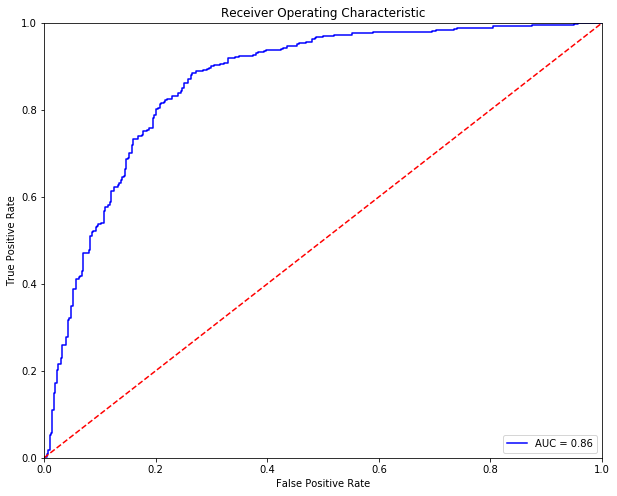

Optimal Threshold is 0.539517470735
Accuracy on test data is: 0.8


Predicted  0.0  1.0  __all__
Actual                      
0.0        320   80      400
1.0         74  296      370
__all__    394  376      770

In [283]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [284]:
table_80_50_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [285]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.852405721717


Predicted     0     1  __all__
Actual                        
0          1312   211     1523
1           243  1310     1553
__all__    1555  1521     3076

The accuracy of the model on test data is: 0.784415584416


Predicted    0    1  __all__
Actual                      
0          306   94      400
1           72  298      370
__all__    378  392      770

 32/770 [>.............................] - ETA: 0s

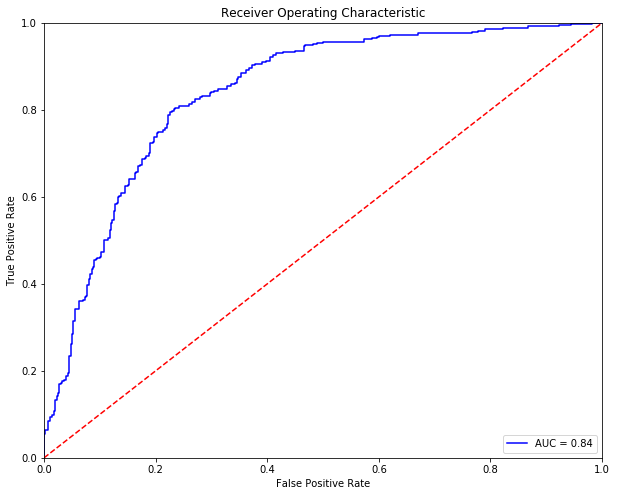

Optimal Threshold is 0.529207
Accuracy of Logistic Model on training data is: 0.774025974026


Predicted  0.0  1.0  __all__
Actual                      
0.0        312   88      400
1.0         86  284      370
__all__    398  372      770

In [286]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [287]:
table_80_50_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [288]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.1min finished


The accuracy of the model on training data is: 0.783485045514


Predicted     0     1  __all__
Actual                        
0          1061   462     1523
1           204  1349     1553
__all__    1265  1811     3076

The accuracy of the model on test data is: 0.776623376623


Predicted    0    1  __all__
Actual                      
0          271  129      400
1           43  327      370
__all__    314  456      770

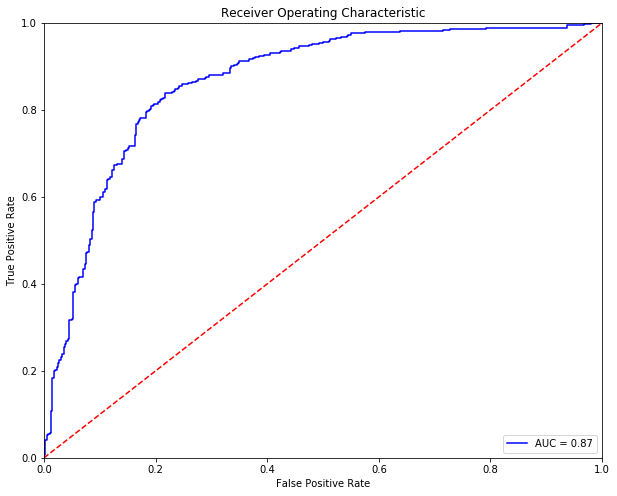

Optimal Threshold is 0.648322
Accuracy on test data is: 0.806493506494


Predicted  0.0  1.0  __all__
Actual                      
0.0        323   77      400
1.0         72  298      370
__all__    395  375      770

In [289]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [290]:
table_80_50_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [291]:
table_80_50_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1553.0  1523.0    0.0    0.0  0.000000   
LogisticRegression          0.755527  1191.0  1133.0  390.0  362.0  0.256074   
RandomForestClassifier      0.763654  1304.0  1045.0  478.0  249.0  0.313854   
AdaBoostClassifier          0.777958  1296.0  1097.0  426.0  257.0  0.279711   
GradientBoostingClassifier  0.794213  1293.0  1150.0  373.0  260.0  0.244911   
ExtraTreeClassifier         0.783160  1293.0  1116.0  407.0  260.0  0.267236   
BaggingClassifier           0.952536  1494.0  1436.0   87.0   59.0  0.057124   
VotingClassifier            0.940832  1476.0  1418.0  105.0   77.0  0.068943   
Neural Network-1            0.852406  1310.0  1312.0  211.0  243.0  0.138542   
Neural-Network-2            0.783485  1349.0  1061.0  462.0  204.0  0.303349   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.233097  
RandomForestClassifier      0.160335  
AdaBoostClassifier          0.165486  
GradientBoostingClassifier  0.167418  
ExtraTreeClassifier         0.167418  
BaggingClassifier           0.037991  
VotingClassifier            0.049581  
Neural Network-1            0.156471  
Neural-Network-2            0.131359

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP    FN     FPR  \
index                                                                     
KNeighborsClassifier        0.781818  287.0  315.0   85.0  83.0  0.2125   
LogisticRegression          0.794805  303.0  309.0   91.0  67.0  0.2275   
RandomForestClassifier      0.793506  327.0  284.0  116.0  43.0  0.2900   
AdaBoostClassifier          0.796104  322.0  291.0  109.0  48.0  0.2725   
GradientBoostingClassifier  0.802597  316.0  302.0   98.0  54.0  0.2450   
ExtraTreeClassifier         0.754545  301.0  280.0  120.0  69.0  0.3000   
BaggingClassifier           0.794805  328.0  284.0  116.0  42.0  0.2900   
VotingClassifier            0.798701  314.0  301.0   99.0  56.0  0.2475   
Neural Network-1            0.784416  298.0  306.0   94.0  72.0  0.2350   
Neural-Network-2            0.776623  327.0  271.0  129.0  43.0  0.3225   

                                 FNR  
index                                 
KNeighborsClassifier        0.224324  
LogisticRegression          0.181081  
RandomForestClassifier      0.116216  
AdaBoostClassifier          0.129730  
GradientBoostingClassifier  0.145946  
ExtraTreeClassifier         0.186486  
BaggingClassifier           0.113514  
VotingClassifier            0.151351  
Neural Network-1            0.194595  
Neural-Network-2            0.116216

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN    FP     FN     FPR  \
index                                                                     
KNeighborsClassifier        0.777922  288.0  311.0  89.0   82.0  0.2225   
LogisticRegression          0.784416  289.0  315.0  85.0   81.0  0.2125   
RandomForestClassifier      0.785714  284.0  321.0  79.0   86.0  0.1975   
AdaBoostClassifier          0.798701  295.0  320.0  80.0   75.0  0.2000   
GradientBoostingClassifier  0.796104  294.0  319.0  81.0   76.0  0.2025   
ExtraTreeClassifier         0.658442  164.0  343.0  57.0  206.0  0.1425   
BaggingClassifier           0.802597  294.0  324.0  76.0   76.0  0.1900   
VotingClassifier            0.800000  296.0  320.0  80.0   74.0  0.2000   
Neural Network-1            0.774026  284.0  312.0  88.0   86.0  0.2200   
Neural-Network-2            0.806494  298.0  323.0  77.0   72.0  0.1925   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.221622   0.494087  0.857784  
LogisticRegression          0.218919   0.520671  0.867527  
RandomForestClassifier      0.232432   0.548665  0.831949  
AdaBoostClassifier          0.202703   0.503368  0.862291  
GradientBoostingClassifier  0.205405   0.583311  0.867922  
ExtraTreeClassifier         0.556757   0.708725  0.810436  
BaggingClassifier           0.205405   0.580000  0.866980  
VotingClassifier            0.200000   0.539517  0.864493  
Neural Network-1            0.232432   0.529207  0.838865  
Neural-Network-2            0.194595   0.648322  0.865818

#### Random State 10

In [292]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  2984  216.771448   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   264   25.242424   

                                                          PAS        LEN  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  74.177949  82.084115   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  35.803030  69.193182   

                                                             BYS  \
Source_User                                                        
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   9038.178284   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  30610.265152   

                                                              BYR      SP  \
Source_User                                                                 
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  286763.437332  2689.0   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   11302.988636   263.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  13.0    45   19  784   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   7.0    19   36   97   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   1642.074397   265   188   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  17986.772727     0     5   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   248    39    82    43   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0    16     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   112    20    50    46   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0     6    51   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    89    81    80   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    45    11     8     9   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    70   200   116   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    20     2     6    13   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   195   158   176   167   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     4    42    18     8   

                                                    2200  2300  
Source_User                                                     
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   116   233  
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0

1 -> Infected
0 -> Uninfected


Source_User
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5bed0d545a1327be88    1
7d72b802c8934804b499a7b417a31857b112353b42885b2290ff09aeef55bebf    0
c59c78cbcb78f0f7140cef977c9016a08b9d4d91bc5b2e537327b2ab2b791f95    1
8b4f22fd3269f43630ef23cc553c80f72740dcc05fec14b0caad367768ce21a4    1
caea0e5257613ba78f187ac0616758755573aa9b58006fb8a5b671496fc3e392    1
f7cbcf0d21066d971d1948c618f66de0188cb7326b8c198ddd66d18d7e4d91bd    1
d487fb3eaf4e620ba1acd93bfce4387f10e162062f03f15f813c62481bf0a518    1
60430a2cacf66446dae118e6f4b204221901dcd2f3a3faffee16848f2ae9d0ec    1
becf4f677fab6f341e04c1c6ef46ae9d5c90175660426fb33dbd7ed850aec06d    0
f0ae081c92bfcbd5f316ae0d19db53b6a9edfdfc687166f2a5b4e6eb60d9c9ed    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.902209458443
The train/test split ratio is 80:20


In [293]:
display(X_pca_13[0:1])

array([[ 0.24000256,  0.17166104, -0.29779177,  0.87141713, -0.0839201 ,
        -0.22320145,  0.07166746,  0.12943633, -0.46254866, -0.57128233,
         0.06970679,  0.29780827, -0.69246109]])

In [294]:
## Table to store training and test measures
table_80_50_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [295]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1544     0     1544
1             0  1532     1532
__all__    1544  1532     3076

Accuracy of the  KNN  model for test data is: 0.755844155844

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          297   82      379
1          106  285      391
__all__    403  367      770

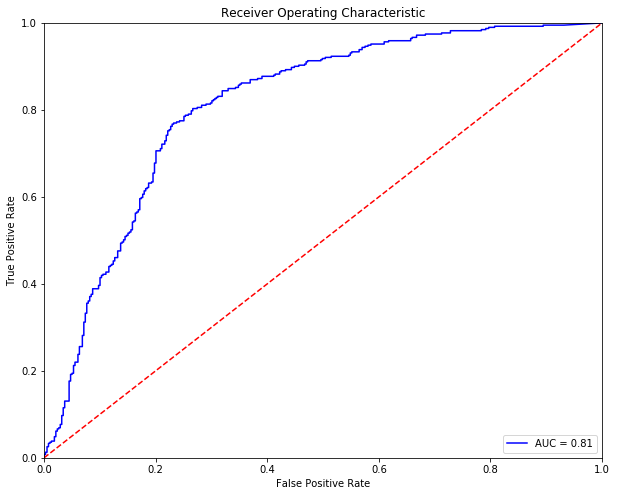

Optimal Threshold is 0.466887862884
Accuracy on test data is: 0.768831168831


Predicted  0.0  1.0  __all__
Actual                      
0.0        292   87      379
1.0         91  300      391
__all__    383  387      770

In [296]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [297]:
table_80_50_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [298]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  1e-05

Accuracy of the  Logistic  model for the training data is: 0.784460338101

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1218   326     1544
1           337  1195     1532
__all__    1555  1521     3076

Accuracy of the  Logistic  model for test data is: 0.766233766234

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          291   88      379
1           92  299      391
__all__    383  387      770

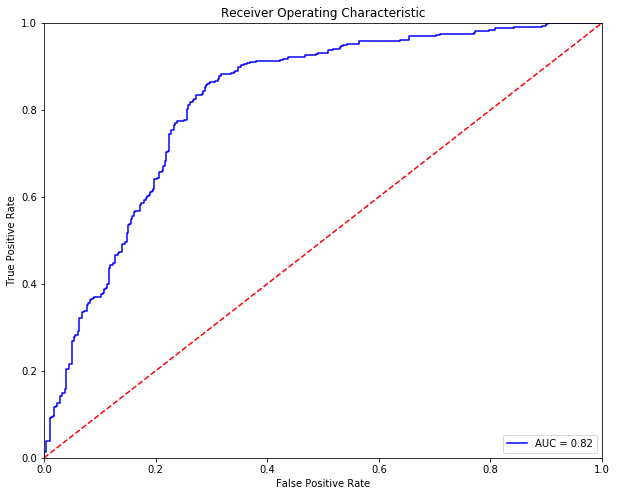

Optimal Threshold is 0.498996063989
Accuracy on test data is: 0.766233766234


Predicted  0.0  1.0  __all__
Actual                      
0.0        291   88      379
1.0         92  299      391
__all__    383  387      770

In [299]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [300]:
table_80_50_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [301]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.784135240572

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1181   363     1544
1           301  1231     1532
__all__    1482  1594     3076

Accuracy of the  Random Forest Trees  model for test data is: 0.767532467532

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          283   96      379
1           83  308      391
__all__    366  404      770

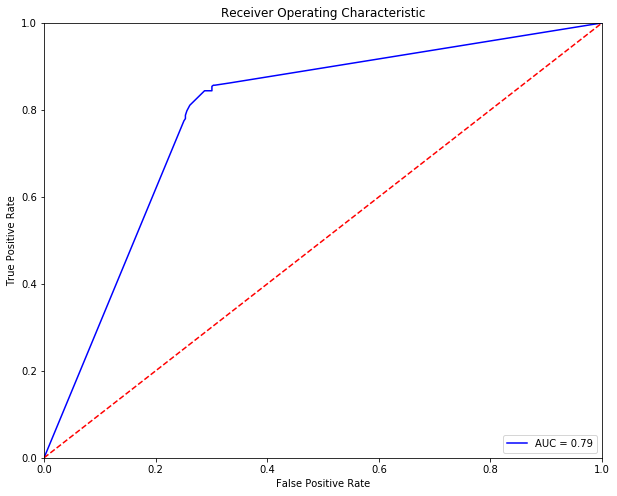

Optimal Threshold is 0.553420448591
Accuracy on test data is: 0.492207792208


Predicted  0.0  1.0  __all__
Actual                      
0.0        379    0      379
1.0        391    0      391
__all__    770    0      770

In [302]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [303]:
table_80_50_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

379
0
0
379
391
0
0
391
1.0
0.0
0.0
1.0


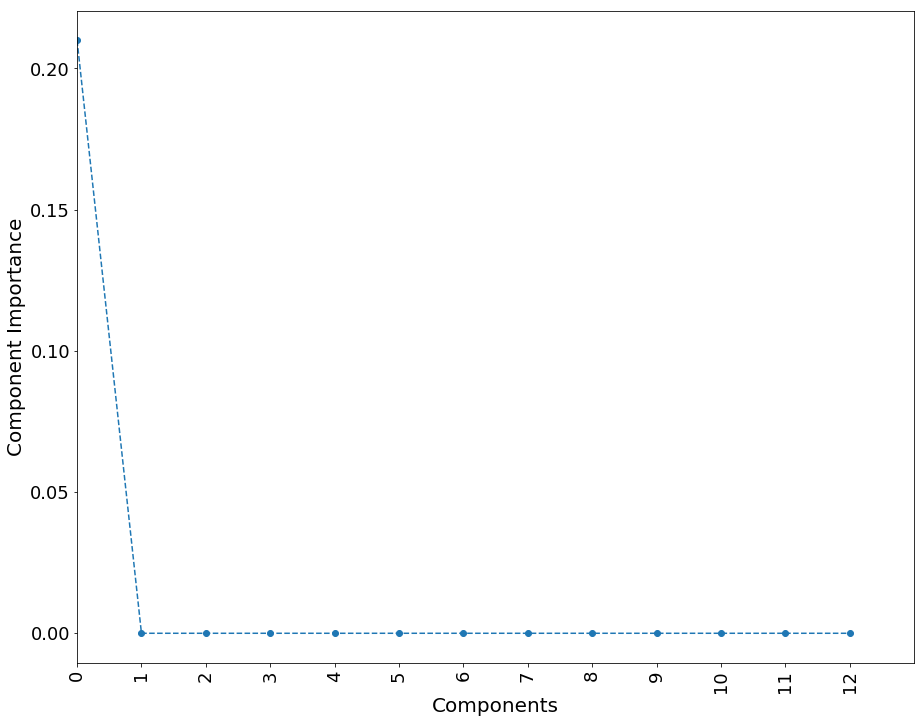

In [304]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [305]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.783810143043

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1180   364     1544
1           301  1231     1532
__all__    1481  1595     3076

Accuracy of the  AdaBoostClassifier  model for test data is: 0.768831168831

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          283   96      379
1           82  309      391
__all__    365  405      770

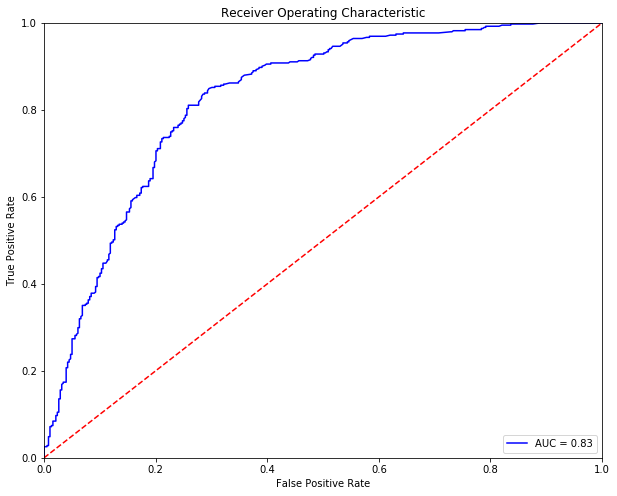

Optimal Threshold is 0.510456136884
Accuracy on test data is: 0.761038961039


Predicted  0.0  1.0  __all__
Actual                      
0.0        289   90      379
1.0         94  297      391
__all__    383  387      770

In [306]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [307]:
table_80_50_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

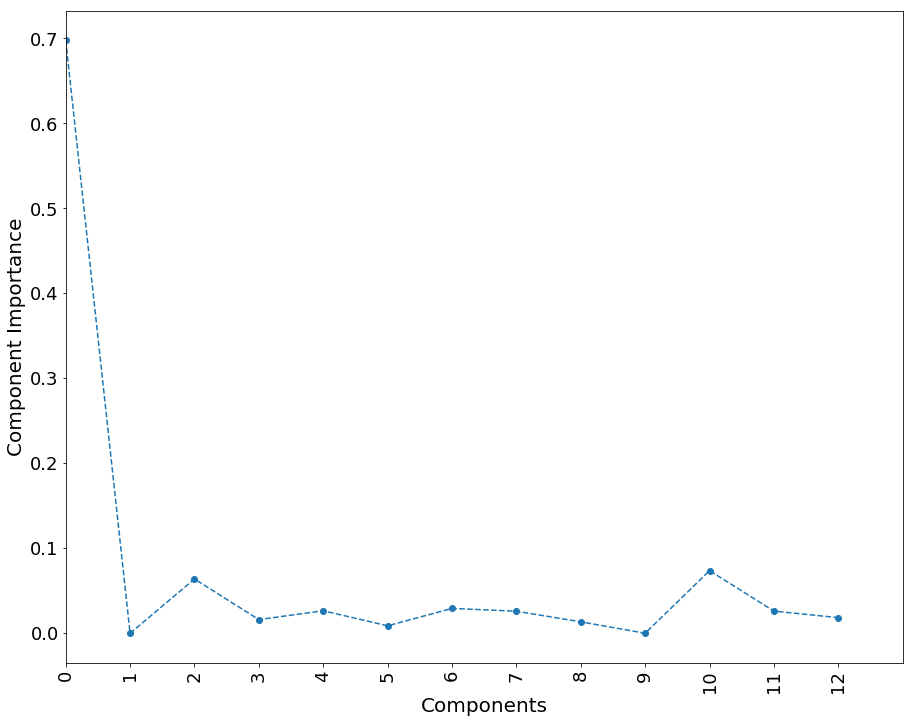

In [308]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [309]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.1  deviance                15   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           100             0        0.5

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.80721716515

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1215   329     1544
1           264  1268     1532
__all__    1479  1597     3076

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.776623376623

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          281   98      379
1           74  317      391
__all__    355  415      770

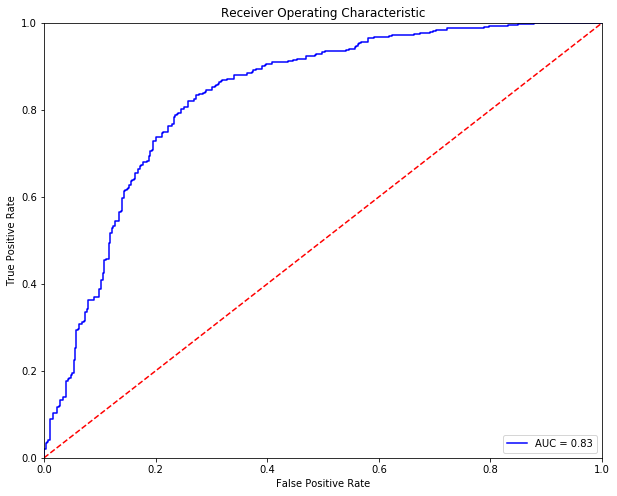

Optimal Threshold is 0.567857670772
Accuracy on test data is: 0.768831168831


Predicted  0.0  1.0  __all__
Actual                      
0.0        292   87      379
1.0         91  300      391
__all__    383  387      770

In [310]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [311]:
table_80_50_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

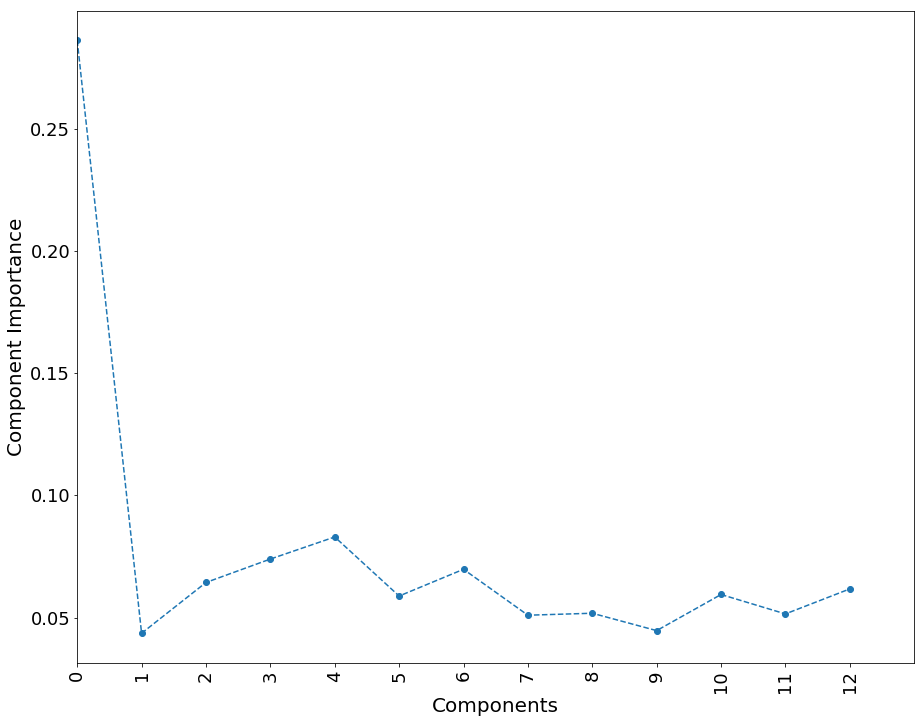

In [312]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [313]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.78088426528

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1135   409     1544
1           265  1267     1532
__all__    1400  1676     3076

Accuracy of the  Extra Decision Tree  model for test data is: 0.758441558442

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          266  113      379
1           73  318      391
__all__    339  431      770

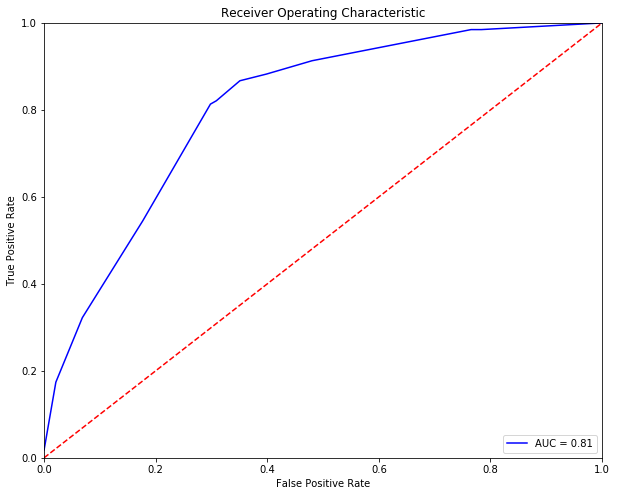

Optimal Threshold is 0.656351791531
Accuracy on test data is: 0.681818181818


Predicted  0.0  1.0  __all__
Actual                      
0.0        312   67      379
1.0        178  213      391
__all__    490  280      770

In [314]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [315]:
table_80_50_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [316]:
%%capture
table_80_50_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

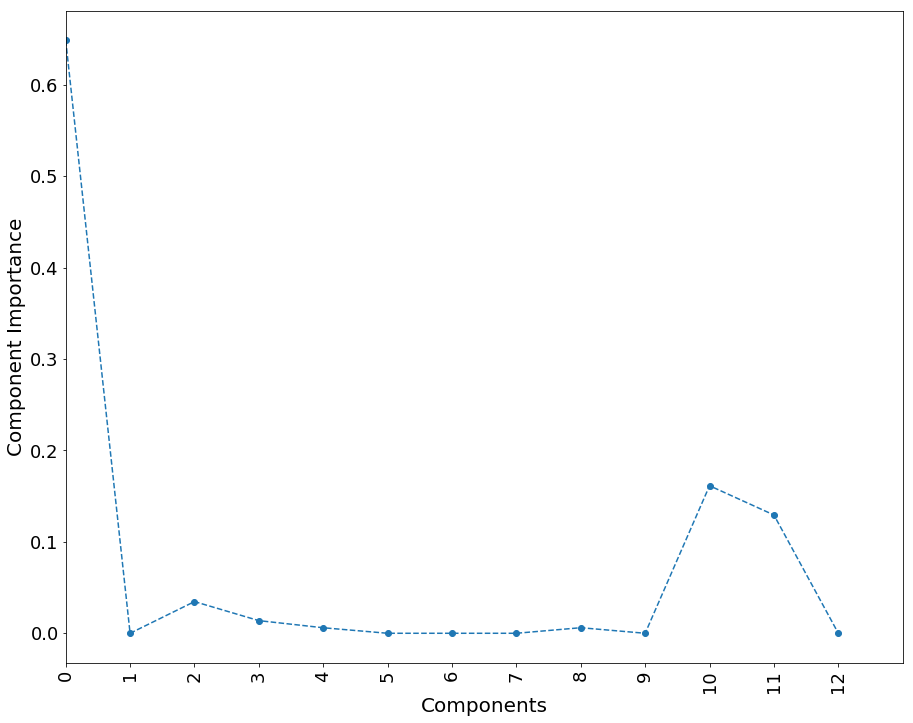

In [317]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [318]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.944733420026

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1447    97     1544
1            73  1459     1532
__all__    1520  1556     3076

Accuracy of the  Bagging  model for test data is: 0.766233766234

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          267  112      379
1           68  323      391
__all__    335  435      770

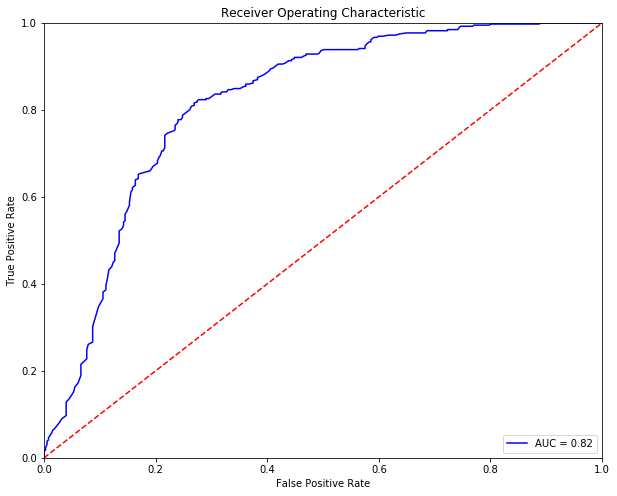

Optimal Threshold is 0.573333333333
Accuracy on test data is: 0.761038961039


Predicted  0.0  1.0  __all__
Actual                      
0.0        290   89      379
1.0         95  296      391
__all__    385  385      770

In [319]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [320]:
table_80_50_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [321]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.932054616385


Predicted     0     1  __all__
Actual                        
0          1431   113     1544
1            96  1436     1532
__all__    1527  1549     3076

The test accuracy is: 0.757142857143


Predicted    0    1  __all__
Actual                      
0          280   99      379
1           88  303      391
__all__    368  402      770

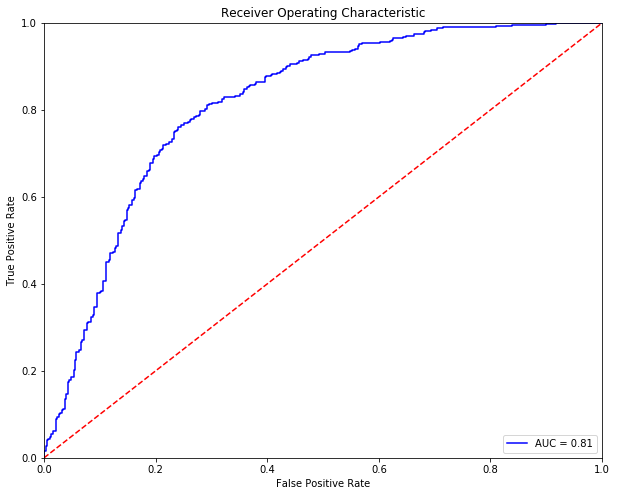

Optimal Threshold is 0.514366750893
Accuracy on test data is: 0.758441558442


Predicted  0.0  1.0  __all__
Actual                      
0.0        288   91      379
1.0         95  296      391
__all__    383  387      770

In [322]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [323]:
table_80_50_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [324]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.837451235371


Predicted     0     1  __all__
Actual                        
0          1308   236     1544
1           264  1268     1532
__all__    1572  1504     3076

The accuracy of the model on test data is: 0.754545454545


Predicted    0    1  __all__
Actual                      
0          286   93      379
1           96  295      391
__all__    382  388      770

 32/770 [>.............................] - ETA: 0s

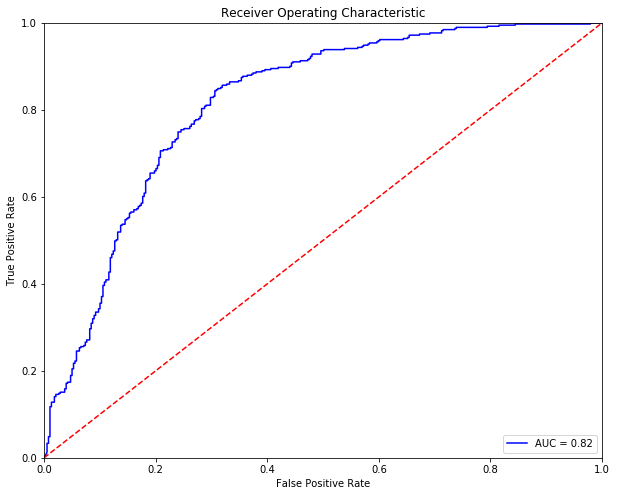

Optimal Threshold is 0.501365
Accuracy of Logistic Model on training data is: 0.753246753247


Predicted  0.0  1.0  __all__
Actual                      
0.0        286   93      379
1.0         97  294      391
__all__    383  387      770

In [325]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [326]:
table_80_50_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [327]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.4min finished


The accuracy of the model on training data is: 0.803966189857


Predicted     0     1  __all__
Actual                        
0          1178   366     1544
1           237  1295     1532
__all__    1415  1661     3076

The accuracy of the model on test data is: 0.774025974026


Predicted    0    1  __all__
Actual                      
0          269  110      379
1           64  327      391
__all__    333  437      770

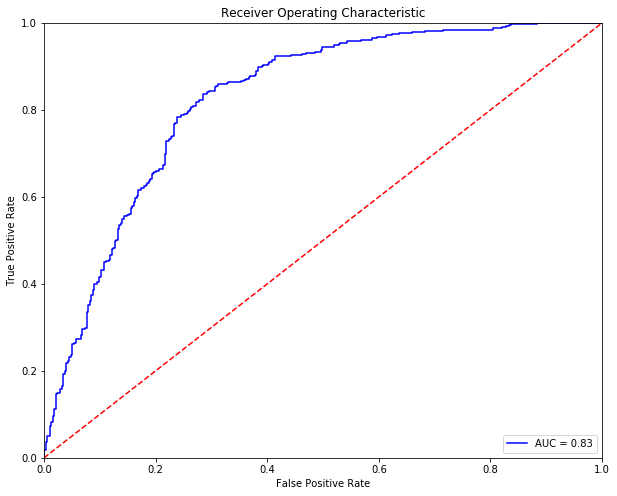

Optimal Threshold is 0.665696
Accuracy on test data is: 0.766233766234


Predicted  0.0  1.0  __all__
Actual                      
0.0        291   88      379
1.0         92  299      391
__all__    383  387      770

In [328]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [329]:
table_80_50_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [330]:
table_80_50_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1532.0  1544.0    0.0    0.0  0.000000   
LogisticRegression          0.784460  1195.0  1218.0  326.0  337.0  0.211140   
RandomForestClassifier      0.784135  1231.0  1181.0  363.0  301.0  0.235104   
AdaBoostClassifier          0.783810  1231.0  1180.0  364.0  301.0  0.235751   
GradientBoostingClassifier  0.807217  1268.0  1215.0  329.0  264.0  0.213083   
ExtraTreeClassifier         0.780884  1267.0  1135.0  409.0  265.0  0.264896   
BaggingClassifier           0.944733  1459.0  1447.0   97.0   73.0  0.062824   
VotingClassifier            0.932055  1436.0  1431.0  113.0   96.0  0.073187   
Neural Network-1            0.837451  1268.0  1308.0  236.0  264.0  0.152850   
Neural-Network-2            0.803966  1295.0  1178.0  366.0  237.0  0.237047   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.219974  
RandomForestClassifier      0.196475  
AdaBoostClassifier          0.196475  
GradientBoostingClassifier  0.172324  
ExtraTreeClassifier         0.172977  
BaggingClassifier           0.047650  
VotingClassifier            0.062663  
Neural Network-1            0.172324  
Neural-Network-2            0.154700

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.755844  285.0  297.0   82.0  106.0  0.216359   
LogisticRegression          0.766234  299.0  291.0   88.0   92.0  0.232190   
RandomForestClassifier      0.767532  308.0  283.0   96.0   83.0  0.253298   
AdaBoostClassifier          0.768831  309.0  283.0   96.0   82.0  0.253298   
GradientBoostingClassifier  0.776623  317.0  281.0   98.0   74.0  0.258575   
ExtraTreeClassifier         0.758442  318.0  266.0  113.0   73.0  0.298153   
BaggingClassifier           0.766234  323.0  267.0  112.0   68.0  0.295515   
VotingClassifier            0.757143  303.0  280.0   99.0   88.0  0.261214   
Neural Network-1            0.754545  295.0  286.0   93.0   96.0  0.245383   
Neural-Network-2            0.774026  327.0  269.0  110.0   64.0  0.290237   

                                 FNR  
index                                 
KNeighborsClassifier        0.271100  
LogisticRegression          0.235294  
RandomForestClassifier      0.212276  
AdaBoostClassifier          0.209719  
GradientBoostingClassifier  0.189258  
ExtraTreeClassifier         0.186701  
BaggingClassifier           0.173913  
VotingClassifier            0.225064  
Neural Network-1            0.245524  
Neural-Network-2            0.163683

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.768831  300.000000  292.000000   87.000000   
LogisticRegression          0.766234  299.000000  291.000000   88.000000   
RandomForestClassifier      0.492208  186.546753  192.453247  192.453247   
AdaBoostClassifier          0.761039  297.000000  289.000000   90.000000   
GradientBoostingClassifier  0.768831  300.000000  292.000000   87.000000   
ExtraTreeClassifier         0.681818  213.000000  312.000000   67.000000   
BaggingClassifier           0.761039  296.000000  290.000000   89.000000   
VotingClassifier            0.758442  296.000000  288.000000   91.000000   
Neural Network-1            0.753247  294.000000  286.000000   93.000000   
Neural-Network-2            0.766234  299.000000  291.000000   88.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier         91.000000  0.229551  0.232737   0.466888   
LogisticRegression           92.000000  0.232190  0.235294   0.498996   
RandomForestClassifier      198.546753  0.492208  0.507792   0.553420   
AdaBoostClassifier           94.000000  0.237467  0.240409   0.510456   
GradientBoostingClassifier   91.000000  0.229551  0.232737   0.567858   
ExtraTreeClassifier         178.000000  0.176781  0.455243   0.656352   
BaggingClassifier            95.000000  0.234828  0.242967   0.573333   
VotingClassifier             95.000000  0.240106  0.242967   0.514367   
Neural Network-1             97.000000  0.245383  0.248082   0.501365   
Neural-Network-2             92.000000  0.232190  0.235294   0.665696   

                                 auc  
index                                 
KNeighborsClassifier        0.811025  
LogisticRegression          0.820715  
RandomForestClassifier      0.787116  
AdaBoostClassifier          0.826873  
GradientBoostingClassifier  0.830628  
ExtraTreeClassifier         0.805610  
BaggingClassifier           0.816623  
VotingClassifier            0.814311  
Neural Network-1            0.815384  
Neural-Network-2            0.826121

#### Random State 20

In [331]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  3475  119.307626   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   558   31.100358   

                                                          PAS         LEN  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  60.322302   94.924029   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  18.324373  120.193548   

                                                            BYS  \
Source_User                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  6983.720863   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  2986.801075   

                                                              BYR      SP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  151221.195108  3079.0   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   31418.557348   555.0   

                                                       DP  NAPP  SIP  DIP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  106.0    54   74  911   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    5.0    25   53  227   

                                                           TDIF  0000  0100  \
Source_User                                                                   
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1409.110216   419   383   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  8542.105735    13    44   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   267   141    95    48   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     2     6     5     3   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    31    11    30    33   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     4     1     0     8   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    39    68   187    89   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    25    35    44    67   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    79   110    56   187   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    94    27    18    19   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   161   174   303   126   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    30    32    40    32   

                                                    2200  2300  
Source_User                                                     
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   303   135  
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     6     3

1 -> Infected
0 -> Uninfected


Source_User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
afbe75a93f02da27be2a836bef717ffeef19714de5a1f2121d5a93fe043e70f1    1
28f9fffb669c004731f11c34913ce913981fd3534ea37ce2bb0e9b942091ff57    0
c966f4446da082203a9bfc84af2a2db29baa017722ac03471cf412932a6c0e90    1
b938ef4078ace510c6696a63e7ee215b9443b59f0d5c7a5f3d79bc1a672c0ca8    1
c1d72e5d7b7f24020163240ecbb1e648745a058b5f18c44f1cf8ceea6be1dc8b    1
8b76ca850d1587f46c2740a3dc662f9730d183fc173a25c6c7fcae215adde149    1
1b93b31e3d3282a98216531e95ddd1400a7728383f6f348ce19b05d873a6122a    1
f0629dde75324f00bdd60ba5ff96dd8f198c45117c089691e44c6c0e871d5947    1
bb235609630753fadf401ecbf9b9c323c35273de648930ce0b76cbd128c882fe    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.980948185529
The train/test split ratio is 80:20


In [332]:
display(X_pca_13[0:1])

array([[ 0.2007779 , -1.07935185,  0.10382907, -0.37493318, -0.12497987,
        -0.01245315,  0.54386681, -0.36568038, -0.42133199,  1.34995611,
         0.05528869, -1.94489183,  0.50926882]])

In [333]:
## Table to store training and test measures
table_80_50_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [334]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1538     0     1538
1             0  1538     1538
__all__    1538  1538     3076

Accuracy of the  KNN  model for test data is: 0.784415584416

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          299   86      385
1           80  305      385
__all__    379  391      770

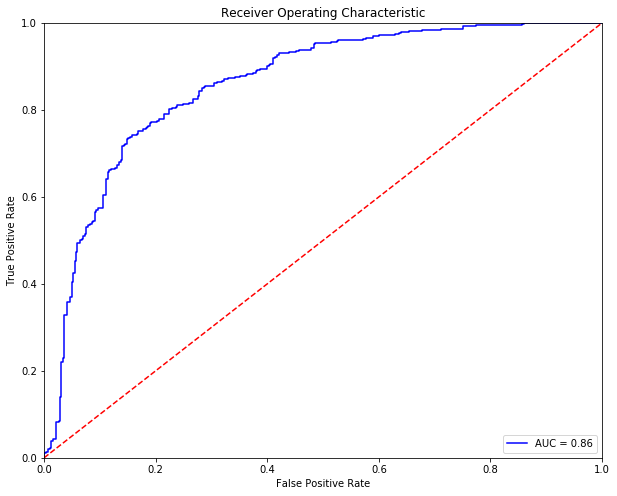

Optimal Threshold is 0.507227317751
Accuracy on test data is: 0.785714285714


Predicted  0.0  1.0  __all__
Actual                      
0.0        302   83      385
1.0         82  303      385
__all__    384  386      770

In [335]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [336]:
table_80_50_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [337]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False          False                0.5        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2   lbfgs  0.1

Accuracy of the  Logistic  model for the training data is: 0.767230169051

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1156   382     1538
1           334  1204     1538
__all__    1490  1586     3076

Accuracy of the  Logistic  model for test data is: 0.783116883117

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          295   90      385
1           77  308      385
__all__    372  398      770

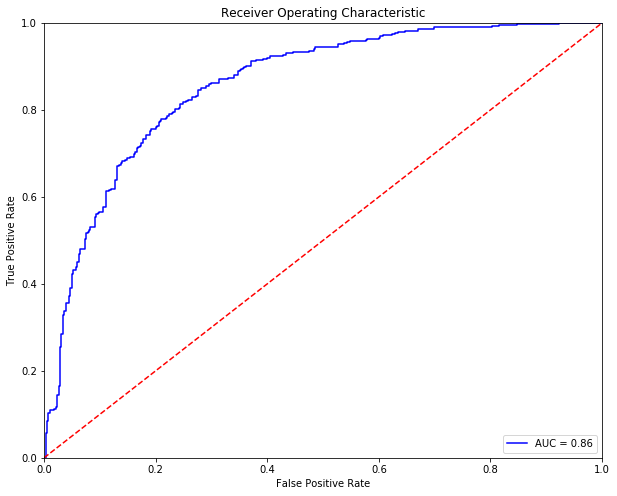

Optimal Threshold is 0.509915558283
Accuracy on test data is: 0.780519480519


Predicted  0.0  1.0  __all__
Actual                      
0.0        301   84      385
1.0         85  300      385
__all__    386  384      770

In [338]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [339]:
table_80_50_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [340]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0        entropy         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.770806241873

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1045   493     1538
1           212  1326     1538
__all__    1257  1819     3076

Accuracy of the  Random Forest Trees  model for test data is: 0.780519480519

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          265  120      385
1           49  336      385
__all__    314  456      770

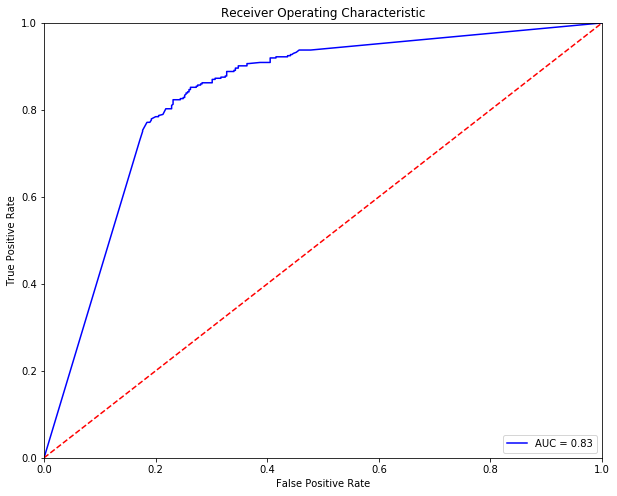

Optimal Threshold is 0.610967866964
Accuracy on test data is: 0.790909090909


Predicted  0.0  1.0  __all__
Actual                      
0.0        306   79      385
1.0         82  303      385
__all__    388  382      770

In [341]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [342]:
table_80_50_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

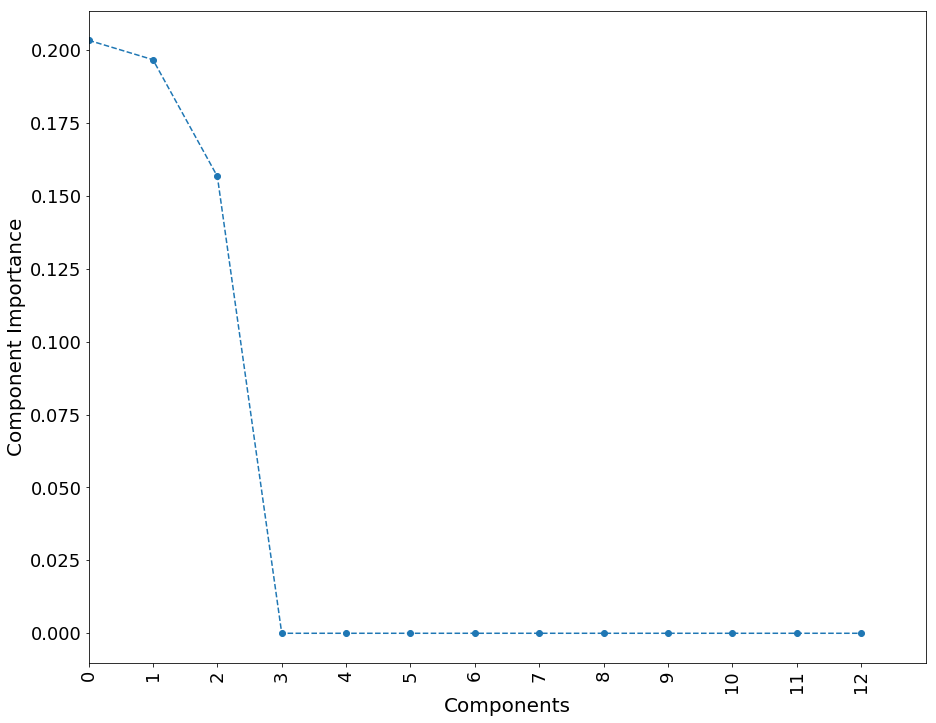

In [343]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [344]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.78055916775

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1142   396     1538
1           279  1259     1538
__all__    1421  1655     3076

Accuracy of the  AdaBoostClassifier  model for test data is: 0.790909090909

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          286   99      385
1           62  323      385
__all__    348  422      770

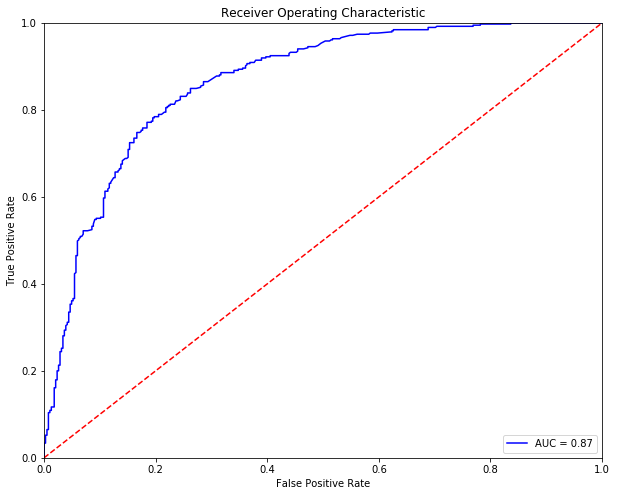

Optimal Threshold is 0.501642026622
Accuracy on test data is: 0.790909090909


Predicted  0.0  1.0  __all__
Actual                      
0.0        305   80      385
1.0         81  304      385
__all__    386  384      770

In [345]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [346]:
table_80_50_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

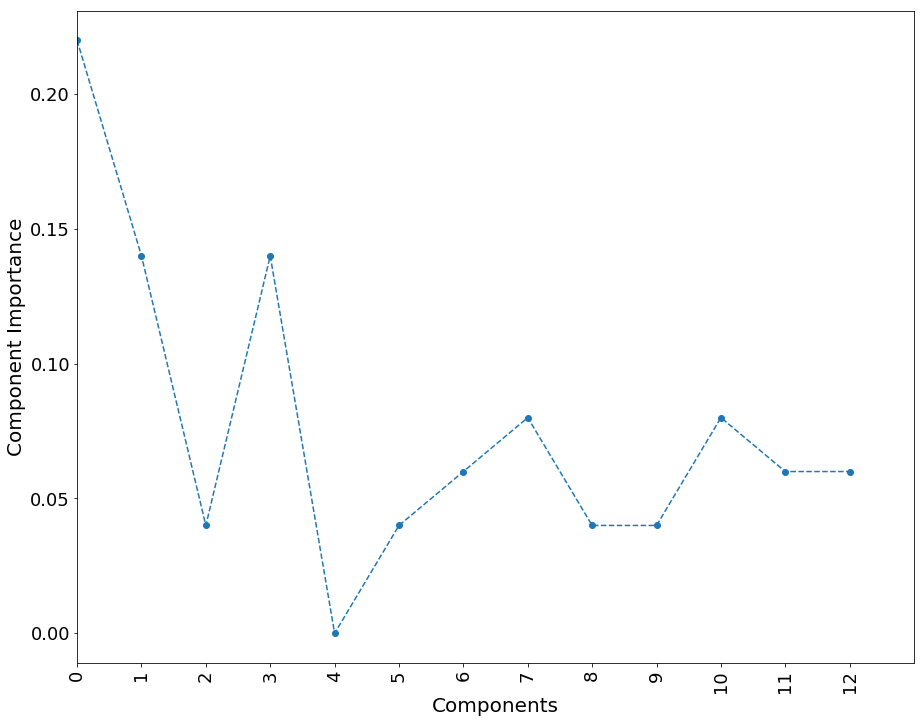

In [347]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [348]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.05  deviance                 5   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3           100             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.78511053316

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1126   412     1538
1           249  1289     1538
__all__    1375  1701     3076

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.78961038961

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          284  101      385
1           61  324      385
__all__    345  425      770

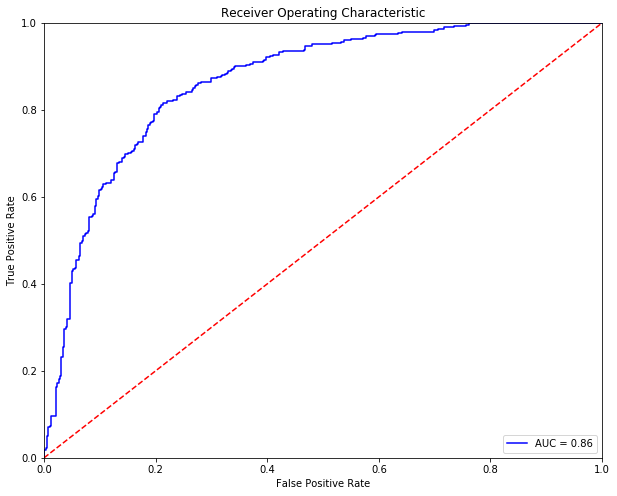

Optimal Threshold is 0.583145148569
Accuracy on test data is: 0.796103896104


Predicted  0.0  1.0  __all__
Actual                      
0.0        307   78      385
1.0         79  306      385
__all__    386  384      770

In [349]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [350]:
table_80_50_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

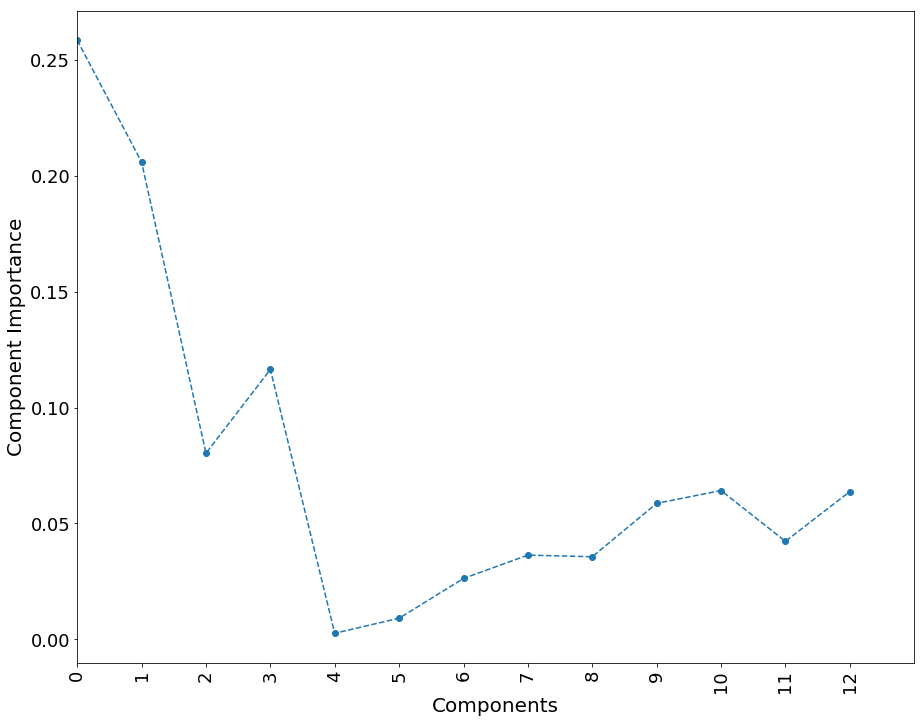

In [351]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [352]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  5             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.789011703511

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1107   431     1538
1           218  1320     1538
__all__    1325  1751     3076

Accuracy of the  Extra Decision Tree  model for test data is: 0.784415584416

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          273  112      385
1           54  331      385
__all__    327  443      770

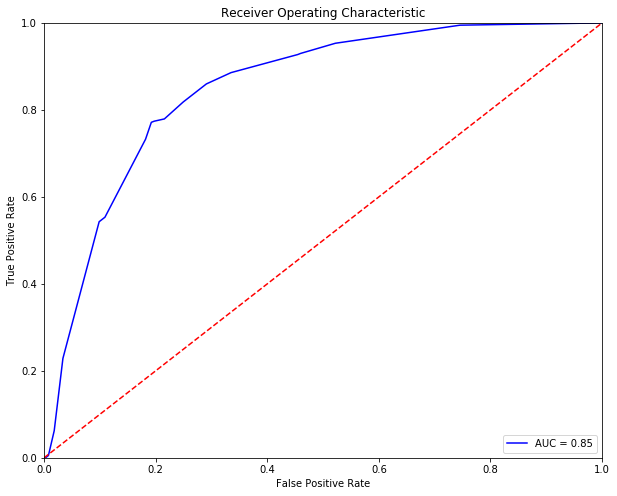

Optimal Threshold is 0.6
Accuracy on test data is: 0.788311688312


Predicted  0.0  1.0  __all__
Actual                      
0.0        309   76      385
1.0         87  298      385
__all__    396  374      770

In [353]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [354]:
table_80_50_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [355]:
%%capture
table_80_50_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

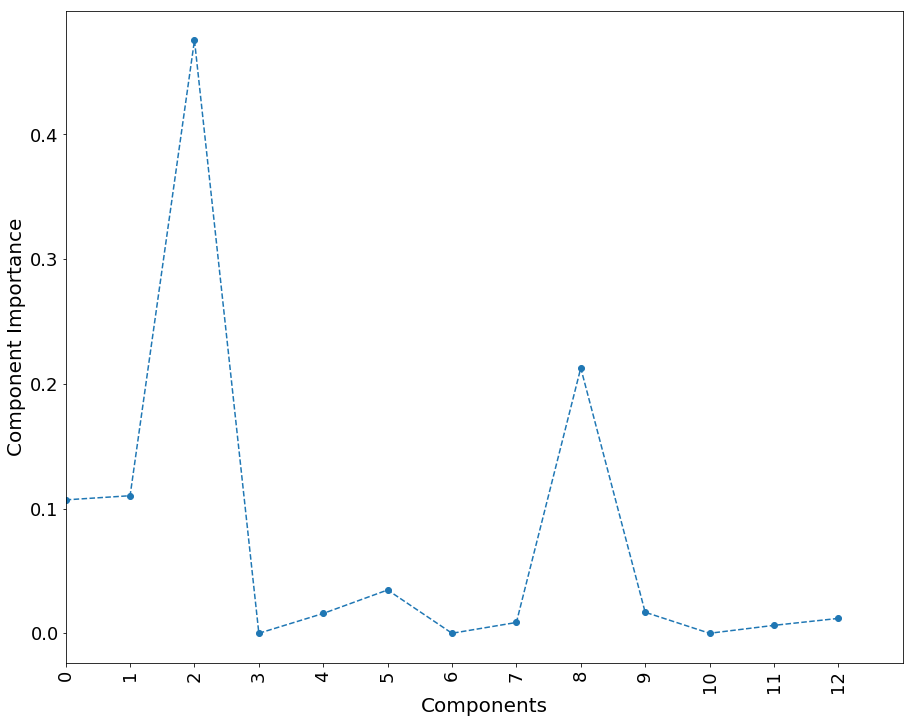

In [356]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [357]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.4           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.934980494148

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1415   123     1538
1            77  1461     1538
__all__    1492  1584     3076

Accuracy of the  Bagging  model for test data is: 0.78961038961

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          282  103      385
1           59  326      385
__all__    341  429      770

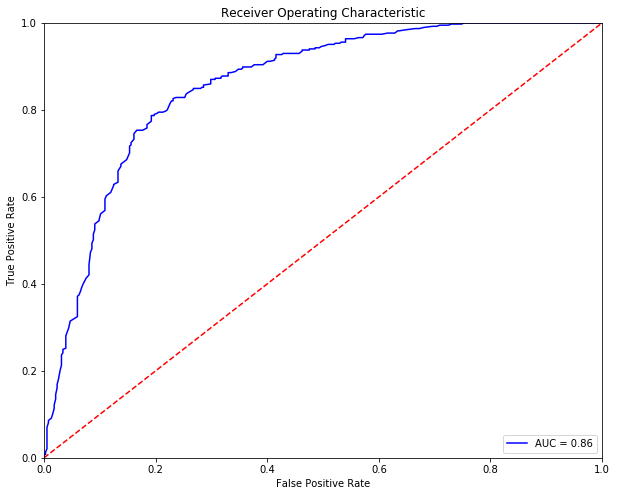

Optimal Threshold is 0.566666666667
Accuracy on test data is: 0.794805194805


Predicted  0.0  1.0  __all__
Actual                      
0.0        307   78      385
1.0         80  305      385
__all__    387  383      770

In [358]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [359]:
table_80_50_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [360]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.921976592978


Predicted     0     1  __all__
Actual                        
0          1403   135     1538
1           105  1433     1538
__all__    1508  1568     3076

The test accuracy is: 0.785714285714


Predicted    0    1  __all__
Actual                      
0          290   95      385
1           70  315      385
__all__    360  410      770

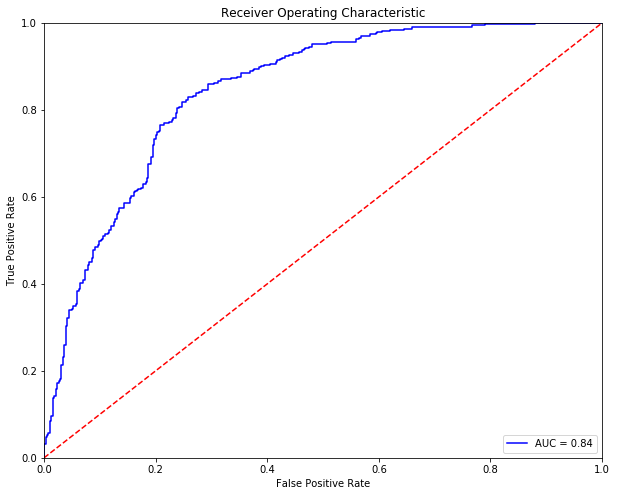

Optimal Threshold is 0.550716121156
Accuracy on test data is: 0.772727272727


Predicted  0.0  1.0  __all__
Actual                      
0.0        298   87      385
1.0         88  297      385
__all__    386  384      770

In [361]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [362]:
table_80_50_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [363]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.828023407022


Predicted     0     1  __all__
Actual                        
0          1274   264     1538
1           265  1273     1538
__all__    1539  1537     3076

The accuracy of the model on test data is: 0.785714285714


Predicted    0    1  __all__
Actual                      
0          303   82      385
1           83  302      385
__all__    386  384      770

768/770 [============================>.] - ETA: 0s

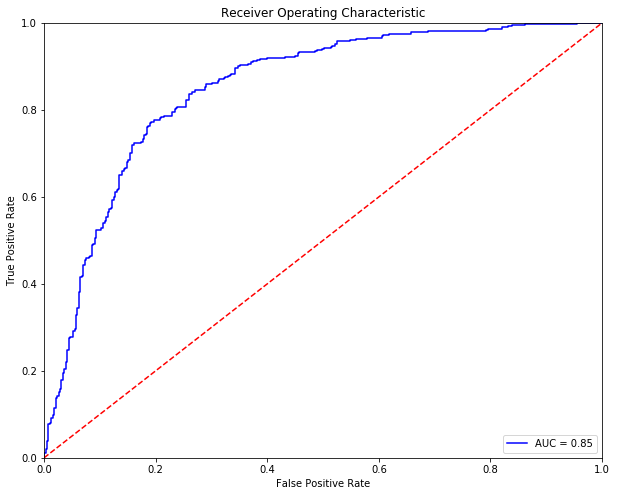

Optimal Threshold is 0.496529
Accuracy of Logistic Model on training data is: 0.785714285714


Predicted  0.0  1.0  __all__
Actual                      
0.0        303   82      385
1.0         83  302      385
__all__    386  384      770

In [364]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [365]:
table_80_50_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [366]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.8min finished


The accuracy of the model on training data is: 0.788036410923


Predicted     0     1  __all__
Actual                        
0          1119   419     1538
1           233  1305     1538
__all__    1352  1724     3076

The accuracy of the model on test data is: 0.8


Predicted    0    1  __all__
Actual                      
0          289   96      385
1           58  327      385
__all__    347  423      770

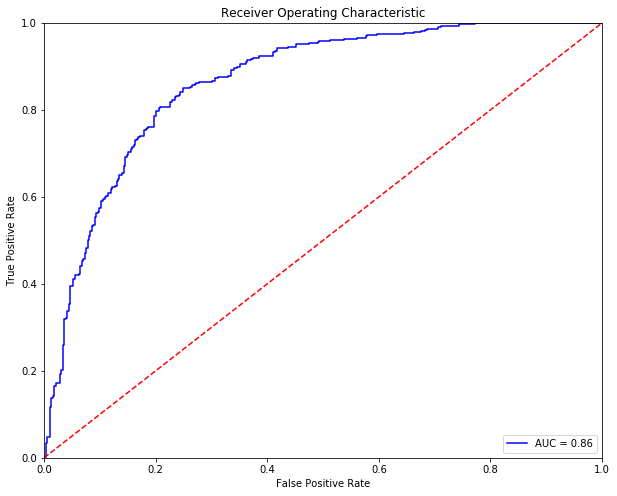

Optimal Threshold is 0.608467
Accuracy on test data is: 0.797402597403


Predicted  0.0  1.0  __all__
Actual                      
0.0        308   77      385
1.0         79  306      385
__all__    387  383      770

In [367]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [368]:
table_80_50_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_80_50_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [369]:
table_80_50_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_80_50_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1538.0  1538.0    0.0    0.0  0.000000   
LogisticRegression          0.767230  1204.0  1156.0  382.0  334.0  0.248375   
RandomForestClassifier      0.770806  1326.0  1045.0  493.0  212.0  0.320546   
AdaBoostClassifier          0.780559  1259.0  1142.0  396.0  279.0  0.257477   
GradientBoostingClassifier  0.785111  1289.0  1126.0  412.0  249.0  0.267880   
ExtraTreeClassifier         0.789012  1320.0  1107.0  431.0  218.0  0.280234   
BaggingClassifier           0.934980  1461.0  1415.0  123.0   77.0  0.079974   
VotingClassifier            0.921977  1433.0  1403.0  135.0  105.0  0.087776   
Neural Network-1            0.828023  1273.0  1274.0  264.0  265.0  0.171651   
Neural-Network-2            0.788036  1305.0  1119.0  419.0  233.0  0.272432   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.217165  
RandomForestClassifier      0.137841  
AdaBoostClassifier          0.181404  
GradientBoostingClassifier  0.161899  
ExtraTreeClassifier         0.141743  
BaggingClassifier           0.050065  
VotingClassifier            0.068270  
Neural Network-1            0.172302  
Neural-Network-2            0.151495

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP    FN       FPR  \
index                                                                       
KNeighborsClassifier        0.784416  305.0  299.0   86.0  80.0  0.223377   
LogisticRegression          0.783117  308.0  295.0   90.0  77.0  0.233766   
RandomForestClassifier      0.780519  336.0  265.0  120.0  49.0  0.311688   
AdaBoostClassifier          0.790909  323.0  286.0   99.0  62.0  0.257143   
GradientBoostingClassifier  0.789610  324.0  284.0  101.0  61.0  0.262338   
ExtraTreeClassifier         0.784416  331.0  273.0  112.0  54.0  0.290909   
BaggingClassifier           0.789610  326.0  282.0  103.0  59.0  0.267532   
VotingClassifier            0.785714  315.0  290.0   95.0  70.0  0.246753   
Neural Network-1            0.785714  302.0  303.0   82.0  83.0  0.212987   
Neural-Network-2            0.800000  327.0  289.0   96.0  58.0  0.249351   

                                 FNR  
index                                 
KNeighborsClassifier        0.207792  
LogisticRegression          0.200000  
RandomForestClassifier      0.127273  
AdaBoostClassifier          0.161039  
GradientBoostingClassifier  0.158442  
ExtraTreeClassifier         0.140260  
BaggingClassifier           0.153247  
VotingClassifier            0.181818  
Neural Network-1            0.215584  
Neural-Network-2            0.150649

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN    FP    FN       FPR  \
index                                                                      
KNeighborsClassifier        0.785714  303.0  302.0  83.0  82.0  0.215584   
LogisticRegression          0.780519  300.0  301.0  84.0  85.0  0.218182   
RandomForestClassifier      0.790909  303.0  306.0  79.0  82.0  0.205195   
AdaBoostClassifier          0.790909  304.0  305.0  80.0  81.0  0.207792   
GradientBoostingClassifier  0.796104  306.0  307.0  78.0  79.0  0.202597   
ExtraTreeClassifier         0.788312  298.0  309.0  76.0  87.0  0.197403   
BaggingClassifier           0.794805  305.0  307.0  78.0  80.0  0.202597   
VotingClassifier            0.772727  297.0  298.0  87.0  88.0  0.225974   
Neural Network-1            0.785714  302.0  303.0  82.0  83.0  0.212987   
Neural-Network-2            0.797403  306.0  308.0  77.0  79.0  0.200000   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.212987   0.507227  0.858877  
LogisticRegression          0.220779   0.509916  0.858108  
RandomForestClassifier      0.212987   0.610968  0.834869  
AdaBoostClassifier          0.210390   0.501642  0.865087  
GradientBoostingClassifier  0.205195   0.583145  0.864530  
ExtraTreeClassifier         0.225974   0.600000  0.849735  
BaggingClassifier           0.207792   0.566667  0.858708  
VotingClassifier            0.228571   0.550716  0.844540  
Neural Network-1            0.215584   0.496529  0.849735  
Neural-Network-2            0.205195   0.608467  0.864051

In [370]:
table_80_50_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_80_50_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [371]:
table_80_50_PCA_train_avg['accuracy']=(table_80_50_PCA_0_train['accuracy']+table_80_50_PCA_10_train['accuracy']+table_80_50_PCA_20_train['accuracy'])/3.0
table_80_50_PCA_train_avg['FPR']=(table_80_50_PCA_0_train['FPR']+table_80_50_PCA_10_train['FPR']+table_80_50_PCA_20_train['FPR'])/3.0
table_80_50_PCA_train_avg['FNR']=(table_80_50_PCA_0_train['FNR']+table_80_50_PCA_10_train['FNR']+table_80_50_PCA_20_train['FNR'])/3.0

In [372]:
table_80_50_PCA_test_avg['accuracy']=(table_80_50_PCA_0_test['accuracy']+table_80_50_PCA_10_test['accuracy']+table_80_50_PCA_20_test['accuracy'])/3.0
table_80_50_PCA_test_avg['FPR']=(table_80_50_PCA_0_test['FPR']+table_80_50_PCA_10_test['FPR']+table_80_50_PCA_20_test['FPR'])/3.0
table_80_50_PCA_test_avg['FNR']=(table_80_50_PCA_0_test['FNR']+table_80_50_PCA_10_test['FNR']+table_80_50_PCA_20_test['FNR'])/3.0

In [373]:
table_80_50_PCA_test_roc_avg['accuracy']=(table_80_50_PCA_0_test_roc['accuracy']+table_80_50_PCA_10_test_roc['accuracy']+table_80_50_PCA_20_test_roc['accuracy'])/3.0
table_80_50_PCA_test_roc_avg['FPR']=(table_80_50_PCA_0_test_roc['FPR']+table_80_50_PCA_10_test_roc['FPR']+table_80_50_PCA_20_test_roc['FPR'])/3.0
table_80_50_PCA_test_roc_avg['FNR']=(table_80_50_PCA_0_test_roc['FNR']+table_80_50_PCA_10_test_roc['FNR']+table_80_50_PCA_20_test_roc['FNR'])/3.0
table_80_50_PCA_test_roc_avg['auc']=(table_80_50_PCA_0_test_roc['auc']+table_80_50_PCA_10_test_roc['auc']+table_80_50_PCA_20_test_roc['auc'])/3.0

In [374]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_80_50_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_80_50_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_80_50_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.769072  0.238529  0.223412
RandomForestClassifier      0.772865  0.289835  0.164884
AdaBoostClassifier          0.780776  0.257647  0.181122
GradientBoostingClassifier  0.795514  0.241958  0.167213
ExtraTreeClassifier         0.784352  0.270789  0.160712
BaggingClassifier           0.944083  0.066641  0.045235
VotingClassifier            0.931621  0.076635  0.060172
Neural Network-1            0.839293  0.154348  0.167032
Neural-Network-2            0.791829  0.270942  0.145851

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.774026  0.217412  0.234405
LogisticRegression          0.781385  0.231152  0.205458
RandomForestClassifier      0.780519  0.284995  0.151922
AdaBoostClassifier          0.785281  0.260980  0.166829
GradientBoostingClassifier  0.789610  0.255304  0.164549
ExtraTreeClassifier         0.765801  0.296354  0.171149
BaggingClassifier           0.783550  0.284349  0.146891
VotingClassifier            0.780519  0.251822  0.186078
Neural Network-1            0.774892  0.231123  0.218568
Neural-Network-2            0.783550  0.287363  0.143516

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.777489  0.222545  0.222448  0.842562
LogisticRegression          0.777056  0.220957  0.224997  0.848783
RandomForestClassifier      0.689610  0.298301  0.317737  0.817978
AdaBoostClassifier          0.783550  0.215086  0.217834  0.851417
GradientBoostingClassifier  0.787013  0.211550  0.214446  0.854360
ExtraTreeClassifier         0.709524  0.172228  0.412658  0.821927
BaggingClassifier           0.786147  0.209142  0.218721  0.847437
VotingClassifier            0.777056  0.222027  0.223846  0.841115
Neural Network-1            0.770996  0.226123  0.232033  0.834661
Neural-Network-2            0.790043  0.208230  0.211695  0.851997

###  <a id='1.D' style="text-decoration : none; color : #000000;">70:30 Train Test Split with PCA</a>
#### Random State 0

In [375]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_0.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC        PAR       PAS  \
Source_User                                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   342  10.783626  9.897661   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...    42   9.476190  9.595238   

                                                           LEN          BYS  \
Source_User                                                                   
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...   83.982456  2232.368421   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  119.285714  1357.809524   

                                                            BYR     SP    DP  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  7639.970760  337.0  14.0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...  5211.809524   42.0   3.0   

                                                    NAPP  SIP  DIP  \
Source_User                                                          
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    22   30  123   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     7    3   20   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...  13642.195906    12     5   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...   2319.000000     0     0   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     0     0   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     0     0     3     6   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    16     5     4    14   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     8     1   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     9    25    46    27   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     9    24     0     0   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...    98    16    38    12   
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0     0     0   

                                                    2200  2300  
Source_User                                                     
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60...     6     0  
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35...     0     0

1 -> Infected
0 -> Uninfected


Source_User
8d80d7e04a232fa309845a28eeb50b2e9902b83fcc2ec60f2b14eb15d59dd611    1
e9e209be7e582708e1551ced368c8bd13ada27cf2857f35cc79ee014e30c7f27    0
73e7f427173ebaafa2447cafcfa05e11aac3dfda1d0a63d542395a7c9f3e41dd    0
e931f318e6d489b8c1fefcdbcc9f1678c3f5fc95b51fa9675b0130c2003885ef    1
bae671359bbc14c02f9f8ebc82ce508a719fc67b20861aeac0eae50765512ad3    1
97435f766a7f2b4ddea9ef289247eb80b7949d19813e662b41df10ee82d45dff    1
e83f41f7465c7b228abaffb01c879bfa306d44170328d408d6da9a1e0bfb9d30    1
d0e61d1a66521a1545404096ea9271bb53d3e19eefa1331754ca58c1cfbaff31    1
aaca5cdcccf23e9d5f1debe1ec0528fc5550ffe99f2f4a55a71e89ee95af52c9    1
5c5d234bdd7acfc32b04705b11fd0a5f4557d8d386e1a39a22cf728208b003e9    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.900113362114
The train/test split ratio is 70:30


In [376]:
display(X_pca_13[0:1])

array([[-0.76694109, -0.39711349,  0.00850192,  0.29548513,  0.03706159,
         0.0462458 ,  0.05353114,  0.51253101,  0.07514238,  0.27391225,
         0.31843066,  0.12760367,  0.12940005]])

In [377]:
## Table to store training and test measures
table_70_50_PCA_0_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_0_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_0_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [378]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           20  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1344     0     1344
1             0  1348     1348
__all__    1344  1348     2692

Accuracy of the  KNN  model for test data is: 0.780762564991

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          462  117      579
1          136  439      575
__all__    598  556     1154

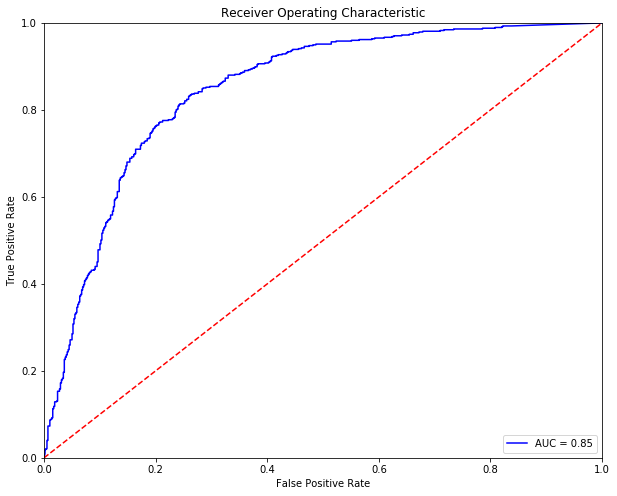

Optimal Threshold is 0.479855369435
Accuracy on test data is: 0.776429809359


Predicted  0.0  1.0  __all__
Actual                      
0.0        450  129      579
1.0        129  446      575
__all__    579  575     1154

In [379]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [380]:
table_70_50_PCA_0_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [381]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.7        50  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1

Accuracy of the  Logistic  model for the training data is: 0.752971768202

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1019   325     1344
1           340  1008     1348
__all__    1359  1333     2692

Accuracy of the  Logistic  model for test data is: 0.777296360485

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          459  120      579
1          137  438      575
__all__    596  558     1154

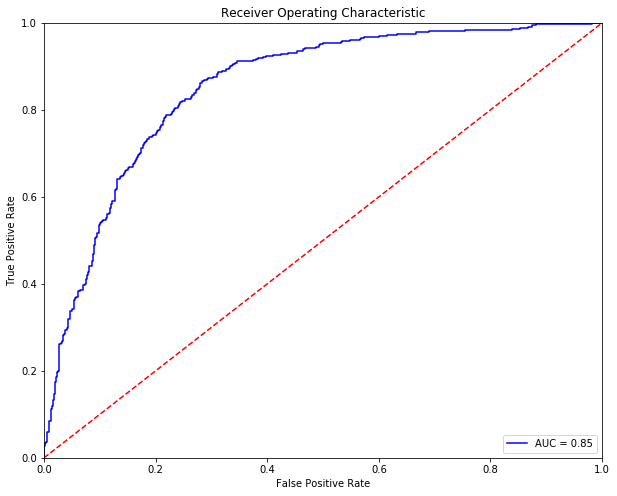

Optimal Threshold is 0.487985879903
Accuracy on test data is: 0.783362218371


Predicted  0.0  1.0  __all__
Actual                      
0.0        454  125      579
1.0        125  450      575
__all__    579  575     1154

In [382]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [383]:
table_70_50_PCA_0_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [384]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0        entropy         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           200      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.761887072808

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           927   417     1344
1           224  1124     1348
__all__    1151  1541     2692

Accuracy of the  Random Forest Trees  model for test data is: 0.78856152513

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          418  161      579
1           83  492      575
__all__    501  653     1154

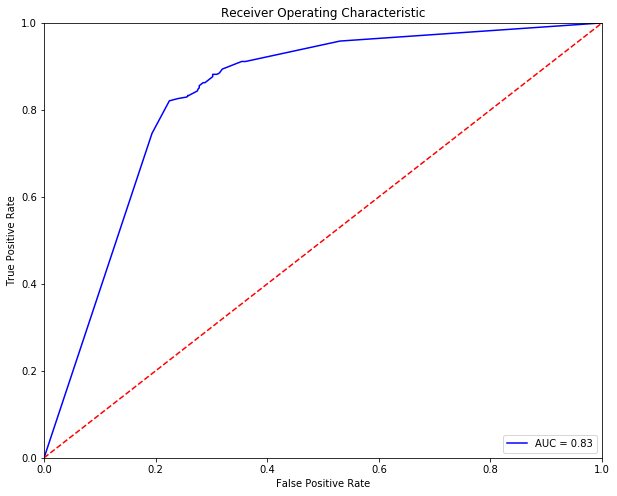

Optimal Threshold is 0.543780606884
Accuracy on test data is: 0.776429809359


Predicted  0.0  1.0  __all__
Actual                      
0.0        467  112      579
1.0        146  429      575
__all__    613  541     1154

In [385]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [386]:
table_70_50_PCA_0_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

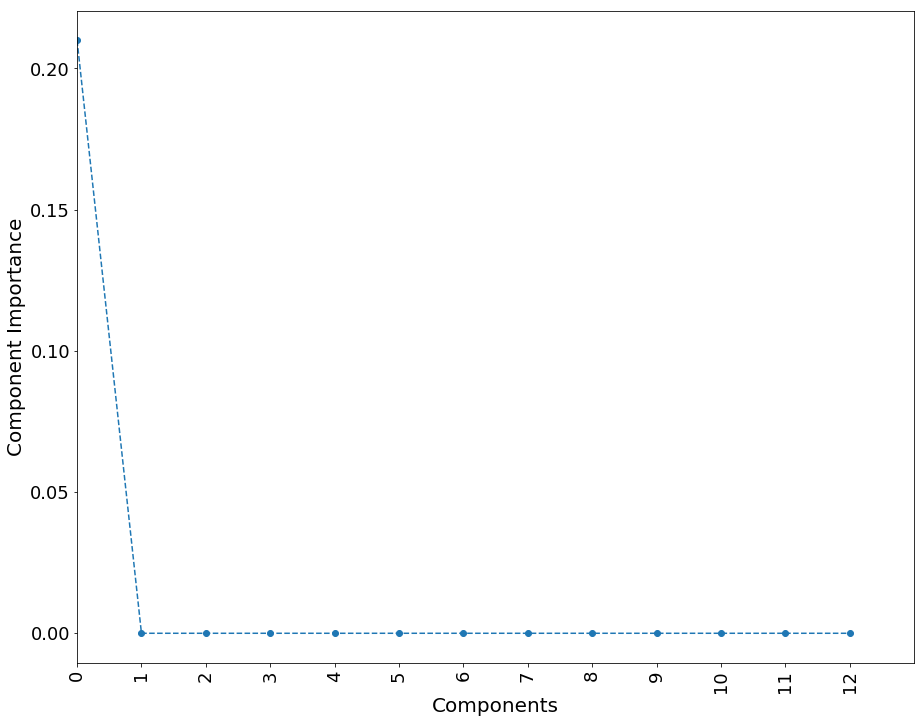

In [387]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [388]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.761887072808

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           916   428     1344
1           213  1135     1348
__all__    1129  1563     2692

Accuracy of the  AdaBoostClassifier  model for test data is: 0.787694974003

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          413  166      579
1           79  496      575
__all__    492  662     1154

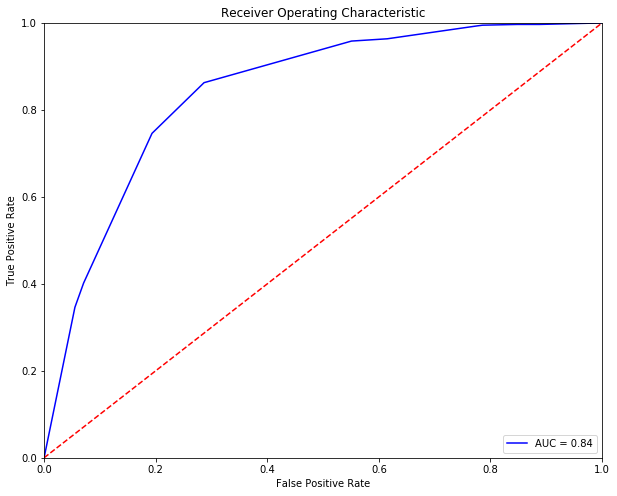

Optimal Threshold is 0.52584859557
Accuracy on test data is: 0.666377816291


Predicted  0.0  1.0  __all__
Actual                      
0.0        538   41      579
1.0        344  231      575
__all__    882  272     1154

In [389]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [390]:
table_70_50_PCA_0_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

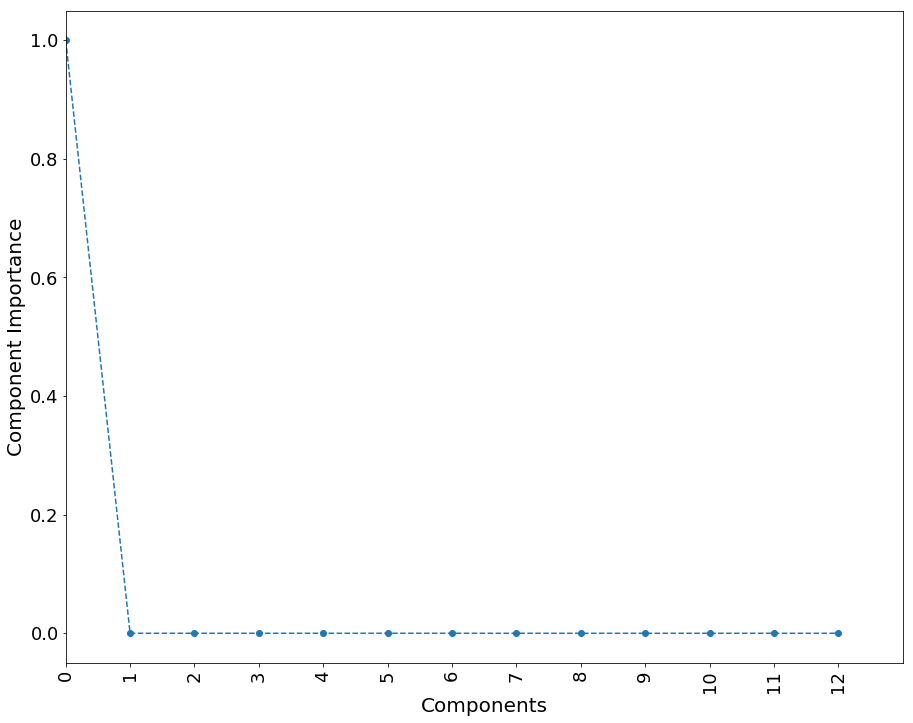

In [391]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [392]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse            0.1  exponential                20   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.1            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.787890044577

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1015   329     1344
1           242  1106     1348
__all__    1257  1435     2692

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.792027729636

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          444  135      579
1          105  470      575
__all__    549  605     1154

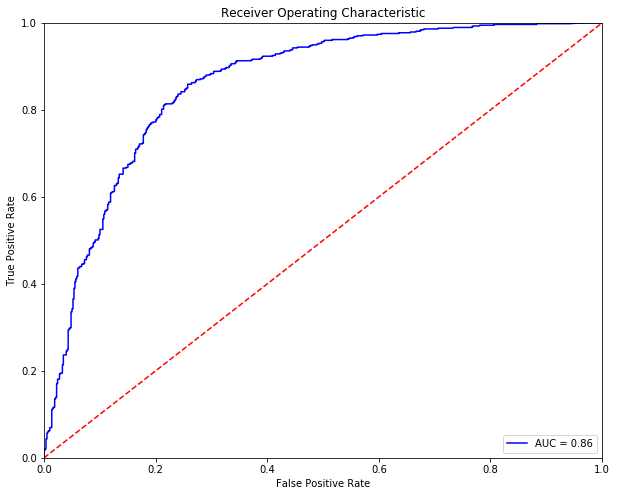

Optimal Threshold is 0.547146873184
Accuracy on test data is: 0.790294627383


Predicted  0.0  1.0  __all__
Actual                      
0.0        458  121      579
1.0        121  454      575
__all__    579  575     1154

In [393]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [394]:
table_70_50_PCA_0_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

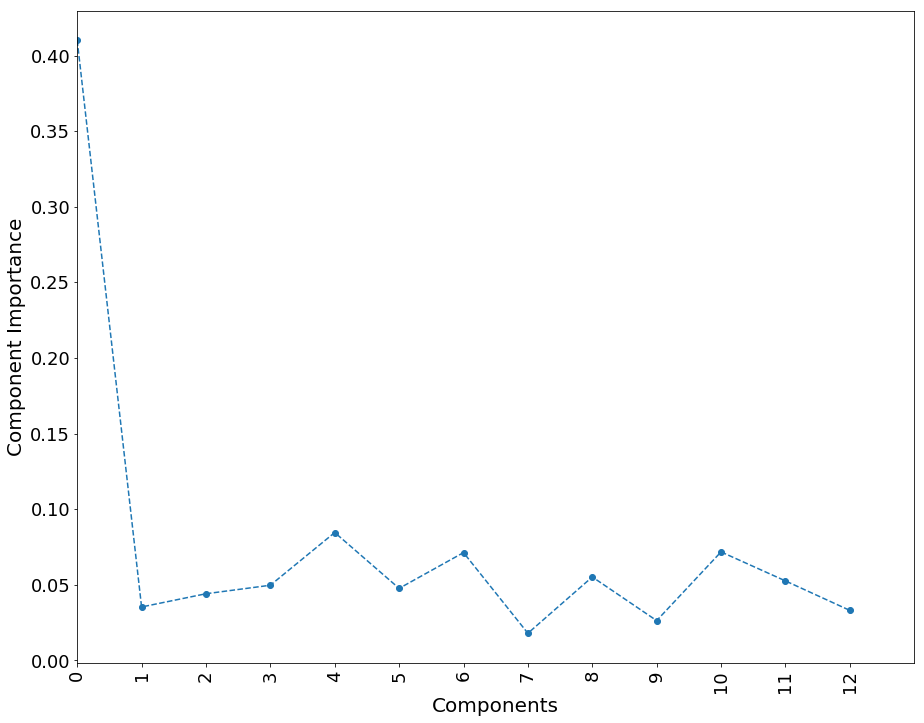

In [395]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [396]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.788261515602

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           967   377     1344
1           193  1155     1348
__all__    1160  1532     2692

Accuracy of the  Extra Decision Tree  model for test data is: 0.766031195841

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          406  173      579
1           97  478      575
__all__    503  651     1154

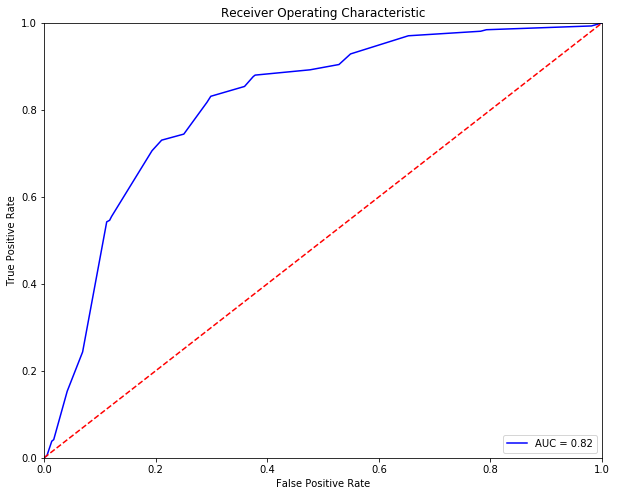

Optimal Threshold is 0.565217391304
Accuracy on test data is: 0.759965337955


Predicted  0.0  1.0  __all__
Actual                      
0.0        457  122      579
1.0        155  420      575
__all__    612  542     1154

In [397]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [398]:
table_70_50_PCA_0_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [399]:
%%capture
table_70_50_PCA_0_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

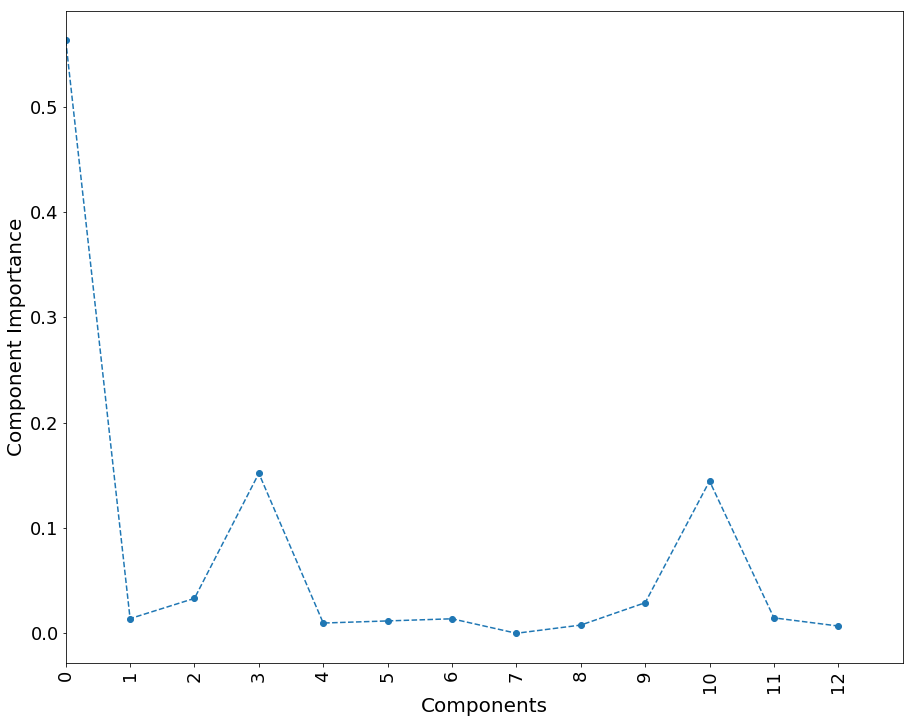

In [400]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [401]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           300   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.911218424963

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1195   149     1344
1            90  1258     1348
__all__    1285  1407     2692

Accuracy of the  Bagging  model for test data is: 0.799826689775

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          424  155      579
1           76  499      575
__all__    500  654     1154

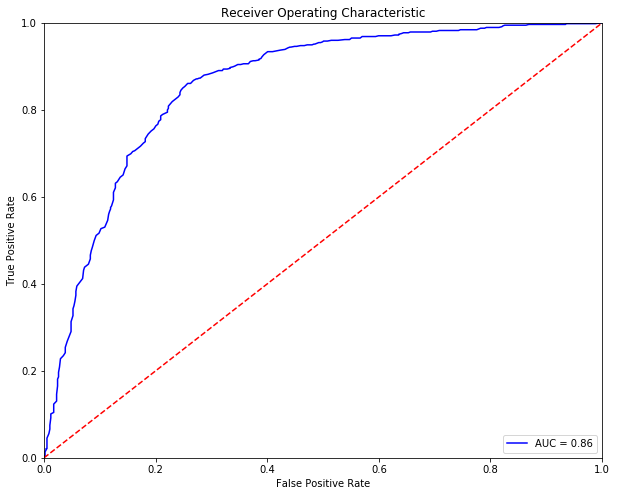

Optimal Threshold is 0.56
Accuracy on test data is: 0.78856152513


Predicted  0.0  1.0  __all__
Actual                      
0.0        458  121      579
1.0        123  452      575
__all__    581  573     1154

In [402]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [403]:
table_70_50_PCA_0_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [404]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.939450222883


Predicted     0     1  __all__
Actual                        
0          1256    88     1344
1            75  1273     1348
__all__    1331  1361     2692

The test accuracy is: 0.777296360485


Predicted    0    1  __all__
Actual                      
0          430  149      579
1          108  467      575
__all__    538  616     1154

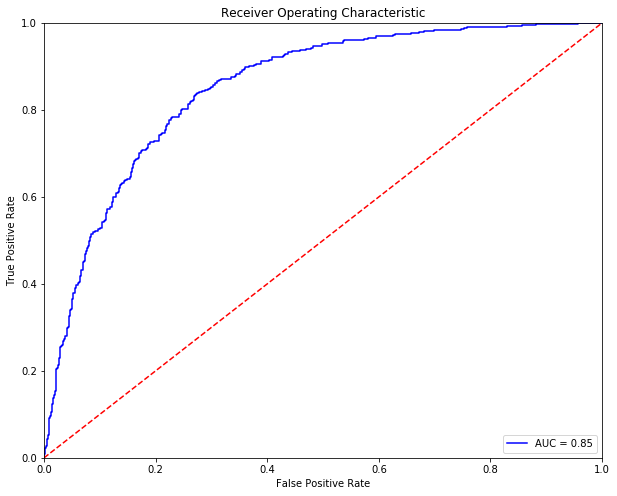

Optimal Threshold is 0.525343002948
Accuracy on test data is: 0.774696707106


Predicted  0.0  1.0  __all__
Actual                      
0.0        449  130      579
1.0        130  445      575
__all__    579  575     1154

In [405]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [406]:
table_70_50_PCA_0_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [407]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.84955423477


Predicted     0     1  __all__
Actual                        
0          1091   253     1344
1           152  1196     1348
__all__    1243  1449     2692

The accuracy of the model on test data is: 0.762564991334


Predicted    0    1  __all__
Actual                      
0          418  161      579
1          113  462      575
__all__    531  623     1154

 704/1154 [=================>............] - ETA: 0s

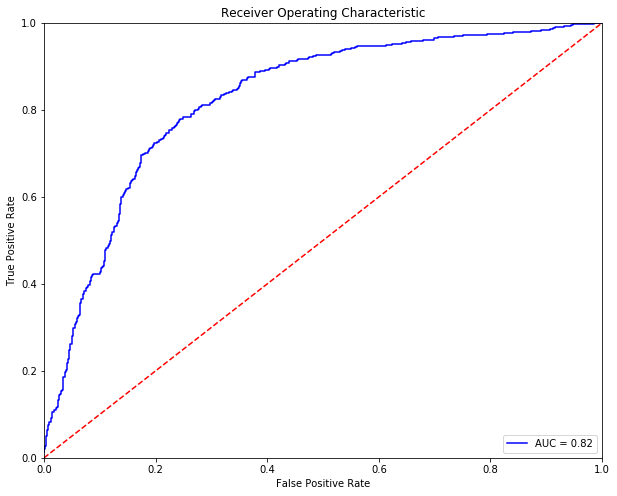

Optimal Threshold is 0.561288
Accuracy of Logistic Model on training data is: 0.764298093588


Predicted  0.0  1.0  __all__
Actual                      
0.0        443  136      579
1.0        136  439      575
__all__    579  575     1154

In [408]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [409]:
table_70_50_PCA_0_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [410]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.8min finished


The accuracy of the model on training data is: 0.789004457652


Predicted     0     1  __all__
Actual                        
0           976   368     1344
1           200  1148     1348
__all__    1176  1516     2692

The accuracy of the model on test data is: 0.782495667244


Predicted    0    1  __all__
Actual                      
0          419  160      579
1           91  484      575
__all__    510  644     1154

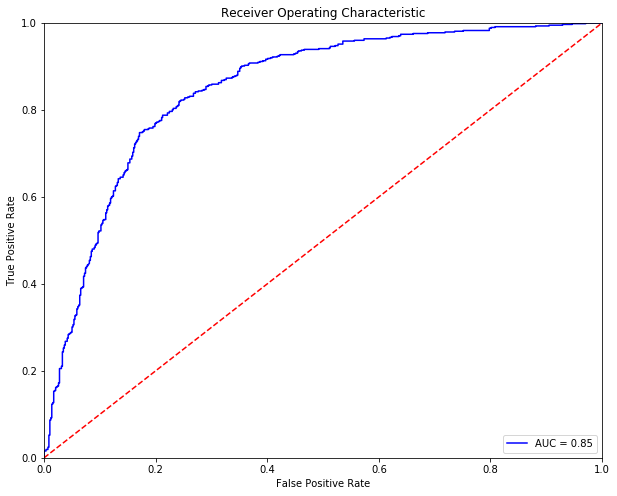

Optimal Threshold is 0.615961
Accuracy on test data is: 0.786828422877


Predicted  0.0  1.0  __all__
Actual                      
0.0        456  123      579
1.0        123  452      575
__all__    579  575     1154

In [411]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [412]:
table_70_50_PCA_0_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_0_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_0_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [413]:
table_70_50_PCA_0_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_0_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_0_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_0_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_0_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_0_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_0_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_0_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_0_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1348.0  1344.0    0.0    0.0  0.000000   
LogisticRegression          0.752972  1008.0  1019.0  325.0  340.0  0.241815   
RandomForestClassifier      0.761887  1124.0   927.0  417.0  224.0  0.310268   
AdaBoostClassifier          0.761887  1135.0   916.0  428.0  213.0  0.318452   
GradientBoostingClassifier  0.787890  1106.0  1015.0  329.0  242.0  0.244792   
ExtraTreeClassifier         0.788262  1155.0   967.0  377.0  193.0  0.280506   
BaggingClassifier           0.911218  1258.0  1195.0  149.0   90.0  0.110863   
VotingClassifier            0.939450  1273.0  1256.0   88.0   75.0  0.065476   
Neural Network-1            0.849554  1196.0  1091.0  253.0  152.0  0.188244   
Neural-Network-2            0.789004  1148.0   976.0  368.0  200.0  0.273810   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.252226  
RandomForestClassifier      0.166172  
AdaBoostClassifier          0.158012  
GradientBoostingClassifier  0.179525  
ExtraTreeClassifier         0.143175  
BaggingClassifier           0.066766  
VotingClassifier            0.055638  
Neural Network-1            0.112760  
Neural-Network-2            0.148368

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.780763  439.0  462.0  117.0  136.0  0.202073   
LogisticRegression          0.777296  438.0  459.0  120.0  137.0  0.207254   
RandomForestClassifier      0.788562  492.0  418.0  161.0   83.0  0.278066   
AdaBoostClassifier          0.787695  496.0  413.0  166.0   79.0  0.286701   
GradientBoostingClassifier  0.792028  470.0  444.0  135.0  105.0  0.233161   
ExtraTreeClassifier         0.766031  478.0  406.0  173.0   97.0  0.298791   
BaggingClassifier           0.799827  499.0  424.0  155.0   76.0  0.267703   
VotingClassifier            0.777296  467.0  430.0  149.0  108.0  0.257340   
Neural Network-1            0.762565  462.0  418.0  161.0  113.0  0.278066   
Neural-Network-2            0.782496  484.0  419.0  160.0   91.0  0.276339   

                                 FNR  
index                                 
KNeighborsClassifier        0.236522  
LogisticRegression          0.238261  
RandomForestClassifier      0.144348  
AdaBoostClassifier          0.137391  
GradientBoostingClassifier  0.182609  
ExtraTreeClassifier         0.168696  
BaggingClassifier           0.132174  
VotingClassifier            0.187826  
Neural Network-1            0.196522  
Neural-Network-2            0.158261

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.776430  446.0  450.0  129.0  129.0  0.222798   
LogisticRegression          0.783362  450.0  454.0  125.0  125.0  0.215889   
RandomForestClassifier      0.776430  429.0  467.0  112.0  146.0  0.193437   
AdaBoostClassifier          0.666378  231.0  538.0   41.0  344.0  0.070812   
GradientBoostingClassifier  0.790295  454.0  458.0  121.0  121.0  0.208981   
ExtraTreeClassifier         0.759965  420.0  457.0  122.0  155.0  0.210708   
BaggingClassifier           0.788562  452.0  458.0  121.0  123.0  0.208981   
VotingClassifier            0.774697  445.0  449.0  130.0  130.0  0.224525   
Neural Network-1            0.764298  439.0  443.0  136.0  136.0  0.234888   
Neural-Network-2            0.786828  452.0  456.0  123.0  123.0  0.212435   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.224348   0.479855  0.846359  
LogisticRegression          0.217391   0.487986  0.852195  
RandomForestClassifier      0.253913   0.543781  0.832887  
AdaBoostClassifier          0.598261   0.525849  0.843741  
GradientBoostingClassifier  0.210435   0.547147  0.859458  
ExtraTreeClassifier         0.269565   0.565217  0.815565  
BaggingClassifier           0.213913   0.560000  0.856863  
VotingClassifier            0.226087   0.525343  0.850225  
Neural Network-1            0.236522   0.561288  0.824050  
Neural-Network-2            0.213913   0.615961  0.849676

#### Random State 10

In [414]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_10.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  2984  216.771448   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   264   25.242424   

                                                          PAS        LEN  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  74.177949  82.084115   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  35.803030  69.193182   

                                                             BYS  \
Source_User                                                        
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   9038.178284   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  30610.265152   

                                                              BYR      SP  \
Source_User                                                                 
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  286763.437332  2689.0   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   11302.988636   263.0   

                                                      DP  NAPP  SIP  DIP  \
Source_User                                                                
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...  13.0    45   19  784   
7d72b802c8934804b499a7b417a31857b112353b42885b2...   7.0    19   36   97   

                                                            TDIF  0000  0100  \
Source_User                                                                    
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   1642.074397   265   188   
7d72b802c8934804b499a7b417a31857b112353b42885b2...  17986.772727     0     5   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   248    39    82    43   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0    16     0     0   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   112    20    50    46   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0     6    51   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    89    81    80   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    45    11     8     9   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   105    70   200   116   
7d72b802c8934804b499a7b417a31857b112353b42885b2...    20     2     6    13   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   195   158   176   167   
7d72b802c8934804b499a7b417a31857b112353b42885b2...     4    42    18     8   

                                                    2200  2300  
Source_User                                                     
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5...   116   233  
7d72b802c8934804b499a7b417a31857b112353b42885b2...     0     0

1 -> Infected
0 -> Uninfected


Source_User
8c48feddaa03131d5816111a9aef28e9ecbe168bb9b32a5bed0d545a1327be88    1
7d72b802c8934804b499a7b417a31857b112353b42885b2290ff09aeef55bebf    0
c59c78cbcb78f0f7140cef977c9016a08b9d4d91bc5b2e537327b2ab2b791f95    1
8b4f22fd3269f43630ef23cc553c80f72740dcc05fec14b0caad367768ce21a4    1
caea0e5257613ba78f187ac0616758755573aa9b58006fb8a5b671496fc3e392    1
f7cbcf0d21066d971d1948c618f66de0188cb7326b8c198ddd66d18d7e4d91bd    1
d487fb3eaf4e620ba1acd93bfce4387f10e162062f03f15f813c62481bf0a518    1
60430a2cacf66446dae118e6f4b204221901dcd2f3a3faffee16848f2ae9d0ec    1
becf4f677fab6f341e04c1c6ef46ae9d5c90175660426fb33dbd7ed850aec06d    0
f0ae081c92bfcbd5f316ae0d19db53b6a9edfdfc687166f2a5b4e6eb60d9c9ed    1
Name: Target, dtype: int64

Variance explained using 13 components is: 0.902209458443
The train/test split ratio is 70:30


In [415]:
display(X_pca_13[0:1])

array([[ 0.24000256,  0.17166104, -0.29779177,  0.87141713, -0.0839201 ,
        -0.22320145,  0.07166746,  0.12943633, -0.46254866, -0.57128233,
         0.06970679,  0.29780827, -0.69246109]])

In [416]:
## Table to store training and test measures
table_70_50_PCA_10_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_10_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_10_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [417]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  euclidean           20  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1344     0     1344
1             0  1348     1348
__all__    1344  1348     2692

Accuracy of the  KNN  model for test data is: 0.773830155979

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          451  128      579
1          133  442      575
__all__    584  570     1154

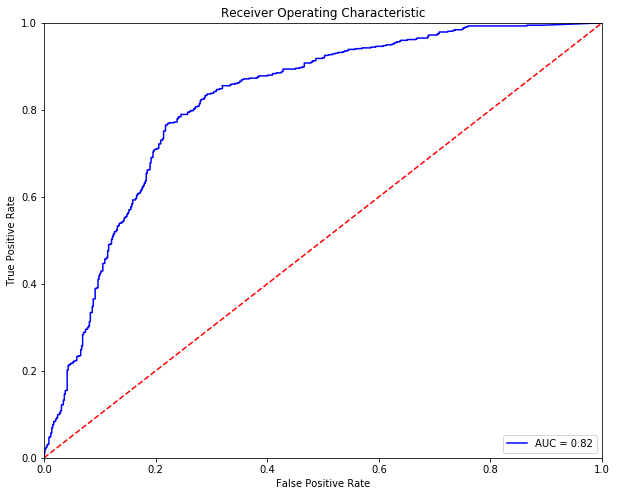

Optimal Threshold is 0.491784123642
Accuracy on test data is: 0.769497400347


Predicted  0.0  1.0  __all__
Actual                      
0.0        445  134      579
1.0        132  443      575
__all__    577  577     1154

In [418]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [419]:
table_70_50_PCA_10_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [420]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.7       100  multinomial   

             6       7      8  
index  penalty  solver    tol  
0           l2     sag  1e-05

Accuracy of the  Logistic  model for the training data is: 0.785661218425

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1065   279     1344
1           298  1050     1348
__all__    1363  1329     2692

Accuracy of the  Logistic  model for test data is: 0.7712305026

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          442  137      579
1          127  448      575
__all__    569  585     1154

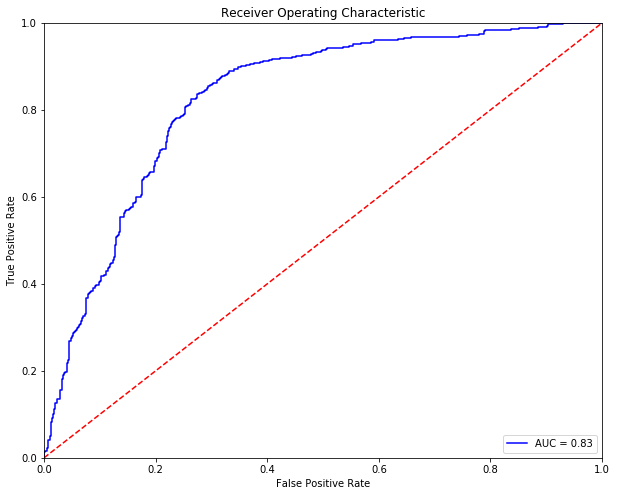

Optimal Threshold is 0.50694089555
Accuracy on test data is: 0.770363951473


Predicted  0.0  1.0  __all__
Actual                      
0.0        447  132      579
1.0        133  442      575
__all__    580  574     1154

In [421]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [422]:
table_70_50_PCA_10_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [423]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.784546805349

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1033   311     1344
1           269  1079     1348
__all__    1302  1390     2692

Accuracy of the  Random Forest Trees  model for test data is: 0.772097053726

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          431  148      579
1          115  460      575
__all__    546  608     1154

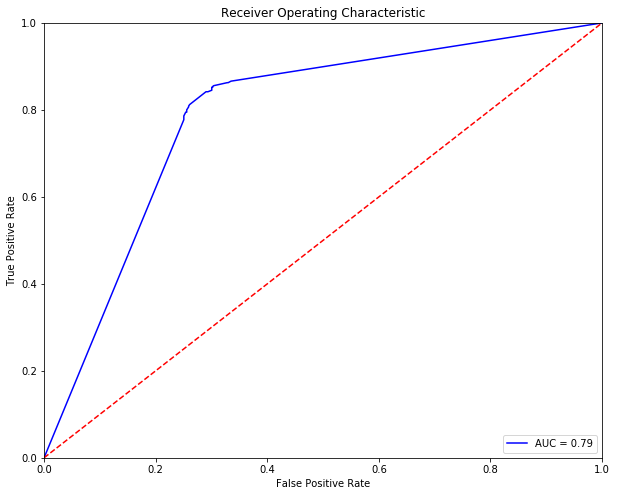

Optimal Threshold is 0.556915042066
Accuracy on test data is: 0.501733102253


Predicted   0.0  1.0  __all__
Actual                       
0.0         579    0      579
1.0         575    0      575
__all__    1154    0     1154

In [424]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [425]:
table_70_50_PCA_10_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

579
0
0
579
575
0
0
575
1.0
0.0
0.0
1.0


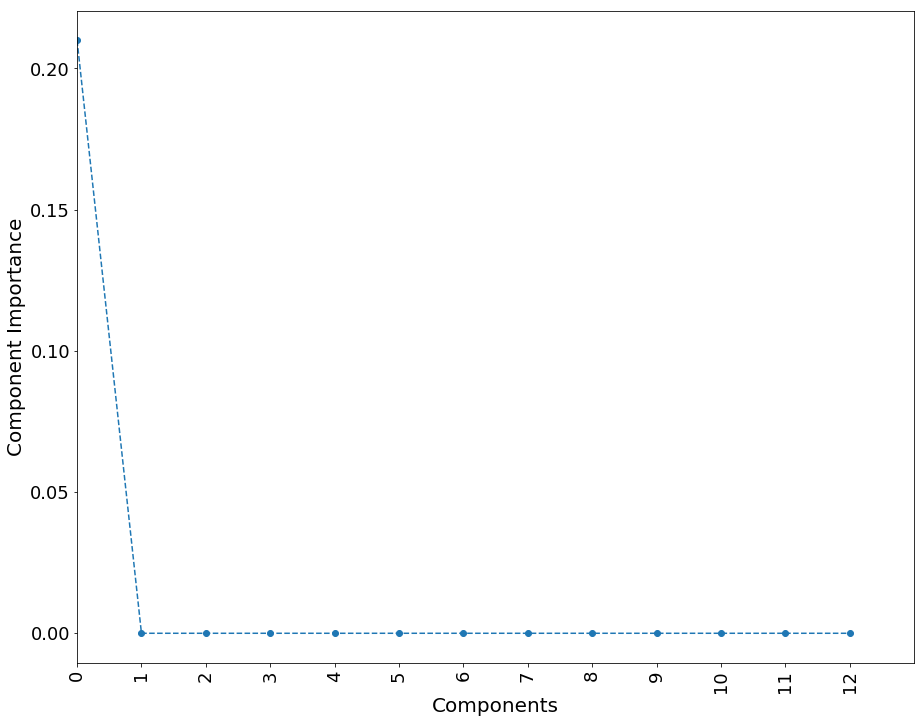

In [426]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [427]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           400             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.793833580981

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1041   303     1344
1           252  1096     1348
__all__    1293  1399     2692

Accuracy of the  AdaBoostClassifier  model for test data is: 0.773830155979

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          432  147      579
1          114  461      575
__all__    546  608     1154

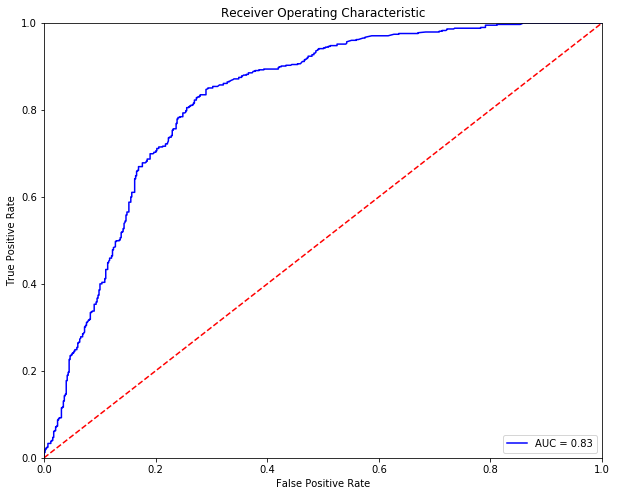

Optimal Threshold is 0.5104186477
Accuracy on test data is: 0.763431542461


Predicted  0.0  1.0  __all__
Actual                      
0.0        442  137      579
1.0        136  439      575
__all__    578  576     1154

In [428]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [429]:
table_70_50_PCA_10_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

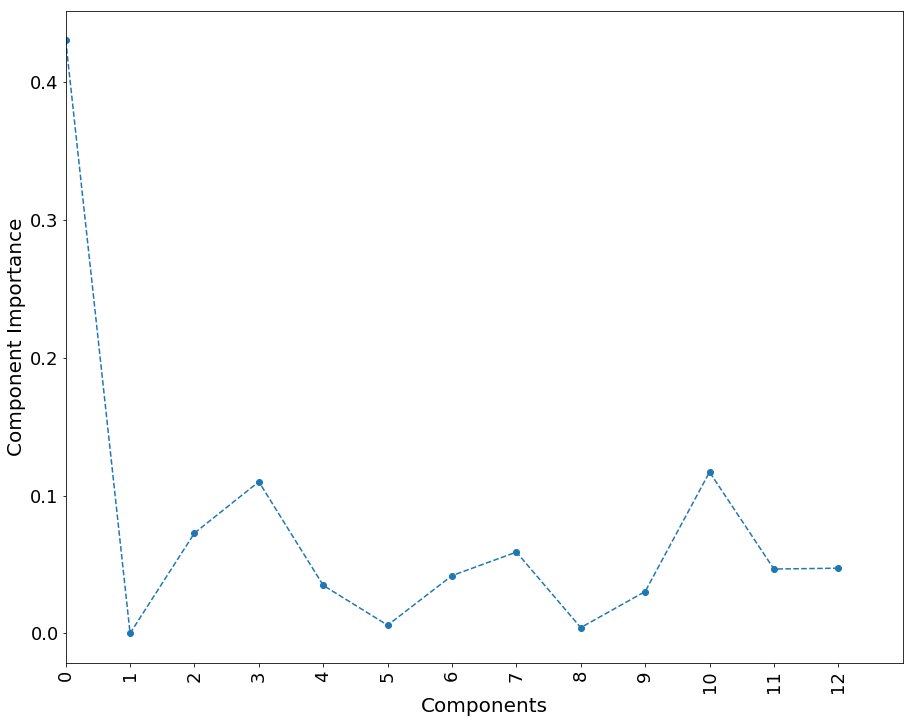

In [430]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [431]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse            0.2  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.3            50             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.807949479941

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1062   282     1344
1           235  1113     1348
__all__    1297  1395     2692

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.777296360485

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          427  152      579
1          105  470      575
__all__    532  622     1154

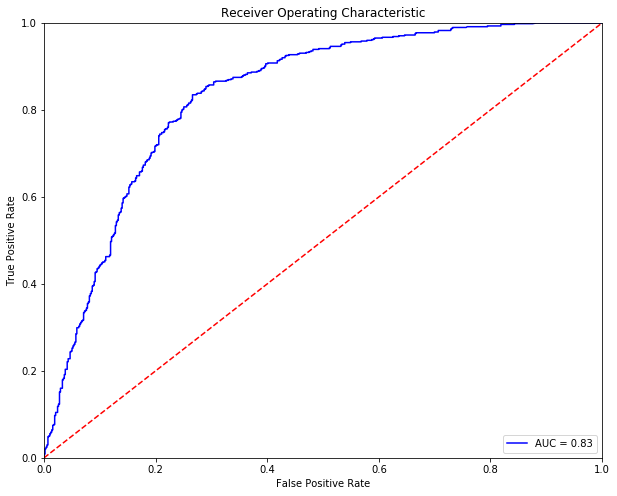

Optimal Threshold is 0.577386840713
Accuracy on test data is: 0.772963604853


Predicted  0.0  1.0  __all__
Actual                      
0.0        449  130      579
1.0        132  443      575
__all__    581  573     1154

In [432]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [433]:
table_70_50_PCA_10_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

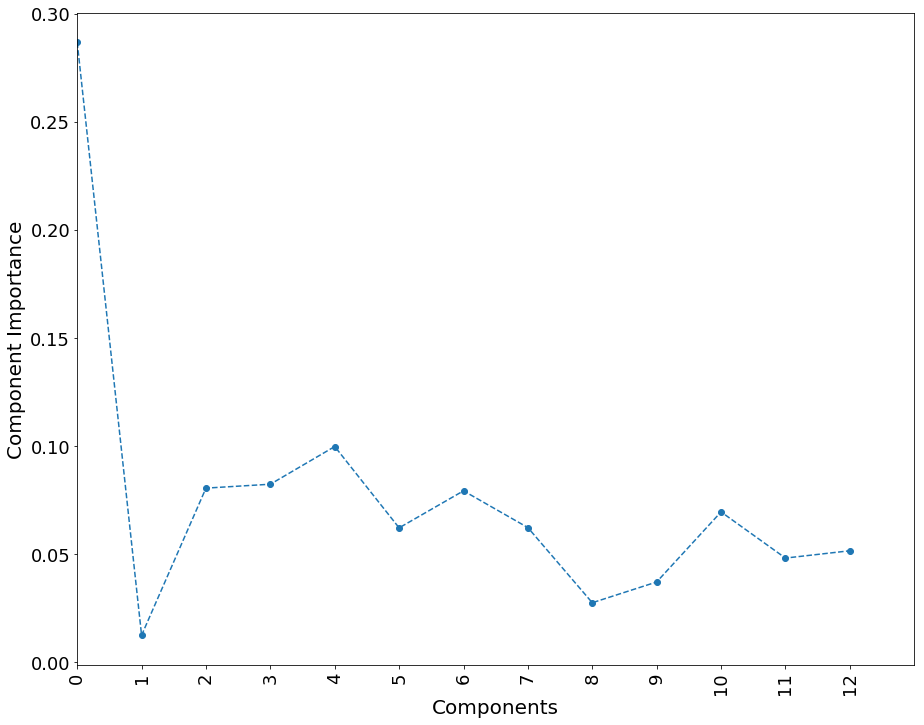

In [434]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [435]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.791976225854

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           962   382     1344
1           178  1170     1348
__all__    1140  1552     2692

Accuracy of the  Extra Decision Tree  model for test data is: 0.759098786828

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          386  193      579
1           85  490      575
__all__    471  683     1154

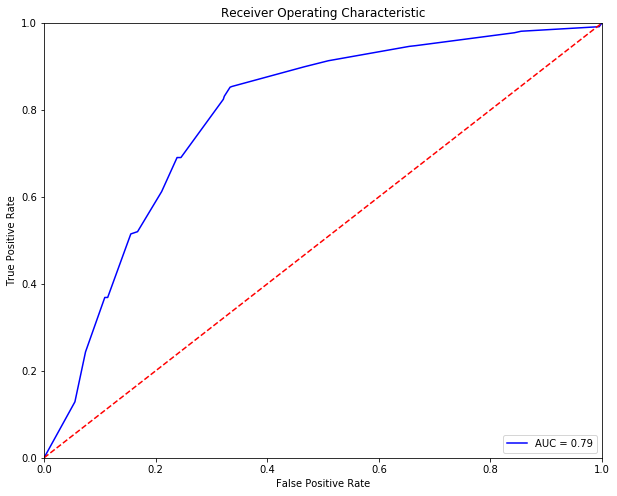

Optimal Threshold is 0.6
Accuracy on test data is: 0.726169844021


Predicted  0.0  1.0  __all__
Actual                      
0.0        441  138      579
1.0        178  397      575
__all__    619  535     1154

In [436]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [437]:
table_70_50_PCA_10_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [438]:
%%capture
table_70_50_PCA_10_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

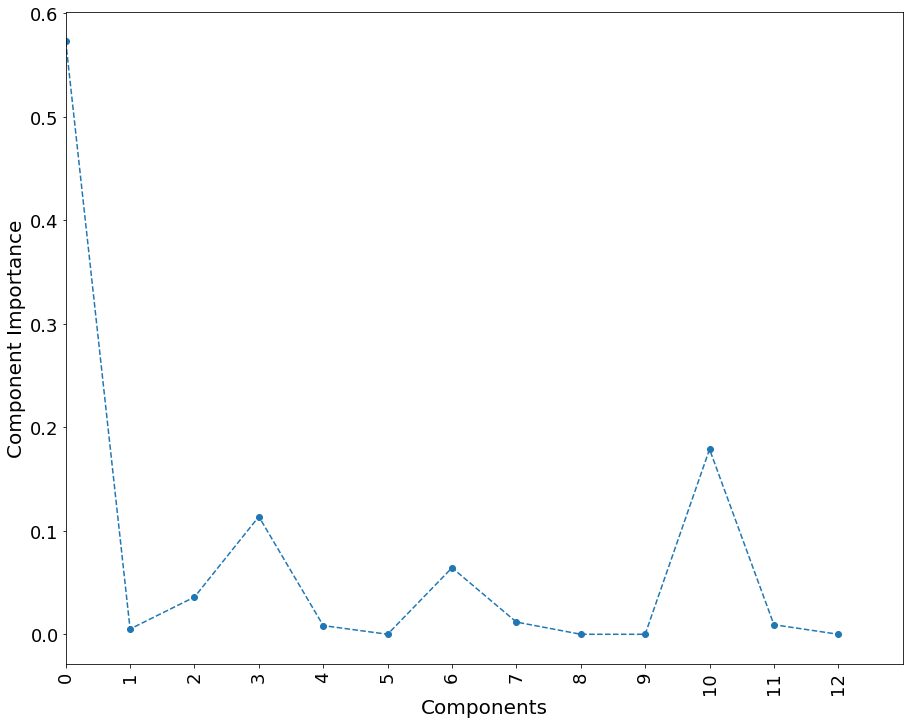

In [439]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [440]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.6          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.906389301634

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1187   157     1344
1            95  1253     1348
__all__    1282  1410     2692

Accuracy of the  Bagging  model for test data is: 0.772963604853

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          415  164      579
1           98  477      575
__all__    513  641     1154

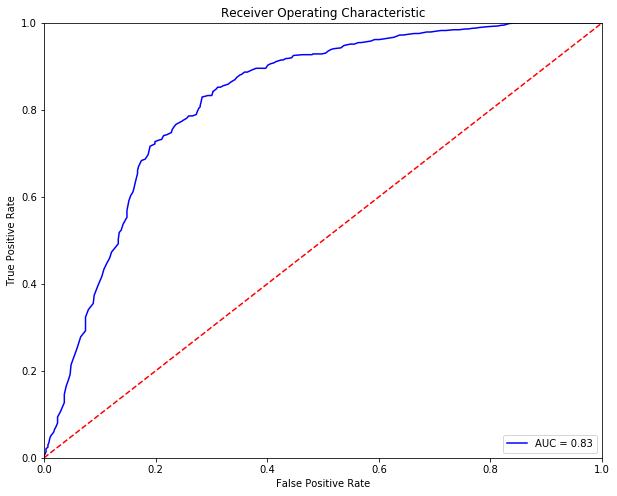

Optimal Threshold is 0.565
Accuracy on test data is: 0.764298093588


Predicted  0.0  1.0  __all__
Actual                      
0.0        444  135      579
1.0        137  438      575
__all__    581  573     1154

In [441]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [442]:
table_70_50_PCA_10_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [443]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.932020802377


Predicted     0     1  __all__
Actual                        
0          1238   106     1344
1            77  1271     1348
__all__    1315  1377     2692

The test accuracy is: 0.766897746967


Predicted    0    1  __all__
Actual                      
0          429  150      579
1          119  456      575
__all__    548  606     1154

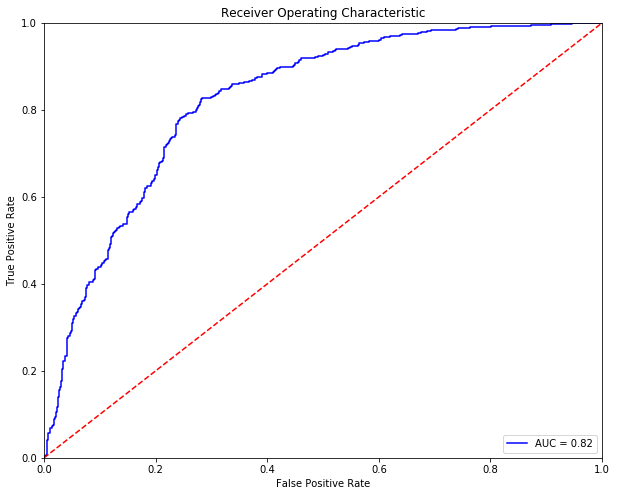

Optimal Threshold is 0.522988077127
Accuracy on test data is: 0.765164644714


Predicted  0.0  1.0  __all__
Actual                      
0.0        442  137      579
1.0        134  441      575
__all__    576  578     1154

In [444]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [445]:
table_70_50_PCA_10_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [446]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.84323922734


Predicted     0     1  __all__
Actual                        
0          1117   227     1344
1           195  1153     1348
__all__    1312  1380     2692

The accuracy of the model on test data is: 0.757365684575


Predicted    0    1  __all__
Actual                      
0          417  162      579
1          118  457      575
__all__    535  619     1154

 640/1154 [===============>..............] - ETA: 0s

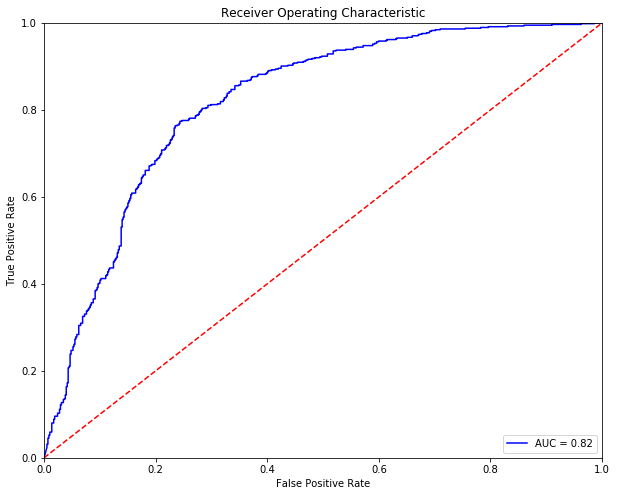

Optimal Threshold is 0.575579
Accuracy of Logistic Model on training data is: 0.763431542461


Predicted  0.0  1.0  __all__
Actual                      
0.0        443  136      579
1.0        137  438      575
__all__    580  574     1154

In [447]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [448]:
table_70_50_PCA_10_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [449]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.2min finished


The accuracy of the model on training data is: 0.790490341753


Predicted     0     1  __all__
Actual                        
0          1085   259     1344
1           305  1043     1348
__all__    1390  1302     2692

The accuracy of the model on test data is: 0.759098786828


Predicted    0    1  __all__
Actual                      
0          443  136      579
1          142  433      575
__all__    585  569     1154

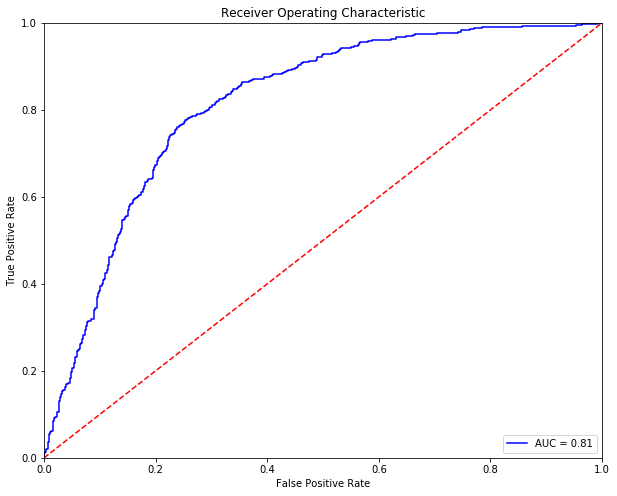

Optimal Threshold is 0.476937
Accuracy on test data is: 0.759965337955


Predicted  0.0  1.0  __all__
Actual                      
0.0        441  138      579
1.0        139  436      575
__all__    580  574     1154

In [450]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [451]:
table_70_50_PCA_10_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_10_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_10_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [452]:
table_70_50_PCA_10_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_10_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_10_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_10_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_10_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_10_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_10_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_10_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_10_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1348.0  1344.0    0.0    0.0  0.000000   
LogisticRegression          0.785661  1050.0  1065.0  279.0  298.0  0.207589   
RandomForestClassifier      0.784547  1079.0  1033.0  311.0  269.0  0.231399   
AdaBoostClassifier          0.793834  1096.0  1041.0  303.0  252.0  0.225446   
GradientBoostingClassifier  0.807949  1113.0  1062.0  282.0  235.0  0.209821   
ExtraTreeClassifier         0.791976  1170.0   962.0  382.0  178.0  0.284226   
BaggingClassifier           0.906389  1253.0  1187.0  157.0   95.0  0.116815   
VotingClassifier            0.932021  1271.0  1238.0  106.0   77.0  0.078869   
Neural Network-1            0.843239  1153.0  1117.0  227.0  195.0  0.168899   
Neural-Network-2            0.790490  1043.0  1085.0  259.0  305.0  0.192708   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.221068  
RandomForestClassifier      0.199555  
AdaBoostClassifier          0.186944  
GradientBoostingClassifier  0.174332  
ExtraTreeClassifier         0.132047  
BaggingClassifier           0.070475  
VotingClassifier            0.057122  
Neural Network-1            0.144659  
Neural-Network-2            0.226261

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.773830  442.0  451.0  128.0  133.0  0.221071   
LogisticRegression          0.771231  448.0  442.0  137.0  127.0  0.236615   
RandomForestClassifier      0.772097  460.0  431.0  148.0  115.0  0.255613   
AdaBoostClassifier          0.773830  461.0  432.0  147.0  114.0  0.253886   
GradientBoostingClassifier  0.777296  470.0  427.0  152.0  105.0  0.262522   
ExtraTreeClassifier         0.759099  490.0  386.0  193.0   85.0  0.333333   
BaggingClassifier           0.772964  477.0  415.0  164.0   98.0  0.283247   
VotingClassifier            0.766898  456.0  429.0  150.0  119.0  0.259067   
Neural Network-1            0.757366  457.0  417.0  162.0  118.0  0.279793   
Neural-Network-2            0.759099  433.0  443.0  136.0  142.0  0.234888   

                                 FNR  
index                                 
KNeighborsClassifier        0.231304  
LogisticRegression          0.220870  
RandomForestClassifier      0.200000  
AdaBoostClassifier          0.198261  
GradientBoostingClassifier  0.182609  
ExtraTreeClassifier         0.147826  
BaggingClassifier           0.170435  
VotingClassifier            0.206957  
Neural Network-1            0.205217  
Neural-Network-2            0.246957

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy          TP          TN          FP  \
index                                                                      
KNeighborsClassifier        0.769497  443.000000  445.000000  134.000000   
LogisticRegression          0.770364  442.000000  447.000000  132.000000   
RandomForestClassifier      0.501733  290.503466  288.496534  288.496534   
AdaBoostClassifier          0.763432  439.000000  442.000000  137.000000   
GradientBoostingClassifier  0.772964  443.000000  449.000000  130.000000   
ExtraTreeClassifier         0.726170  397.000000  441.000000  138.000000   
BaggingClassifier           0.764298  438.000000  444.000000  135.000000   
VotingClassifier            0.765165  441.000000  442.000000  137.000000   
Neural Network-1            0.763432  438.000000  443.000000  136.000000   
Neural-Network-2            0.759965  436.000000  441.000000  138.000000   

                                    FN       FPR       FNR  threshold  \
index                                                                   
KNeighborsClassifier        132.000000  0.231434  0.229565   0.491784   
LogisticRegression          133.000000  0.227979  0.231304   0.506941   
RandomForestClassifier      286.503466  0.501733  0.498267   0.556915   
AdaBoostClassifier          136.000000  0.236615  0.236522   0.510419   
GradientBoostingClassifier  132.000000  0.224525  0.229565   0.577387   
ExtraTreeClassifier         178.000000  0.238342  0.309565   0.600000   
BaggingClassifier           137.000000  0.233161  0.238261   0.565000   
VotingClassifier            134.000000  0.236615  0.233043   0.522988   
Neural Network-1            137.000000  0.234888  0.238261   0.575579   
Neural-Network-2            139.000000  0.238342  0.241739   0.476937   

                                 auc  
index                                 
KNeighborsClassifier        0.818615  
LogisticRegression          0.826351  
RandomForestClassifier      0.788742  
AdaBoostClassifier          0.825306  
GradientBoostingClassifier  0.833829  
ExtraTreeClassifier         0.785501  
BaggingClassifier           0.825946  
VotingClassifier            0.824123  
Neural Network-1            0.817668  
Neural-Network-2            0.813592

#### Random State 20

In [453]:
## Read the csv file which contains the data aggregated on user level 
z=pd.read_csv('Feature_Vector_50_50_3_17_random_state_20.csv',index_col='Source_User')

z.columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','Target','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]


columns=['NREC','PAR','PAS','LEN','BYS','BYR','SP','DP','NAPP','SIP','DIP','TDIF',
    '0000','0100','0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200',
    '1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300'
]

print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())

X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

pca=PCA(n_components=13,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 13 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


uninfected    1923
infected      1923
Name: Target, dtype: int64

NREC         PAR  \
Source_User                                                            
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  3475  119.307626   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   558   31.100358   

                                                          PAS         LEN  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  60.322302   94.924029   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  18.324373  120.193548   

                                                            BYS  \
Source_User                                                       
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  6983.720863   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  2986.801075   

                                                              BYR      SP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  151221.195108  3079.0   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...   31418.557348   555.0   

                                                       DP  NAPP  SIP  DIP  \
Source_User                                                                 
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  106.0    54   74  911   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    5.0    25   53  227   

                                                           TDIF  0000  0100  \
Source_User                                                                   
16414beb68334398f2f4d732aafedc2bf231b27b8507879...  1409.110216   419   383   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...  8542.105735    13    44   

                                                    0200  0300  0400  0500  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   267   141    95    48   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     2     6     5     3   

                                                    0600  0700  0800  0900  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    31    11    30    33   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     4     1     0     8   

                                                    1000  1100  1200  1300  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    39    68   187    89   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    25    35    44    67   

                                                    1400  1500  1600  1700  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...    79   110    56   187   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    94    27    18    19   

                                                    1800  1900  2000  2100  \
Source_User                                                                  
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   161   174   303   126   
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...    30    32    40    32   

                                                    2200  2300  
Source_User                                                     
16414beb68334398f2f4d732aafedc2bf231b27b8507879...   303   135  
afbe75a93f02da27be2a836bef717ffeef19714de5a1f21...     6     3

1 -> Infected
0 -> Uninfected


Source_User
16414beb68334398f2f4d732aafedc2bf231b27b8507879ba41e0c18baec3847    1
afbe75a93f02da27be2a836bef717ffeef19714de5a1f2121d5a93fe043e70f1    1
28f9fffb669c004731f11c34913ce913981fd3534ea37ce2bb0e9b942091ff57    0
c966f4446da082203a9bfc84af2a2db29baa017722ac03471cf412932a6c0e90    1
b938ef4078ace510c6696a63e7ee215b9443b59f0d5c7a5f3d79bc1a672c0ca8    1
c1d72e5d7b7f24020163240ecbb1e648745a058b5f18c44f1cf8ceea6be1dc8b    1
8b76ca850d1587f46c2740a3dc662f9730d183fc173a25c6c7fcae215adde149    1
1b93b31e3d3282a98216531e95ddd1400a7728383f6f348ce19b05d873a6122a    1
f0629dde75324f00bdd60ba5ff96dd8f198c45117c089691e44c6c0e871d5947    1
bb235609630753fadf401ecbf9b9c323c35273de648930ce0b76cbd128c882fe    0
Name: Target, dtype: int64

Variance explained using 13 components is: 0.980948185529
The train/test split ratio is 70:30


In [454]:
display(X_pca_13[0:1])

array([[ 0.2007779 , -1.07935185,  0.10382907, -0.37493318, -0.12497987,
        -0.01245315,  0.54386681, -0.36568038, -0.42133199,  1.34995611,
         0.05528869, -1.94489183,  0.50926882]])

In [455]:
## Table to store training and test measures
table_70_50_PCA_20_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_20_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_PCA_20_test_roc=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','threshold','auc'])

#### KNN

In [456]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30,50],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],metric=['euclidean','manhattan','chebyshev'])
knn_model,cm_train,cm_test,acc_train,acc_test =grid_acc(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           30  distance

Accuracy of the  KNN  model for the training data is: 1.0

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1350     0     1350
1             0  1342     1342
__all__    1350  1342     2692

Accuracy of the  KNN  model for test data is: 0.773830155979

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          436  137      573
1          124  457      581
__all__    560  594     1154

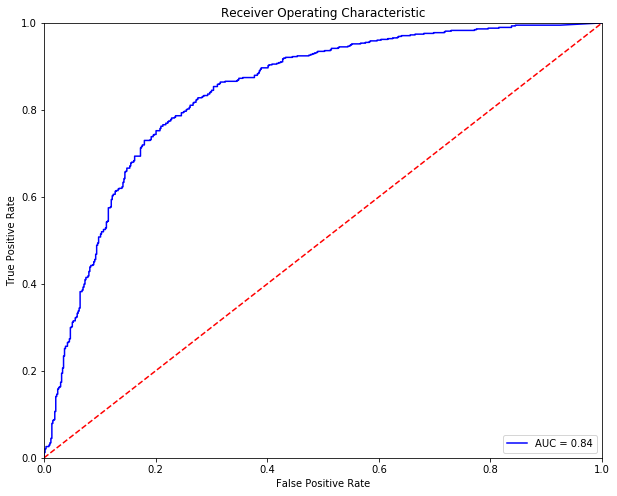

Optimal Threshold is 0.520667009123
Accuracy on test data is: 0.774696707106


Predicted  0.0  1.0  __all__
Actual                      
0.0        444  129      573
1.0        131  450      581
__all__    575  579     1154

In [457]:
cm,accuracy,threshold,roc_auc=get_roc_curve(knn_model,X_test,Y_test)

In [458]:
table_70_50_PCA_20_train.loc[0]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[0] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[0]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Logistic

In [459]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model,cm_train,cm_test,acc_train,acc_test=grid_acc(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5        50  multinomial   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05

Accuracy of the  Logistic  model for the training data is: 0.77117384844

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1033   317     1350
1           299  1043     1342
__all__    1332  1360     2692

Accuracy of the  Logistic  model for test data is: 0.769497400347

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          433  140      573
1          126  455      581
__all__    559  595     1154

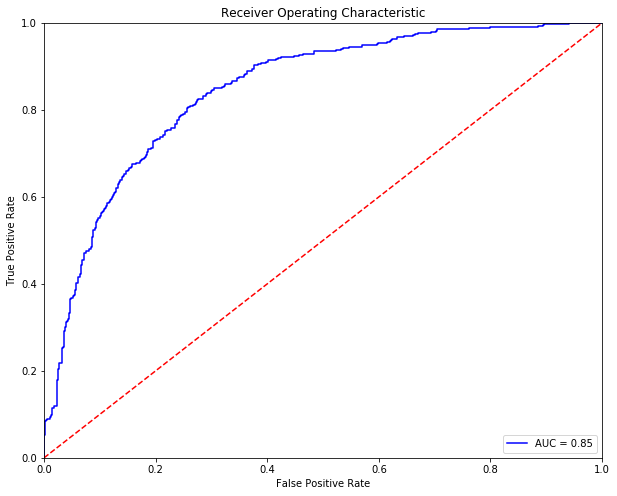

Optimal Threshold is 0.50822152972
Accuracy on test data is: 0.766031195841


Predicted  0.0  1.0  __all__
Actual                      
0.0        439  134      573
1.0        136  445      581
__all__    575  579     1154

In [460]:
cm,accuracy,threshold,roc_auc=get_roc_curve(log_model,X_test,Y_test)

In [461]:
table_70_50_PCA_20_train.loc[1]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[1] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[1]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Random Forest Trees

In [462]:
rf=RandomForestClassifier()

parameters = dict(n_estimators=[200,300],criterion=['gini','entropy'],max_depth=[10],min_samples_split=[10],
                  min_samples_leaf=[10],min_weight_fraction_leaf=[0.1], max_features=['auto'],
                  max_leaf_nodes=[10],min_impurity_decrease=[0.1],oob_score=[False],
                  random_state=[0],verbose=[0])
rf_model,cm_train,cm_test,acc_train,acc_test=grid_acc(rf,parameters,X_train,Y_train,X_test,Y_test,"Random Forest Trees")

Best Parameters are :


0          1             2               3   \
index  criterion  max_depth  max_features  max_leaf_nodes   
0           gini         10          auto              10   

                          4                 5                  6   \
index  min_impurity_decrease  min_samples_leaf  min_samples_split   
0                        0.1                10                 10   

                             7             8          9             10  \
index  min_weight_fraction_leaf  n_estimators  oob_score  random_state   
0                           0.1           300      False             0   

            11  
index  verbose  
0            0

Accuracy of the  Random Forest Trees  model for the training data is: 0.774145616642

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0           953   397     1350
1           211  1131     1342
__all__    1164  1528     2692

Accuracy of the  Random Forest Trees  model for test data is: 0.776429809359

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          403  170      573
1           88  493      581
__all__    491  663     1154

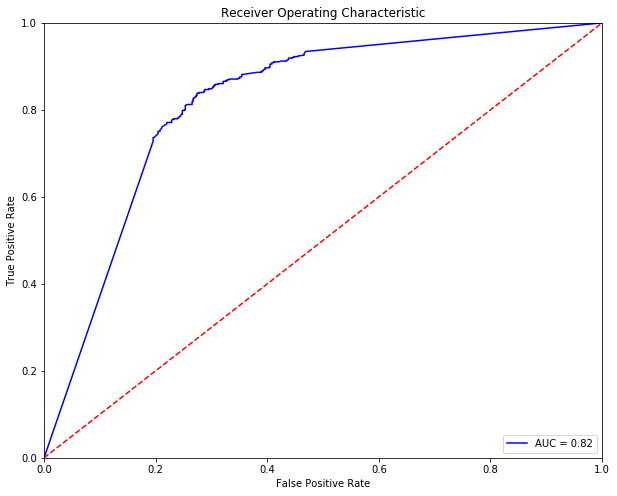

Optimal Threshold is 0.615222704063
Accuracy on test data is: 0.772963604853


Predicted  0.0  1.0  __all__
Actual                      
0.0        444  129      573
1.0        133  448      581
__all__    577  577     1154

In [463]:
cm,accuracy,threshold,roc_auc=get_roc_curve(rf_model,X_test,Y_test)

In [464]:
table_70_50_PCA_20_train.loc[2]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[2] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[2]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

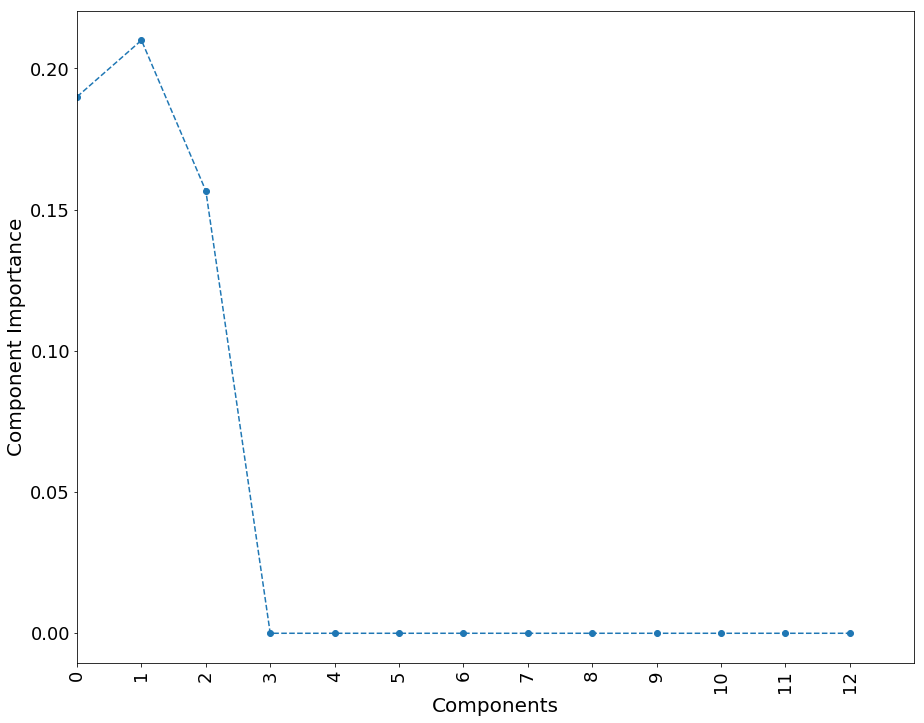

In [465]:
rf=RandomForestClassifier(**rf_model.best_params_)
rf.fit(X_train,Y_train)

fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoostClassifier

In [466]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,150,400],learning_rate=[0.5,1,1.5,5],algorithm=['SAMME','SAMME.R'],random_state=[0])
ada_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0

Accuracy of the  AdaBoostClassifier  model for the training data is: 0.790118870728

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1016   334     1350
1           231  1111     1342
__all__    1247  1445     2692

Accuracy of the  AdaBoostClassifier  model for test data is: 0.782495667244

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          423  150      573
1          101  480      581
__all__    524  630     1154

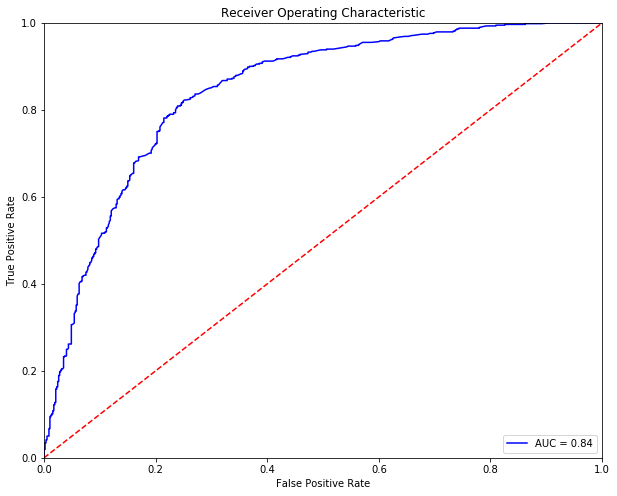

Optimal Threshold is 0.504071863295
Accuracy on test data is: 0.782495667244


Predicted  0.0  1.0  __all__
Actual                      
0.0        449  124      573
1.0        127  454      581
__all__    576  578     1154

In [467]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ada_model,X_test,Y_test)

In [468]:
table_70_50_PCA_20_train.loc[3]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[3] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[3]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

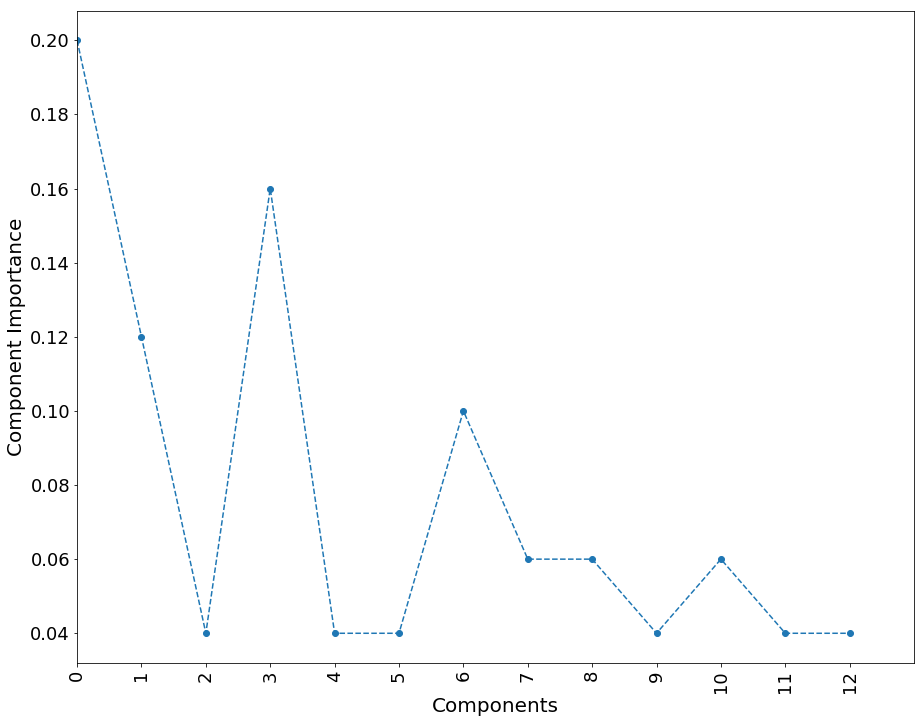

In [469]:
ada=AdaBoostClassifier(**ada_model.best_params_)
ada.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### GradientBoostingClassifier

In [470]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03,0.05,0.1,0.2],n_estimators=[50,100,150], criterion=['mse'],
                min_samples_split=[0.1,0.2,0.3],min_samples_leaf=[10,15,20,5],random_state=[0],subsample=[0.5,0.7,1])
gbc_model,cm_train,cm_test,acc_train,acc_test=grid_acc(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                10   

                       4             5             6          7  
index  min_samples_split  n_estimators  random_state  subsample  
0                    0.2           150             0        0.7

Accuracy of the  Gradient Boosting Classifier  model for the training data is: 0.796433878158

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1009   341     1350
1           207  1135     1342
__all__    1216  1476     2692

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.779896013865

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          417  156      573
1           98  483      581
__all__    515  639     1154

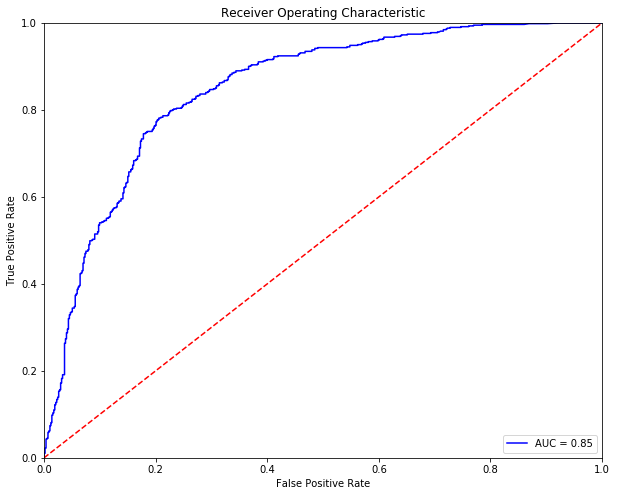

Optimal Threshold is 0.573797824472
Accuracy on test data is: 0.78596187175


Predicted  0.0  1.0  __all__
Actual                      
0.0        451  122      573
1.0        125  456      581
__all__    576  578     1154

In [471]:
cm,accuracy,threshold,roc_auc=get_roc_curve(gbc_model,X_test,Y_test)

In [472]:
table_70_50_PCA_20_train.loc[4]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[4] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[4]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

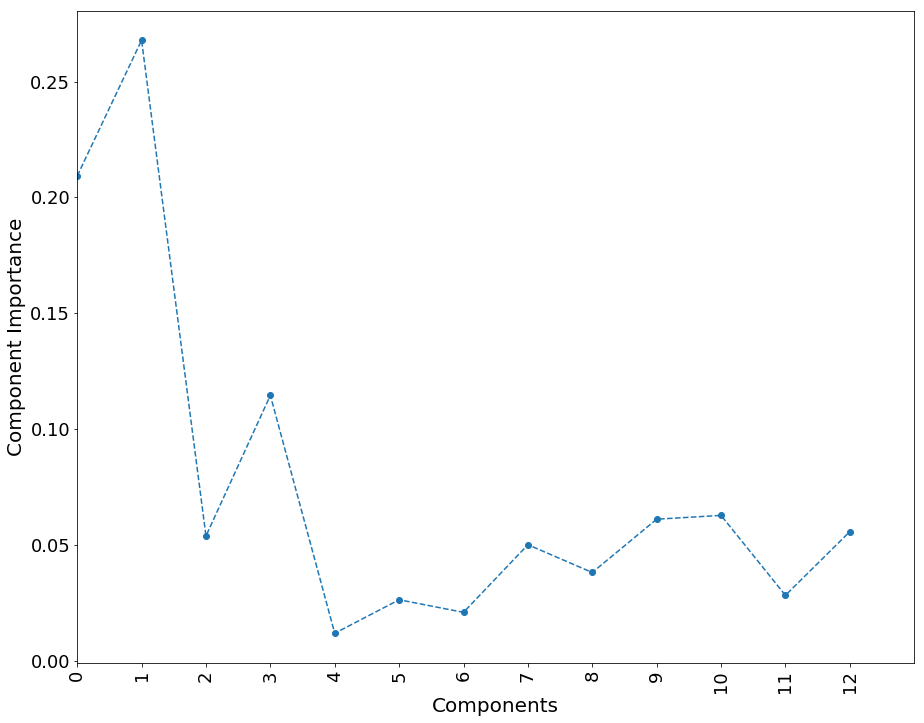

In [473]:
gbc=GradientBoostingClassifier(**gbc_model.best_params_)
gbc.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### ExtraTreeClassifier

In [474]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model,cm_train,cm_test,acc_train,acc_test=grid_acc(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         20          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0      best

Accuracy of the  Extra Decision Tree  model for the training data is: 0.771545319465

Confusion Matrix for Training data is:


Predicted    0     1  __all__
Actual                       
0          858   492     1350
1          123  1219     1342
__all__    981  1711     2692

Accuracy of the  Extra Decision Tree  model for test data is: 0.761698440208

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          367  206      573
1           69  512      581
__all__    436  718     1154

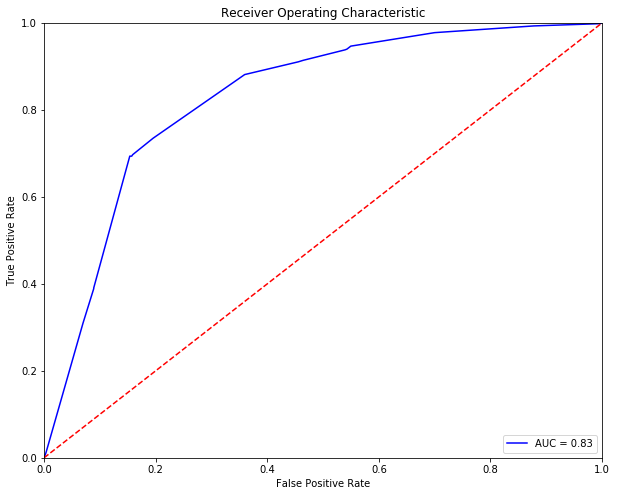

Optimal Threshold is 0.610169491525
Accuracy on test data is: 0.76863084922


Predicted  0.0  1.0  __all__
Actual                      
0.0        482   91      573
1.0        176  405      581
__all__    658  496     1154

In [475]:
cm,accuracy,threshold,roc_auc=get_roc_curve(ext_tree_model,X_test,Y_test)

In [476]:
table_70_50_PCA_20_train.loc[5]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[5] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])

In [477]:
%%capture
table_70_50_PCA_20_test_roc.loc[5]=([accuracy, cm.TP,cm.TN,cm.FP,cm.FN,cm.FPR,cm.FNR,threshold,roc_auc])

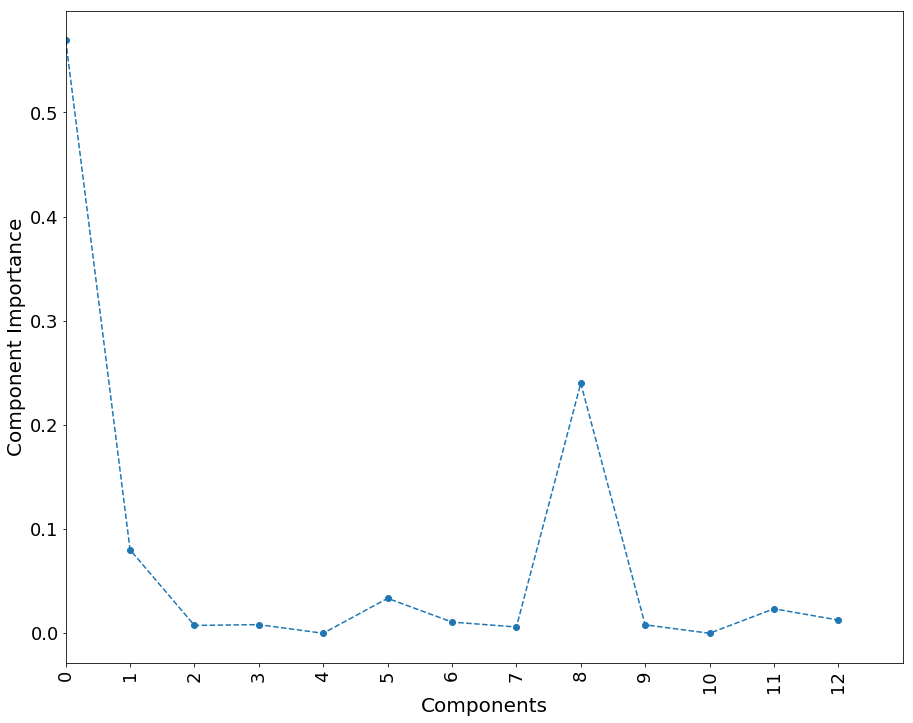

In [478]:
ext=ExtraTreeClassifier(**ext_tree_model.best_params_)
ext.fit(X_train,Y_train)
fig = plt.figure(figsize=(15, 12))
plt.plot(ext.feature_importances_, '--o')
plt.ylabel('Component Importance', fontsize=20)
plt.xlabel('Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 13])
plt.xticks(np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging Classifier

In [479]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[200,300], max_samples=[0.6,0.4,0.3],max_features=[0.4,0.3,0.2,0.6],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model,cm_train,cm_test,acc_train,acc_test=grid_acc(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3           200   

               5             6  
index  oob_score  random_state  
0           True             0

Accuracy of the  Bagging  model for the training data is: 0.90044576523

Confusion Matrix for Training data is:


Predicted     0     1  __all__
Actual                        
0          1174   176     1350
1            92  1250     1342
__all__    1266  1426     2692

Accuracy of the  Bagging  model for test data is: 0.778162911612

Confusion Matrix for test data is:


Predicted    0    1  __all__
Actual                      
0          411  162      573
1           94  487      581
__all__    505  649     1154

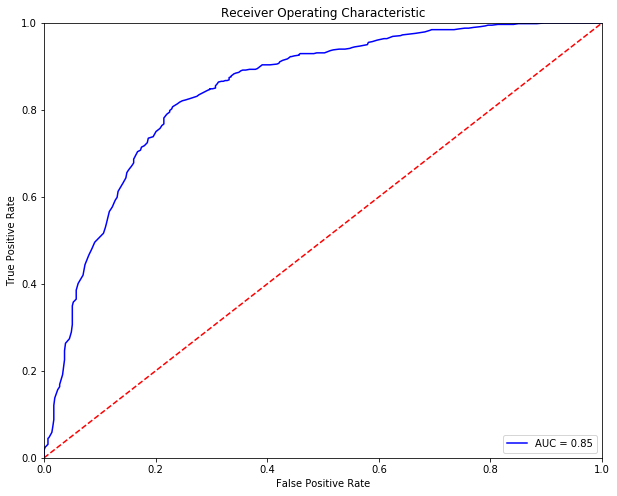

Optimal Threshold is 0.575
Accuracy on test data is: 0.776429809359


Predicted  0.0  1.0  __all__
Actual                      
0.0        450  123      573
1.0        135  446      581
__all__    585  569     1154

In [480]:
cm,accuracy,threshold,roc_auc=get_roc_curve(bagging_model,X_test,Y_test)

In [481]:
table_70_50_PCA_20_train.loc[6]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[6] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[6]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### VotingClassifier

In [482]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='soft')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
acc_train=eclf.score(X_train,Y_train)
print("The training accuracy is :",acc_train)
pred=eclf.predict(X_test)
cm_train=get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
acc_test=accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred)
print("The test accuracy is:",acc_test)
cm_test=ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)
cm_test

The training accuracy is : 0.929049034175


Predicted     0     1  __all__
Actual                        
0          1244   106     1350
1            85  1257     1342
__all__    1329  1363     2692

The test accuracy is: 0.774696707106


Predicted    0    1  __all__
Actual                      
0          425  148      573
1          112  469      581
__all__    537  617     1154

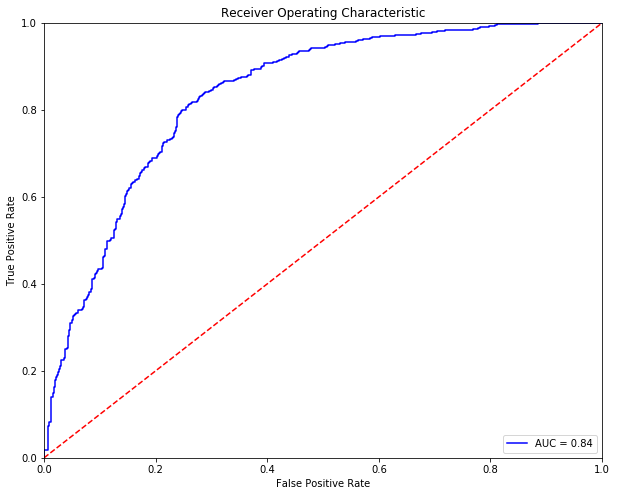

Optimal Threshold is 0.535950412644
Accuracy on test data is: 0.762564991334


Predicted  0.0  1.0  __all__
Actual                      
0.0        438  135      573
1.0        139  442      581
__all__    577  577     1154

In [483]:
cm,accuracy,threshold,roc_auc=get_roc_curve(eclf,X_test,Y_test)

In [484]:
table_70_50_PCA_20_train.loc[7]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[7] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[7]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras -1 

In [485]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)

The accuracy of the model on training data is: 0.841753343239


Predicted     0     1  __all__
Actual                        
0          1111   239     1350
1           187  1155     1342
__all__    1298  1394     2692

The accuracy of the model on test data is: 0.746967071057


Predicted    0    1  __all__
Actual                      
0          413  160      573
1          132  449      581
__all__    545  609     1154

1120/1154 [============================>.] - ETA: 0s

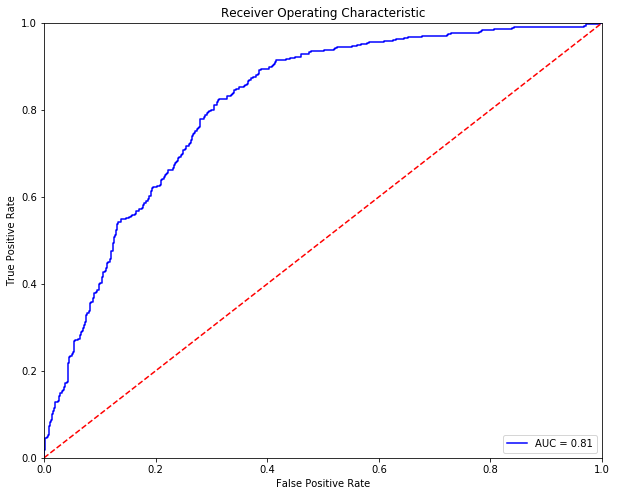

Optimal Threshold is 0.534191
Accuracy of Logistic Model on training data is: 0.733968804159


Predicted  0.0  1.0  __all__
Actual                      
0.0        422  151      573
1.0        156  425      581
__all__    578  576     1154

In [486]:
cm,accuracy,threshold,roc_auc=get_roc_curve_deep_learning(deep_learning,X_test,Y_test)

In [487]:
table_70_50_PCA_20_train.loc[8]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[8] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[8]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

#### Neural Network with Keras and Grid Search - 2

In [488]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=13))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
acc_train=grid_search.score(X_train,Y_train)
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
print("The accuracy of the model on test data is:",acc_test)
cm_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.6min finished


The accuracy of the model on training data is: 0.783803863299


Predicted     0     1  __all__
Actual                        
0          1081   269     1350
1           313  1029     1342
__all__    1394  1298     2692

The accuracy of the model on test data is: 0.772963604853


Predicted    0    1  __all__
Actual                      
0          454  119      573
1          143  438      581
__all__    597  557     1154

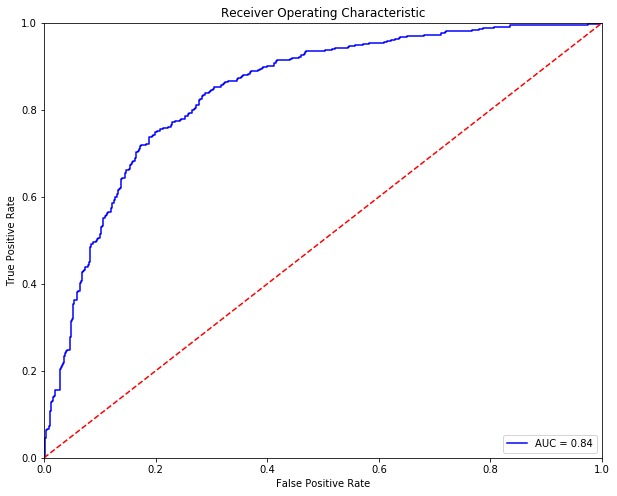

Optimal Threshold is 0.479944
Accuracy on test data is: 0.7712305026


Predicted  0.0  1.0  __all__
Actual                      
0.0        442  131      573
1.0        133  448      581
__all__    575  579     1154

In [489]:
cm,accuracy,threshold,roc_auc=get_roc_curve(grid_search,X_test,Y_test)

In [490]:
table_70_50_PCA_20_train.loc[9]=   ([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_70_50_PCA_20_test.loc[9] =   ([acc_test ,cm_test.TP, cm_test.TN, cm_test.FP, cm_test.FN, cm_test.FPR, cm_test.FNR])
table_70_50_PCA_20_test_roc.loc[9]=([accuracy, cm.TP,      cm.TN,      cm.FP,      cm.FN,      cm.FPR,      cm.FNR, threshold,roc_auc])

In [491]:
table_70_50_PCA_20_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_20_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_PCA_20_test_roc['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_PCA_20_test.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_20_train.set_index(['index'],drop=True,inplace=True)
table_70_50_PCA_20_test_roc.set_index(['index'],drop=True,inplace=True)

print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_20_train)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_20_test)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_20_test_roc)

Comparision Table for Training Accuracies:


accuracy      TP      TN     FP     FN       FPR  \
index                                                                          
KNeighborsClassifier        1.000000  1342.0  1350.0    0.0    0.0  0.000000   
LogisticRegression          0.771174  1043.0  1033.0  317.0  299.0  0.234815   
RandomForestClassifier      0.774146  1131.0   953.0  397.0  211.0  0.294074   
AdaBoostClassifier          0.790119  1111.0  1016.0  334.0  231.0  0.247407   
GradientBoostingClassifier  0.796434  1135.0  1009.0  341.0  207.0  0.252593   
ExtraTreeClassifier         0.771545  1219.0   858.0  492.0  123.0  0.364444   
BaggingClassifier           0.900446  1250.0  1174.0  176.0   92.0  0.130370   
VotingClassifier            0.929049  1257.0  1244.0  106.0   85.0  0.078519   
Neural Network-1            0.841753  1155.0  1111.0  239.0  187.0  0.177037   
Neural-Network-2            0.783804  1029.0  1081.0  269.0  313.0  0.199259   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.222802  
RandomForestClassifier      0.157228  
AdaBoostClassifier          0.172131  
GradientBoostingClassifier  0.154247  
ExtraTreeClassifier         0.091654  
BaggingClassifier           0.068554  
VotingClassifier            0.063338  
Neural Network-1            0.139344  
Neural-Network-2            0.233234

Comparision Table for Test Accuracies:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.773830  457.0  436.0  137.0  124.0  0.239092   
LogisticRegression          0.769497  455.0  433.0  140.0  126.0  0.244328   
RandomForestClassifier      0.776430  493.0  403.0  170.0   88.0  0.296684   
AdaBoostClassifier          0.782496  480.0  423.0  150.0  101.0  0.261780   
GradientBoostingClassifier  0.779896  483.0  417.0  156.0   98.0  0.272251   
ExtraTreeClassifier         0.761698  512.0  367.0  206.0   69.0  0.359511   
BaggingClassifier           0.778163  487.0  411.0  162.0   94.0  0.282723   
VotingClassifier            0.774697  469.0  425.0  148.0  112.0  0.258290   
Neural Network-1            0.746967  449.0  413.0  160.0  132.0  0.279232   
Neural-Network-2            0.772964  438.0  454.0  119.0  143.0  0.207679   

                                 FNR  
index                                 
KNeighborsClassifier        0.213425  
LogisticRegression          0.216867  
RandomForestClassifier      0.151463  
AdaBoostClassifier          0.173838  
GradientBoostingClassifier  0.168675  
ExtraTreeClassifier         0.118761  
BaggingClassifier           0.161790  
VotingClassifier            0.192771  
Neural Network-1            0.227194  
Neural-Network-2            0.246127

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy     TP     TN     FP     FN       FPR  \
index                                                                        
KNeighborsClassifier        0.774697  450.0  444.0  129.0  131.0  0.225131   
LogisticRegression          0.766031  445.0  439.0  134.0  136.0  0.233857   
RandomForestClassifier      0.772964  448.0  444.0  129.0  133.0  0.225131   
AdaBoostClassifier          0.782496  454.0  449.0  124.0  127.0  0.216405   
GradientBoostingClassifier  0.785962  456.0  451.0  122.0  125.0  0.212914   
ExtraTreeClassifier         0.768631  405.0  482.0   91.0  176.0  0.158813   
BaggingClassifier           0.776430  446.0  450.0  123.0  135.0  0.214660   
VotingClassifier            0.762565  442.0  438.0  135.0  139.0  0.235602   
Neural Network-1            0.733969  425.0  422.0  151.0  156.0  0.263525   
Neural-Network-2            0.771231  448.0  442.0  131.0  133.0  0.228621   

                                 FNR  threshold       auc  
index                                                      
KNeighborsClassifier        0.225473   0.520667  0.840224  
LogisticRegression          0.234079   0.508222  0.845494  
RandomForestClassifier      0.228916   0.615223  0.818772  
AdaBoostClassifier          0.218589   0.504072  0.843261  
GradientBoostingClassifier  0.215146   0.573798  0.848334  
ExtraTreeClassifier         0.302926   0.610169  0.829615  
BaggingClassifier           0.232358   0.575000  0.846116  
VotingClassifier            0.239243   0.535950  0.835852  
Neural Network-1            0.268503   0.534191  0.810954  
Neural-Network-2            0.228916   0.479944  0.841742

In [492]:
table_70_50_PCA_train_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_PCA_test_avg=pd.DataFrame(columns=['accuracy','FPR','FNR'])
table_70_50_PCA_test_roc_avg=pd.DataFrame(columns=['accuracy','FPR','FNR','auc'])

In [493]:
table_70_50_PCA_train_avg['accuracy']=(table_70_50_PCA_0_train['accuracy']+table_70_50_PCA_10_train['accuracy']+table_70_50_PCA_20_train['accuracy'])/3.0
table_70_50_PCA_train_avg['FPR']=(table_70_50_PCA_0_train['FPR']+table_70_50_PCA_10_train['FPR']+table_70_50_PCA_20_train['FPR'])/3.0
table_70_50_PCA_train_avg['FNR']=(table_70_50_PCA_0_train['FNR']+table_70_50_PCA_10_train['FNR']+table_70_50_PCA_20_train['FNR'])/3.0

In [494]:
table_70_50_PCA_test_avg['accuracy']=(table_70_50_PCA_0_test['accuracy']+table_70_50_PCA_10_test['accuracy']+table_70_50_PCA_20_test['accuracy'])/3.0
table_70_50_PCA_test_avg['FPR']=(table_70_50_PCA_0_test['FPR']+table_70_50_PCA_10_test['FPR']+table_70_50_PCA_20_test['FPR'])/3.0
table_70_50_PCA_test_avg['FNR']=(table_70_50_PCA_0_test['FNR']+table_70_50_PCA_10_test['FNR']+table_70_50_PCA_20_test['FNR'])/3.0

In [495]:
table_70_50_PCA_test_roc_avg['accuracy']=(table_70_50_PCA_0_test_roc['accuracy']+table_70_50_PCA_10_test_roc['accuracy']+table_70_50_PCA_20_test_roc['accuracy'])/3.0
table_70_50_PCA_test_roc_avg['FPR']=(table_70_50_PCA_0_test_roc['FPR']+table_70_50_PCA_10_test_roc['FPR']+table_70_50_PCA_20_test_roc['FPR'])/3.0
table_70_50_PCA_test_roc_avg['FNR']=(table_70_50_PCA_0_test_roc['FNR']+table_70_50_PCA_10_test_roc['FNR']+table_70_50_PCA_20_test_roc['FNR'])/3.0
table_70_50_PCA_test_roc_avg['auc']=(table_70_50_PCA_0_test_roc['auc']+table_70_50_PCA_10_test_roc['auc']+table_70_50_PCA_20_test_roc['auc'])/3.0

In [496]:
print("-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------")
print("Comparision Table for Training Accuracies:")
display(table_70_50_PCA_train_avg)

print("Comparision Table for Test Accuracies:")
display(table_70_50_PCA_test_avg)

print("Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:")
display(table_70_50_PCA_test_roc_avg)

-----------------------------------------------------------------------Average accuracies---------------------------------------------------------------------
Comparision Table for Training Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        1.000000  0.000000  0.000000
LogisticRegression          0.769936  0.228073  0.232032
RandomForestClassifier      0.773526  0.278580  0.174318
AdaBoostClassifier          0.781947  0.263769  0.172362
GradientBoostingClassifier  0.797424  0.235735  0.169368
ExtraTreeClassifier         0.783928  0.309726  0.122292
BaggingClassifier           0.906018  0.119350  0.068598
VotingClassifier            0.933507  0.074288  0.058699
Neural Network-1            0.844849  0.178060  0.132254
Neural-Network-2            0.787766  0.221926  0.202621

Comparision Table for Test Accuracies:


accuracy       FPR       FNR
index                                                   
KNeighborsClassifier        0.776141  0.220745  0.227084
LogisticRegression          0.772675  0.229399  0.225333
RandomForestClassifier      0.779029  0.276788  0.165270
AdaBoostClassifier          0.781340  0.267456  0.169830
GradientBoostingClassifier  0.783073  0.255978  0.177964
ExtraTreeClassifier         0.762276  0.330545  0.145094
BaggingClassifier           0.783651  0.277891  0.154800
VotingClassifier            0.772964  0.258232  0.195851
Neural Network-1            0.755633  0.279030  0.209645
Neural-Network-2            0.771519  0.239635  0.217115

Comparision Table for Test Accuracies with updated thresholds based on ROC Curve:


accuracy       FPR       FNR       auc
index                                                             
KNeighborsClassifier        0.773541  0.226454  0.226462  0.835066
LogisticRegression          0.773252  0.225909  0.227592  0.841347
RandomForestClassifier      0.683709  0.306767  0.327032  0.813467
AdaBoostClassifier          0.737435  0.174610  0.351124  0.837436
GradientBoostingClassifier  0.783073  0.215474  0.218382  0.847207
ExtraTreeClassifier         0.751589  0.202621  0.294019  0.810227
BaggingClassifier           0.776430  0.218934  0.228177  0.842975
VotingClassifier            0.767475  0.232247  0.232791  0.836733
Neural Network-1            0.753899  0.244434  0.247762  0.817557
Neural-Network-2            0.772675  0.226466  0.228189  0.835003

In [2]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')